In [1]:
#Importamos los paquetes necesarios

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup, SoupStrainer
import sys
import ast
import string
import missingno as msno 
import seaborn as sn
import requests
import datetime
import progressbar
import time
import re
from selenium import webdriver
#from matplotlib import pyplot
from webdriver_manager.chrome import ChromeDriverManager
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

## 3.1 Importamos los datos limpios

In [2]:
path = './Clean_data/DUMMY/'
#path = './Scraped data/scraped_data_v2/'


#Maestro de equipos de toda la história
all_teams_df = pd.read_csv(path + 'ALL_TEAMS_CLEAN.csv',index_col=0)

# Maestro de jugadorescombinado con Draft
players_df = pd.read_csv(path + 'All_players_clean.csv',index_col=0)

#NBA Dataframes
stats_RS_PG_BS_df = pd.read_csv(path + 'stats_RS_PG_BS_df_clean.csv') 
stats_PFF_PG_BS_df = pd.read_csv(path + 'stats_PFF_PG_BS_df_clean.csv') 
stats_RS_TOT_BS_df = pd.read_csv(path + 'stats_RS_TOT_BS_df_clean.csv') 
stats_PFF_TOT_BS_df = pd.read_csv(path + 'stats_PFF_TOT_BS_df_clean.csv') 
stats_RS_ADV_BS_df = pd.read_csv(path + 'stats_RS_ADV_BS_df_clean.csv') 
stats_PFF_ADV_BS_df = pd.read_csv(path + 'stats_PFF_ADV_BS_df_clean.csv')
player_extra_info_df = pd.read_csv(path + 'player_extra_info_df_clean.csv')

#College DataFrames
# college_stats_RS_PG_BS_df = pd.read_csv(path + 'college_stats_RS_PG_BS_df.csv',index_col=0) 
# college_stats_CONF_PG_BS_df = pd.read_csv(path + 'college_stats_CONF_PG_BS_df.csv',index_col=0) 
# college_stats_RS_TOT_BS_df = pd.read_csv(path + 'college_stats_RS_TOT_BS_df.csv',index_col=0) 
# college_stats_CONF_TOT_BS_df = pd.read_csv(path + 'college_stats_CONF_TOT_BS_df.csv',index_col=0) 
# college_stats_RS_ADV_BS_df = pd.read_csv(path + 'college_stats_RS_ADV_BS_df.csv',index_col=0) 
# college_stats_CONF_ADV_BS_df = pd.read_csv(path + 'college_stats_CONF_ADV_BS_df.csv',index_col=0)     
# college_player_extra_info_df = pd.read_csv(path + 'college_player_extra_info_df.csv',index_col=0)

### 3.1.1 Un primer vistazo a los DF cargados

In [3]:
players_df.head()

,URL,NAME,ACTIVE_FROM,ACTIVE_TO,POSITION,COLLEGE,DRAFT_YEAR,DRAFT_PICK,DRAFT_TEAM,BIRTH_DATE(year),HEIGHT(cm),WEIGHT(kg)
0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,1990.0,25.0,POR,1968,208.28,108.86
3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,1990.0,3.0,DEN,1969,185.42,73.48
4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",1997.0,11.0,SAC,1974,198.12,101.15
5,/players/a/abdursh01.html,Shareef Abdur-Rahim,1997,2008,F,California,1996.0,3.0,VAN,1976,205.74,102.06
9,/players/a/abrinal01.html,Álex Abrines,2017,2019,G-F,No College,Undrafted,Undrafted,Undrafted,1993,198.12,90.72


In [4]:
stats_RS_PG_BS_df.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,URL
0,1990-91,22,POR,NBA,PF,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,/players/a/abdelal01.html
1,1991-92,23,POR,NBA,PF,71,1,13.2,2.5,5.1,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,/players/a/abdelal01.html
2,1992-93,24,TOT,NBA,PF,75,52,17.5,3.3,6.3,...,1.7,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,/players/a/abdelal01.html
3,1992-93,24,MIL,NBA,PF,12,0,13.3,2.2,4.7,...,1.0,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3,/players/a/abdelal01.html
4,1992-93,24,BOS,NBA,PF,63,52,18.3,3.5,6.6,...,1.8,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2,/players/a/abdelal01.html


In [5]:
stats_RS_TOT_BS_df.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,URL
0,1990-91,22,POR,NBA,PF,43,0,290.0,55.0,116.0,...,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,/players/a/abdelal01.html
1,1991-92,23,POR,NBA,PF,71,1,934.0,178.0,361.0,...,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,/players/a/abdelal01.html
2,1992-93,24,TOT,NBA,PF,75,52,1311.0,245.0,473.0,...,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,/players/a/abdelal01.html
3,1992-93,24,MIL,NBA,PF,12,0,159.0,26.0,56.0,...,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0,/players/a/abdelal01.html
4,1992-93,24,BOS,NBA,PF,63,52,1152.0,219.0,417.0,...,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0,/players/a/abdelal01.html


In [6]:
stats_PFF_TOT_BS_df.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,URL,3P%
0,1990-91,22,POR,NBA,PF,5,0,13.0,2.0,6.0,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,/players/a/abdelal01.html,0.000
1,1991-92,23,POR,NBA,PF,8,0,25.0,5.0,10.0,...,4.0,4.0,2.0,0.0,0.0,2.0,4.0,12.0,/players/a/abdelal01.html,0.000
2,1992-93,24,BOS,NBA,PF,4,4,68.0,11.0,24.0,...,11.0,13.0,1.0,0.0,1.0,9.0,7.0,22.0,/players/a/abdelal01.html,0.000
3,1993-94,24,DEN,NBA,PG,12,12,339.0,57.0,154.0,...,15.0,18.0,30.0,5.0,1.0,14.0,29.0,155.0,/players/a/abdulma02.html,0.324
4,1994-95,25,DEN,NBA,PG,3,2,76.0,12.0,33.0,...,3.0,5.0,5.0,2.0,0.0,8.0,8.0,40.0,/players/a/abdulma02.html,0.167


In [7]:
stats_RS_ADV_BS_df.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,URL
0,1990-91,22,POR,NBA,PF,43,290.0,13.1,0.499,0.000,...,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2,/players/a/abdelal01.html
1,1991-92,23,POR,NBA,PF,71,934.0,13.5,0.533,0.000,...,20.6,0.6,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1,/players/a/abdelal01.html
2,1992-93,24,TOT,NBA,PF,75,1311.0,13.2,0.551,0.002,...,20.5,0.7,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6,/players/a/abdelal01.html
3,1992-93,24,MIL,NBA,PF,12,159.0,11.9,0.508,0.018,...,20.5,0.0,0.2,0.1,0.035,-3.3,-0.2,-3.5,-0.1,/players/a/abdelal01.html
4,1992-93,24,BOS,NBA,PF,63,1152.0,13.4,0.557,0.000,...,20.5,0.7,1.2,1.9,0.079,-2.3,-1.7,-4.0,-0.6,/players/a/abdelal01.html


In [8]:
stats_PFF_ADV_BS_df.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,URL
0,1990-91,22,POR,NBA,PF,5,13.0,6.3,0.333,0.000,...,19.8,0.0,0.0,0.0,-0.035,-2.6,-4.6,-7.3,0.0,/players/a/abdelal01.html
1,1991-92,23,POR,NBA,PF,8,25.0,8.6,0.510,0.000,...,23.7,0.0,0.0,0.0,-0.005,-4.2,-0.4,-4.6,0.0,/players/a/abdelal01.html
2,1992-93,24,BOS,NBA,PF,4,68.0,3.2,0.458,0.000,...,21.9,-0.2,0.0,-0.2,-0.145,-8.4,-2.6,-11.0,-0.1,/players/a/abdelal01.html
3,1993-94,24,DEN,NBA,PG,12,339.0,11.8,0.462,0.240,...,24.8,0.2,0.1,0.3,0.042,-0.8,-1.9,-2.7,-0.1,/players/a/abdulma02.html
4,1994-95,25,DEN,NBA,PG,3,76.0,10.2,0.511,0.364,...,27.8,0.0,0.0,-0.1,-0.048,-1.1,-3.8,-4.9,-0.1,/players/a/abdulma02.html


In [9]:
player_extra_info_df.head()

,URL,ALL-ROOKIE,MOST_IMPROVED,ALL_STAR,ALL-DEFENSIVE,ALL-NBA,AST_CHAMP,AS_MVP,BLK_CHAMP,COLLEGE_URL,...,2012_NBA_CHAMP,2013_NBA_CHAMP,2014_NBA_CHAMP,2015_NBA_CHAMP,2016_NBA_CHAMP,2017_NBA_CHAMP,2018_NBA_CHAMP,2019_NBA_CHAMP,2020_NBA_CHAMP,2021_NBA_CHAMP
0,/players/a/abdelal01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/players/a/abdulma02.html,1990-91,1992-93,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,/players/mahmoud-abdul-rauf-1.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/players/a/abdulta01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/players/a/abdursh01.html,1996-97,Not defined,1.0,Not defined,Not defined,Not defined,Not defined,Not defined,/players/shareef-abdur-rahim-1.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/players/a/abrinal01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#college_stats_RS_PG_BS_df.head()

In [11]:
#college_stats_CONF_PG_BS_df.head()

In [12]:
#college_stats_RS_TOT_BS_df.head()

In [13]:
#college_stats_CONF_TOT_BS_df.head()

In [14]:
#college_stats_RS_ADV_BS_df.head()

In [15]:
#college_stats_CONF_ADV_BS_df.head()

In [16]:
#college_player_extra_info_df.head()

### 3.2 Unión de Dataframes NBA

#### 3.2.1 Unión de DF de estadísticas - Regular Season

Revisamos la cardinalidad de los Dataframes (número de jugadores y total de registros). Podemos asumir que algunos jugadores que han tenido poca participación en la liga van a tener menos estadísticas en alguna de las tablas. Por ello, nos quedaremos con el DF de menor cardinalidad a nivel de registros. El número de URL/jugadores si que debería coincidir bastante.


**REVISAR EN REUNIÓN**

In [18]:
print(len(stats_RS_PG_BS_df['URL'].unique()))
print(len(stats_RS_PG_BS_df))

2805
18910


In [19]:
print(len(stats_RS_TOT_BS_df['URL'].unique()))
print(len(stats_RS_TOT_BS_df))

2806
18923


In [20]:
print(len(stats_RS_ADV_BS_df['URL'].unique()))
print(len(stats_RS_ADV_BS_df))

2807
18900


In [21]:
print(len(player_extra_info_df['URL'].unique()))
print(len(player_extra_info_df)) #Esto es también un problema (debería ser un registro por jugador) -> duplicados?

2807
3029


**Si sigue descuadrando, nos quedaremos con el DF con menos registros y enriqueceremos con los otros dos...**

Hay un conjunto de columnas que son comunes para todos los Dataframes (las eliminaremos excepto en unas)

In [22]:
common_cols = ['SEASON', 'AGE', 'TEAM', 'LEAGUE', 'POS', 'G', 'GS','URL'] #GS no está en advanced
common_DF = stats_RS_TOT_BS_df[common_cols] #DF con un menos número de registros
common_DF

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html
...,...,...,...,...,...,...,...,...
18918,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html
18919,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html
18920,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html
18921,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html


Quitamos las colmumnas comunes que encontraremos en *common_df*

In [23]:
common_cols.remove('URL')
common_cols.remove('SEASON')
common_cols.remove('TEAM')

stats_RS_PG_BS_df_1 = stats_RS_PG_BS_df.copy()
stats_RS_TOT_BS_df_1 = stats_RS_TOT_BS_df.copy()
stats_RS_ADV_BS_df_1 = stats_RS_ADV_BS_df.copy()

stats_RS_PG_BS_df_1 = stats_RS_PG_BS_df_1.drop(columns = common_cols)
stats_RS_TOT_BS_df_1 = stats_RS_TOT_BS_df_1.drop(columns = common_cols)
common_cols.remove('GS')
stats_RS_ADV_BS_df_1 = stats_RS_ADV_BS_df_1.drop(columns = common_cols)

Hay que añadir un sufijo a las columnas del Dataframe (algunos nombre son comunes)

In [24]:
stats_RS_PG_BS_df_2 = stats_RS_PG_BS_df_1.add_suffix('_PER_GAME').rename(columns={'URL_PER_GAME':'URL',
                                                                                  'SEASON_PER_GAME':'SEASON',
                                                                                  'TEAM_PER_GAME':'TEAM'})
stats_RS_TOT_BS_df_2 = stats_RS_TOT_BS_df_1.add_suffix('_TOTAL').rename(columns={'URL_TOTAL':'URL','SEASON_TOTAL':'SEASON',
                                                                                 'TEAM_TOTAL':'TEAM'})

In [25]:
stats_RS_PG_BS_df_2.head()

,SEASON,TEAM,MP_PER_GAME,FG_PER_GAME,FGA_PER_GAME,FG%_PER_GAME,3P_PER_GAME,3PA_PER_GAME,3P%_PER_GAME,2P_PER_GAME,...,ORB_PER_GAME,DRB_PER_GAME,TRB_PER_GAME,AST_PER_GAME,STL_PER_GAME,BLK_PER_GAME,TOV_PER_GAME,PF_PER_GAME,PTS_PER_GAME,URL
0,1990-91,POR,6.7,1.3,2.7,0.474,0.0,0.0,0.0,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,/players/a/abdelal01.html
1,1991-92,POR,13.2,2.5,5.1,0.493,0.0,0.0,0.0,2.5,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,/players/a/abdelal01.html
2,1992-93,TOT,17.5,3.3,6.3,0.518,0.0,0.0,0.0,3.3,...,1.7,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,/players/a/abdelal01.html
3,1992-93,MIL,13.3,2.2,4.7,0.464,0.0,0.1,0.0,2.2,...,1.0,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3,/players/a/abdelal01.html
4,1992-93,BOS,18.3,3.5,6.6,0.525,0.0,0.0,0.0,3.5,...,1.8,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2,/players/a/abdelal01.html


Ya estamos listos para hacer los Merge de los distintos DF

In [26]:
print(len(common_DF))
print(len(stats_RS_PG_BS_df_2))

18923
18910


In [27]:
NBA_stats_RS_BS_df = common_DF.merge(stats_RS_PG_BS_df_2, how='left',on=['URL','SEASON','TEAM'])
NBA_stats_RS_BS_df_2 = NBA_stats_RS_BS_df.drop_duplicates().reset_index(drop=True)
NBA_stats_RS_BS_df_2

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG_PER_GAME,...,FT%_PER_GAME,ORB_PER_GAME,DRB_PER_GAME,TRB_PER_GAME,AST_PER_GAME,STL_PER_GAME,BLK_PER_GAME,TOV_PER_GAME,PF_PER_GAME,PTS_PER_GAME
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,1.3,...,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,2.5,...,0.752,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,3.3,...,0.759,1.7,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,2.2,...,0.750,1.0,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,3.5,...,0.760,1.8,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html,15.6,3.4,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5
18396,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html,20.2,3.8,...,0.733,2.3,5.3,7.7,1.5,0.4,0.9,1.4,2.5,9.4
18397,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html,18.4,3.3,...,0.747,2.7,4.8,7.5,1.1,0.2,0.9,0.8,2.3,8.3
18398,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html,22.3,3.6,...,0.789,2.6,4.6,7.2,1.3,0.3,0.9,1.1,2.6,9.0


In [28]:
print(len(NBA_stats_RS_BS_df_2))
print(len(stats_RS_TOT_BS_df_2))

18400
18923


In [30]:
NBA_stats_RS_BS_df_3 = NBA_stats_RS_BS_df_2.merge(stats_RS_TOT_BS_df_2, how='left',on=['URL','SEASON','TEAM'])
NBA_stats_RS_BS_df_4 = NBA_stats_RS_BS_df_3.drop_duplicates().reset_index(drop=True)
NBA_stats_RS_BS_df_4

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG_PER_GAME,...,FT%_TOTAL,ORB_TOTAL,DRB_TOTAL,TRB_TOTAL,AST_TOTAL,STL_TOTAL,BLK_TOTAL,TOV_TOTAL,PF_TOTAL,PTS_TOTAL
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,1.3,...,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,2.5,...,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,3.3,...,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,2.2,...,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,3.5,...,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html,15.6,3.4,...,0.864,54.0,108.0,162.0,25.0,4.0,27.0,33.0,73.0,281.0
18396,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html,20.2,3.8,...,0.733,61.0,139.0,200.0,38.0,10.0,24.0,37.0,64.0,244.0
18397,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html,18.4,3.3,...,0.747,197.0,346.0,543.0,82.0,16.0,66.0,61.0,168.0,596.0
18398,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html,22.3,3.6,...,0.789,189.0,330.0,519.0,90.0,24.0,62.0,81.0,187.0,650.0


In [31]:
print(len(NBA_stats_RS_BS_df_4))
print(len(stats_RS_ADV_BS_df_1))

18400
18900


In [32]:
NBA_stats_RS_BS_df_5 = NBA_stats_RS_BS_df_4.merge(stats_RS_ADV_BS_df_1, how='left',on=['URL','SEASON','TEAM'])
NBA_stats_RS_BS_df_6 = NBA_stats_RS_BS_df_5.drop_duplicates().reset_index(drop=True)
NBA_stats_RS_BS_df_6

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG_PER_GAME,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,1.3,...,14.0,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,2.5,...,14.0,20.6,0.6,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,3.3,...,15.6,20.5,0.7,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,2.2,...,17.1,20.5,0.0,0.2,0.1,0.035,-3.3,-0.2,-3.5,-0.1
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,3.5,...,15.4,20.5,0.7,1.2,1.9,0.079,-2.3,-1.7,-4.0,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html,15.6,3.4,...,12.9,20.5,1.1,0.6,1.8,0.165,-0.3,0.1,-0.2,0.2
18396,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html,20.2,3.8,...,14.8,20.1,0.7,0.7,1.4,0.132,-0.2,-0.5,-0.7,0.2
18397,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html,18.4,3.3,...,11.8,16.4,4.4,2.3,6.6,0.241,1.9,0.9,2.8,1.6
18398,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html,22.3,3.6,...,14.7,15.1,4.8,2.1,6.9,0.206,0.6,0.4,1.0,1.2


In [33]:
len(NBA_stats_RS_BS_df_6['URL'].unique())

2806

Revisamos qué nulos se han originado en el cleaning... (esta parte se podrá borrar cuando en el cleaning no haya nada)

SEASON           0.000000
AGE              0.000000
TEAM             0.000000
LEAGUE           0.000000
POS              0.000000
G                0.000000
GS               0.000000
URL              0.000000
MP_PER_GAME      0.000761
FG_PER_GAME      0.000761
FGA_PER_GAME     0.000761
FG%_PER_GAME     0.000761
3P_PER_GAME      0.000761
3PA_PER_GAME     0.000761
3P%_PER_GAME     0.000761
2P_PER_GAME      0.000761
2PA_PER_GAME     0.000761
2P%_PER_GAME     0.000761
eFG%_PER_GAME    0.000761
FT_PER_GAME      0.000761
FTA_PER_GAME     0.000761
FT%_PER_GAME     0.000761
ORB_PER_GAME     0.000761
DRB_PER_GAME     0.000761
TRB_PER_GAME     0.000761
AST_PER_GAME     0.000761
STL_PER_GAME     0.000761
BLK_PER_GAME     0.000761
TOV_PER_GAME     0.000761
PF_PER_GAME      0.000761
PTS_PER_GAME     0.000761
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)
SEASON            object
AGE                int64
TEAM              object
LEAGUE            object
POS               object
G             

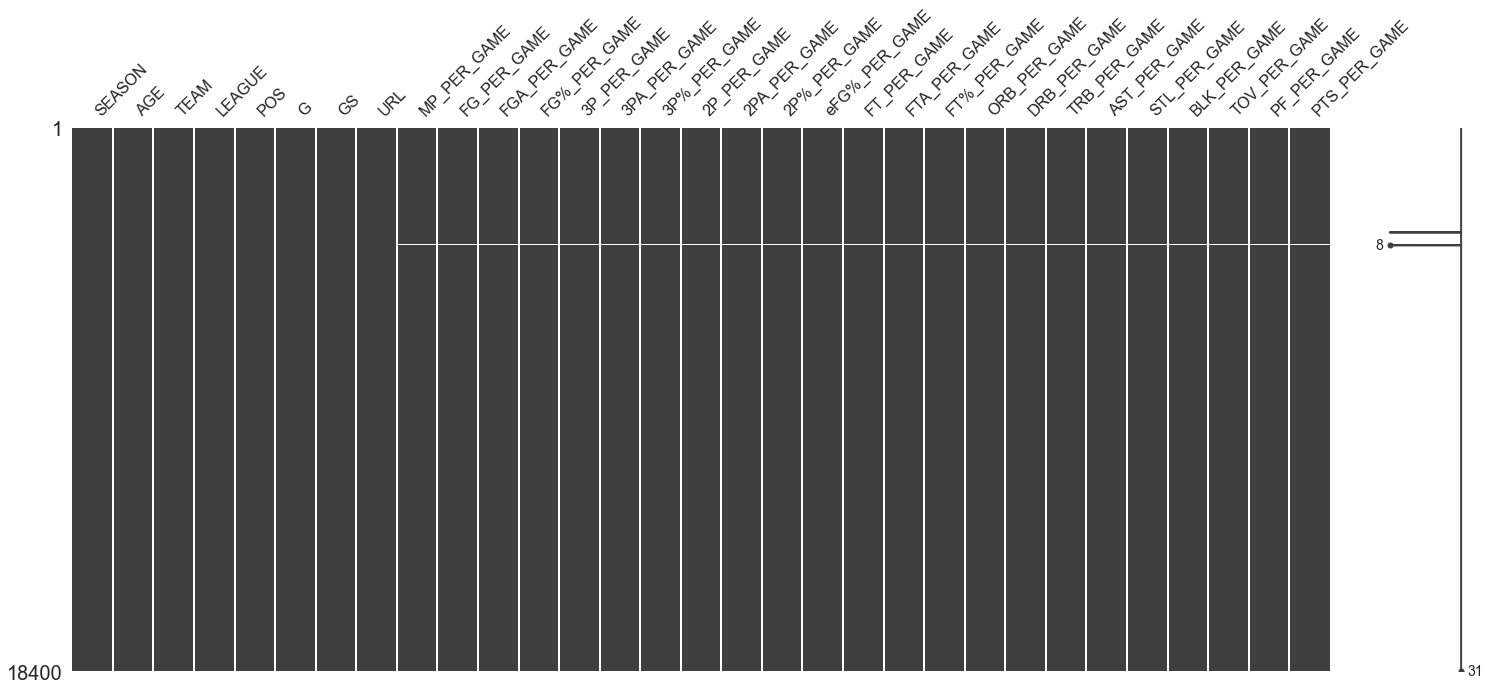

In [40]:
N = 0
M = 31

_columns  = NBA_stats_RS_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))
print(_columns.dtypes)

In [41]:
NBA_stats_RS_BS_df_6[NBA_stats_RS_BS_df_6['MP_PER_GAME'].isna()]

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG_PER_GAME,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
3543,2012-13,28,NYK,NBA,PF,56,13,/players/c/copelch01.html,NaN,NaN,...,10.7,25.3,1.5,0.6,2.1,0.117,1.1,-1.6,-0.5,0.3
3544,2013-14,29,IND,NBA,SF,41,0,/players/c/copelch01.html,NaN,NaN,...,10.2,23.7,0.6,0.4,1.0,0.186,4.2,0.3,4.5,0.4
3545,2014-15,30,IND,NBA,SF,50,12,/players/c/copelch01.html,NaN,NaN,...,15.2,21.3,-0.9,0.8,-0.1,-0.008,-2.5,-1.2,-3.7,-0.4
3546,2015-16,31,MIL,NBA,PF,24,1,/players/c/copelch01.html,NaN,NaN,...,10.0,17.3,-0.1,0.0,-0.1,-0.017,-3.3,-3.1,-6.4,-0.2
3974,2012-13,19,NOH,NBA,PF,64,60,/players/d/davisan02.html,NaN,NaN,...,10.3,21.8,3.7,2.4,6.1,0.159,1.8,0.7,2.5,2.1
3975,2013-14,20,NOP,NBA,PF,67,66,/players/d/davisan02.html,NaN,NaN,...,8.3,25.2,7.2,3.2,10.4,0.212,4.0,0.8,4.8,4.0
3976,2014-15,21,NOP,NBA,PF,68,68,/players/d/davisan02.html,NaN,NaN,...,6.3,27.8,9.9,4.2,14.0,0.274,6.6,2.3,8.9,6.7
3977,2015-16,22,NOP,NBA,C,61,61,/players/d/davisan02.html,NaN,NaN,...,8.4,29.6,4.4,2.8,7.2,0.160,3.6,0.4,3.9,3.2
3978,2016-17,23,NOP,NBA,C,75,75,/players/d/davisan02.html,NaN,NaN,...,9.1,32.6,5.9,5.1,11.0,0.195,4.4,1.4,5.9,5.4
3979,2017-18,24,NOP,NBA,PF,75,75,/players/d/davisan02.html,NaN,NaN,...,8.6,30.0,8.8,4.9,13.7,0.241,5.3,1.4,6.7,5.9


In [42]:
stats_RS_PG_BS_df_2[stats_RS_PG_BS_df_2['URL']=='/players/d/davisan02.html']

,SEASON,TEAM,MP_PER_GAME,FG_PER_GAME,FGA_PER_GAME,FG%_PER_GAME,3P_PER_GAME,3PA_PER_GAME,3P%_PER_GAME,2P_PER_GAME,...,ORB_PER_GAME,DRB_PER_GAME,TRB_PER_GAME,AST_PER_GAME,STL_PER_GAME,BLK_PER_GAME,TOV_PER_GAME,PF_PER_GAME,PTS_PER_GAME,URL


**Revisar scrapping de A.Davis....** xq a les altres dues taules si que s'ha scrapejat...

FG_TOTAL      0.0
FGA_TOTAL     0.0
FG%_TOTAL     0.0
3P_TOTAL      0.0
3PA_TOTAL     0.0
3P%_TOTAL     0.0
2P_TOTAL      0.0
2PA_TOTAL     0.0
2P%_TOTAL     0.0
eFG%_TOTAL    0.0
FT_TOTAL      0.0
FTA_TOTAL     0.0
FT%_TOTAL     0.0
ORB_TOTAL     0.0
DRB_TOTAL     0.0
TRB_TOTAL     0.0
AST_TOTAL     0.0
STL_TOTAL     0.0
BLK_TOTAL     0.0
TOV_TOTAL     0.0
PF_TOTAL      0.0
PTS_TOTAL     0.0
MP            0.0
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)
FG_TOTAL      float64
FGA_TOTAL     float64
FG%_TOTAL     float64
3P_TOTAL      float64
3PA_TOTAL     float64
3P%_TOTAL     float64
2P_TOTAL      float64
2PA_TOTAL     float64
2P%_TOTAL     float64
eFG%_TOTAL    float64
FT_TOTAL      float64
FTA_TOTAL     float64
FT%_TOTAL     float64
ORB_TOTAL     float64
DRB_TOTAL     float64
TRB_TOTAL     float64
AST_TOTAL     float64
STL_TOTAL     float64
BLK_TOTAL     float64
TOV_TOTAL     float64
PF_TOTAL      float64
PTS_TOTAL     float64
MP            float64
dtype: object


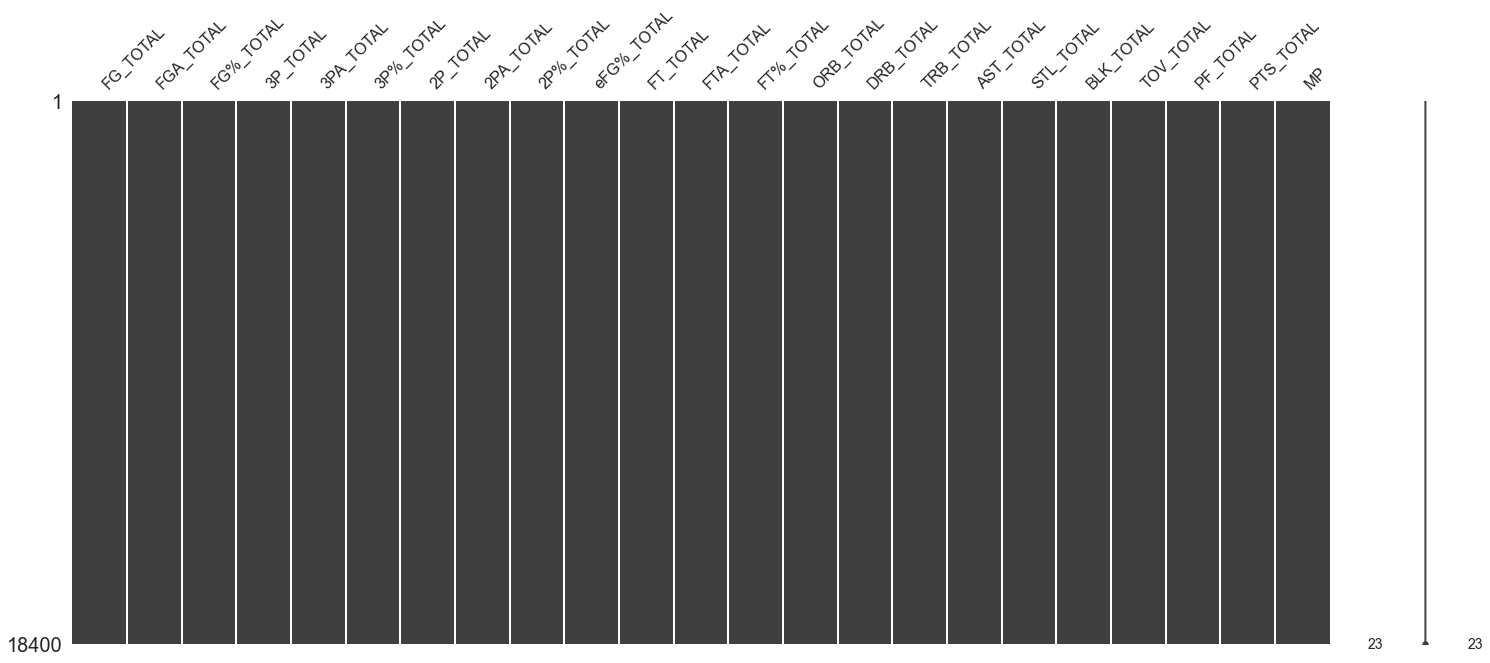

In [43]:
N = 32
M = 55

_columns  = NBA_stats_RS_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))
print(_columns.dtypes)

FGA_TOTAL     0.0
FG%_TOTAL     0.0
3P_TOTAL      0.0
3PA_TOTAL     0.0
3P%_TOTAL     0.0
2P_TOTAL      0.0
2PA_TOTAL     0.0
2P%_TOTAL     0.0
eFG%_TOTAL    0.0
FT_TOTAL      0.0
FTA_TOTAL     0.0
FT%_TOTAL     0.0
ORB_TOTAL     0.0
DRB_TOTAL     0.0
TRB_TOTAL     0.0
AST_TOTAL     0.0
STL_TOTAL     0.0
BLK_TOTAL     0.0
TOV_TOTAL     0.0
PF_TOTAL      0.0
PTS_TOTAL     0.0
MP            0.0
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)


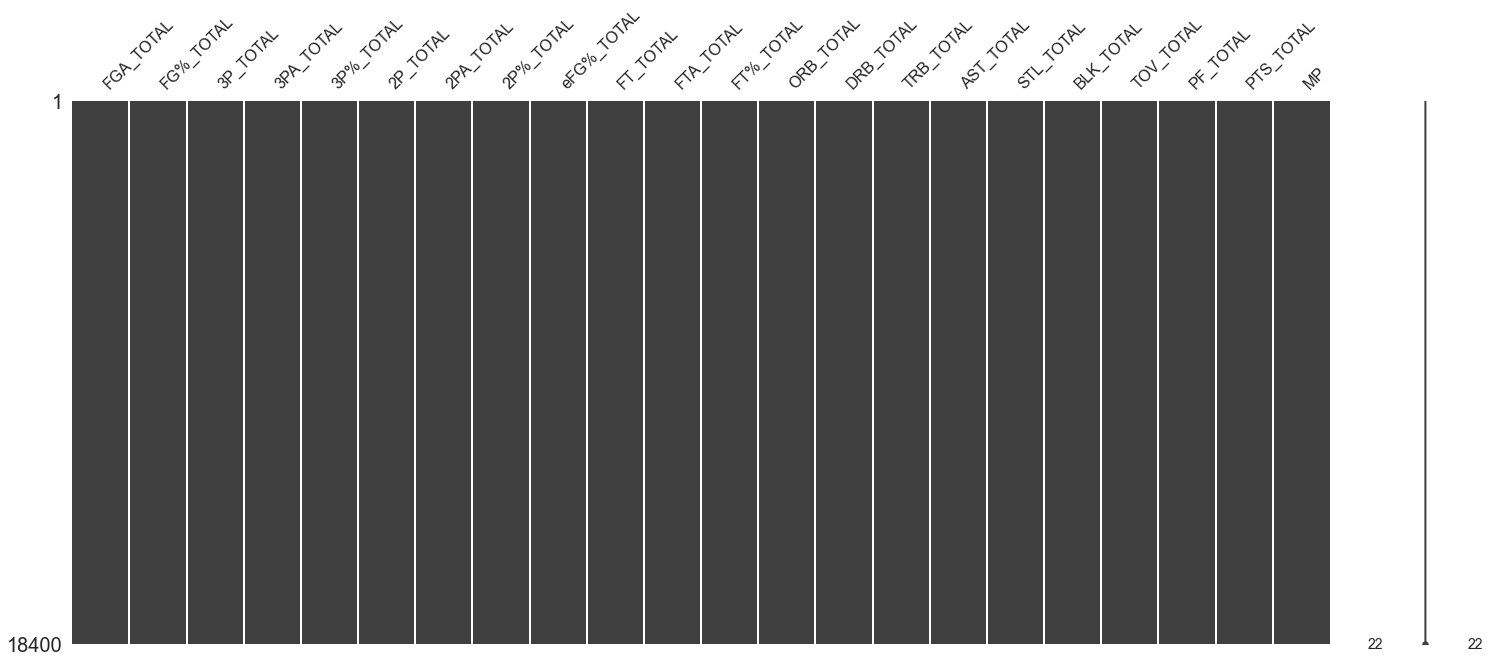

In [44]:
N = 33
M = 55

_columns  = NBA_stats_RS_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))

TS%      0.0
3PAr     0.0
FTr      0.0
ORB%     0.0
DRB%     0.0
TRB%     0.0
AST%     0.0
STL%     0.0
BLK%     0.0
TOV%     0.0
USG%     0.0
OWS      0.0
DWS      0.0
WS       0.0
WS/48    0.0
OBPM     0.0
DBPM     0.0
BPM      0.0
VORP     0.0
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)


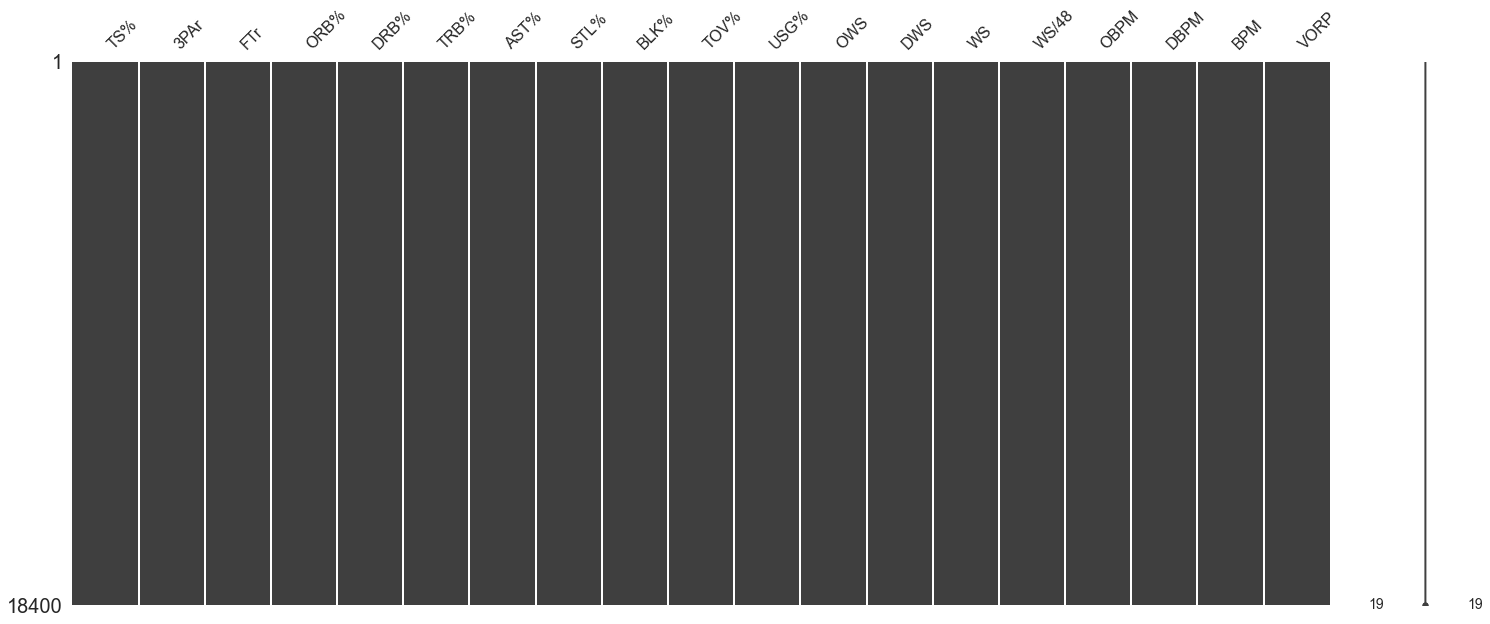

In [45]:
N = 56
M = 76

_columns  = NBA_stats_RS_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))

In [47]:
#Esto se podrá eliminar
NBA_stats_RS_BS_df_7 = NBA_stats_RS_BS_df_6.dropna().reset_index(drop=True)
len(NBA_stats_RS_BS_df_7['URL'].unique())

2804

In [48]:
NBA_stats_RS_BS_df_7.dtypes

SEASON     object
AGE         int64
TEAM       object
LEAGUE     object
POS        object
           ...   
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Length: 75, dtype: object

In [50]:
# Esto se podrá eliminar
_columns_PG = [col for col in NBA_stats_RS_BS_df_7.columns if '_PER_GAME' in col]

for col in _columns_PG:
    
    NBA_stats_RS_BS_df_7[col] = NBA_stats_RS_BS_df_7[col].astype('float64')

print(NBA_stats_RS_BS_df_7[_columns_PG].dtypes)

MP_PER_GAME      float64
FG_PER_GAME      float64
FGA_PER_GAME     float64
FG%_PER_GAME     float64
3P_PER_GAME      float64
3PA_PER_GAME     float64
3P%_PER_GAME     float64
2P_PER_GAME      float64
2PA_PER_GAME     float64
2P%_PER_GAME     float64
eFG%_PER_GAME    float64
FT_PER_GAME      float64
FTA_PER_GAME     float64
FT%_PER_GAME     float64
ORB_PER_GAME     float64
DRB_PER_GAME     float64
TRB_PER_GAME     float64
AST_PER_GAME     float64
STL_PER_GAME     float64
BLK_PER_GAME     float64
TOV_PER_GAME     float64
PF_PER_GAME      float64
PTS_PER_GAME     float64
dtype: object


Estudiamos las correlaciones por subsets para empezar a eliminar columnas...

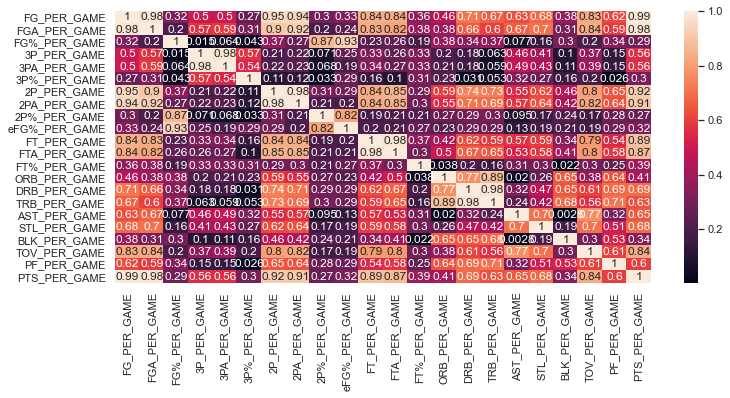

Columnas con una correlación >0.95:
['FGA_PER_GAME', '3PA_PER_GAME', '2P_PER_GAME', '2PA_PER_GAME', 'FTA_PER_GAME', 'TRB_PER_GAME', 'PTS_PER_GAME']
7


In [52]:
#Falta hacer cleaning de tipo de dato
N = 9
M = 31

_columns  = NBA_stats_RS_BS_df_7.iloc[: , N:M]

corrMatrix = _columns.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.95:')
print(to_drop)
print(len(to_drop))

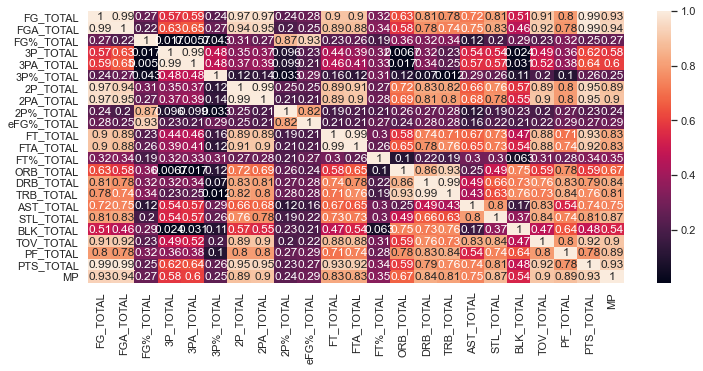

Columnas con una correlación >0.95:
['FGA_TOTAL', '3PA_TOTAL', '2P_TOTAL', '2PA_TOTAL', 'FTA_TOTAL', 'TRB_TOTAL', 'PTS_TOTAL']
7


In [53]:
#Falta hacer cleaning de tipo de dato
N = 32
M = 55

_columns  = NBA_stats_RS_BS_df_7.iloc[: , N:M]

corrMatrix = _columns.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop_1 = [column for column in upper.columns if any(upper[column] > 0.95)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.95:')
print(to_drop_1)
print(len(to_drop_1))

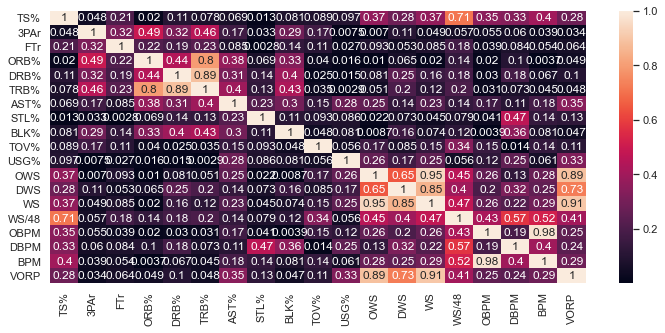

Columnas con una correlación >0.95:
['BPM']
1


In [54]:
#Falta hacer cleaning de tipo de dato
N = 56
M = 76

_columns  = NBA_stats_RS_BS_df_7.iloc[: , N:M]

corrMatrix = _columns.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop_2 = [column for column in upper.columns if any(upper[column] > 0.95)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.95:')
print(to_drop_2)
print(len(to_drop_2))

In [55]:
to_drop.extend(to_drop_1)
to_drop.extend(to_drop_2)
to_drop

['FGA_PER_GAME',
 '3PA_PER_GAME',
 '2P_PER_GAME',
 '2PA_PER_GAME',
 'FTA_PER_GAME',
 'TRB_PER_GAME',
 'PTS_PER_GAME',
 'FGA_TOTAL',
 '3PA_TOTAL',
 '2P_TOTAL',
 '2PA_TOTAL',
 'FTA_TOTAL',
 'TRB_TOTAL',
 'PTS_TOTAL',
 'BPM']

In [56]:
NBA_stats_RS_BS_df_8 = NBA_stats_RS_BS_df_7.drop(columns=to_drop)
NBA_stats_RS_BS_df_8.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG_PER_GAME,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,VORP
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,1.3,...,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-0.2
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,2.5,...,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-2.3,-0.4,-0.1
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,3.3,...,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.4,-1.5,-0.6
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,2.2,...,1.6,17.1,20.5,0.0,0.2,0.1,0.035,-3.3,-0.2,-0.1
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,3.5,...,1.2,15.4,20.5,0.7,1.2,1.9,0.079,-2.3,-1.7,-0.6


In [57]:
corrMatrix = NBA_stats_RS_BS_df_8.corr().abs()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop_combined = [column for column in upper.columns if any(upper[column] > 0.85)] #Podemos jugar con el threshold
print('Columnas de todo el Dataframe con una correlación >0.85:')
print('')
print(to_drop_combined)
print('')
print('Un total de ' + str(len(to_drop_combined)) + ' columnas...')

Columnas de todo el Dataframe con una correlación >0.85:

['FG_PER_GAME', '2P%_PER_GAME', 'eFG%_PER_GAME', 'MP_TOTAL', 'FG_TOTAL', 'FG%_TOTAL', '3P_TOTAL', '3P%_TOTAL', '2P%_TOTAL', 'eFG%_TOTAL', 'FT_TOTAL', 'FT%_TOTAL', 'ORB_TOTAL', 'DRB_TOTAL', 'AST_TOTAL', 'STL_TOTAL', 'BLK_TOTAL', 'TOV_TOTAL', 'PF_TOTAL', 'MP', 'TS%', 'TRB%', 'DWS', 'WS', 'WS/48', 'VORP']

Un total de 26 columnas...


In [58]:
NBA_stats_RS_BS_df_9 = NBA_stats_RS_BS_df_8.drop(columns=to_drop_combined)
NBA_stats_RS_BS_df_9.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,OBPM,DBPM
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,0.474,...,10.4,23.4,5.8,0.7,2.5,14.0,22.1,0.0,-3.4,-1.2
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,0.493,...,9.5,20.9,4.7,1.3,1.1,14.0,20.6,0.6,-2.3,-0.4
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,0.518,...,11.0,18.1,3.0,1.0,1.2,15.6,20.5,0.7,-2.4,-1.5
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,0.464,...,8.6,18.3,9.5,1.9,1.6,17.1,20.5,0.0,-3.3,-0.2
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,0.525,...,11.3,18.1,2.2,0.8,1.2,15.4,20.5,0.7,-2.3,-1.7


In [59]:
NBA_stats_RS_BS_df_9.dtypes

SEASON           object
AGE               int64
TEAM             object
LEAGUE           object
POS              object
G                 int64
GS                int64
URL              object
MP_PER_GAME     float64
FG%_PER_GAME    float64
3P_PER_GAME     float64
3P%_PER_GAME    float64
FT_PER_GAME     float64
FT%_PER_GAME    float64
ORB_PER_GAME    float64
DRB_PER_GAME    float64
AST_PER_GAME    float64
STL_PER_GAME    float64
BLK_PER_GAME    float64
TOV_PER_GAME    float64
PF_PER_GAME     float64
PER             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
OBPM            float64
DBPM            float64
dtype: object

#### Creación de variables antes de agregación del DF

##### Partidos no jugados en cada temporada 
Partiendo de 82 partidos totales posible, no considerando años de lock-out/Covid/...)

In [63]:
NBA_stats_RS_BS_df_10 = NBA_stats_RS_BS_df_9.copy()

NBA_stats_RS_BS_df_10['MISSED_GAMES'] = NBA_stats_RS_BS_df_10.apply(lambda x: 82 - x['G'],axis=1)

<AxesSubplot:>

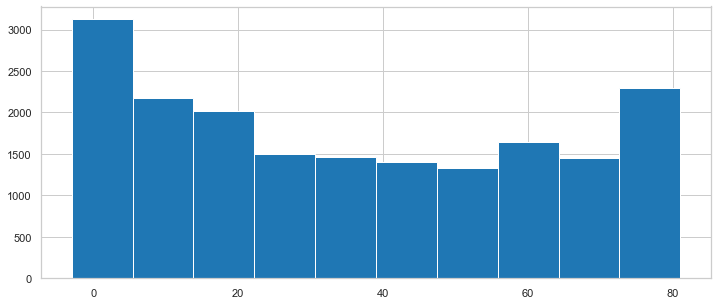

In [64]:
NBA_stats_RS_BS_df_10['MISSED_GAMES'].hist()

In [65]:
def significant_season_calculation(row):
    
    threshold_1 = 0.7 #jugamos para que almenos cada jugador tenga una temporada significativa (99,5% lo cumplen)
    threshold_2 = 0.7
    
    mean_minutes = NBA_mean_games_minutes[NBA_mean_games_minutes['URL']==row['URL']]['MP_PER_GAME'].values[0]
    
    mean_games = NBA_mean_games_minutes[NBA_mean_games_minutes['URL']==row['URL']]['G'].values[0]
    
    if row['MP_PER_GAME'] > (mean_minutes*threshold_1) and row['G'] > (mean_games*threshold_2):
        return 1
    else:
        return 0

In [66]:
NBA_mean_games_minutes = NBA_stats_RS_BS_df_10[['URL','G','MP_PER_GAME']].groupby(by='URL').mean().reset_index()
NBA_mean_games_minutes.head() #Para que la función anterior vaya más rápida

,URL,G,MP_PER_GAME
0,/players/a/abdelal01.html,42.777778,12.211111
1,/players/a/abdulma02.html,65.111111,25.466667
2,/players/a/abdulta01.html,32.100000,19.230000
3,/players/a/abdursh01.html,65.357143,32.450000
4,/players/a/abrinal01.html,58.000000,16.533333


In [67]:
NBA_stats_RS_BS_df_10['SIGNIFICANT_SEASON'] = NBA_stats_RS_BS_df_10.apply(lambda x: significant_season_calculation(x),axis=1)

In [68]:
NBA_stats_RS_BS_df_10['SIGNIFICANT_SEASON'].value_counts()

1    12165
0     6221
Name: SIGNIFICANT_SEASON, dtype: int64

In [69]:
URL_ok = NBA_stats_RS_BS_df_10[NBA_stats_RS_BS_df_10['SIGNIFICANT_SEASON']==1]['URL'].unique()
len(NBA_stats_RS_BS_df_10[NBA_stats_RS_BS_df_10['SIGNIFICANT_SEASON']==1]['URL'].unique())

2775

In [70]:
NBA_stats_RS_BS_df_10[(NBA_stats_RS_BS_df_10['SIGNIFICANT_SEASON']==0) & (NBA_stats_RS_BS_df_10['URL'].isin(URL_ok) == False)]

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,AST%,STL%,BLK%,TOV%,USG%,OWS,OBPM,DBPM,MISSED_GAMES,SIGNIFICANT_SEASON
1694,2013-14,21,BOS,NBA,SG,3,0,/players/b/blueva01.html,5.0,0.500,...,10.7,0.0,0.0,24.4,24.3,-0.1,-10.0,-3.8,79,0
1695,2014-15,22,LAL,NBA,SG,2,1,/players/b/blueva01.html,37.0,0.300,...,16.8,2.1,0.0,15.7,23.0,-0.3,-6.5,-3.3,80,0
1696,2017-18,25,LAL,NBA,SG,5,0,/players/b/blueva01.html,9.0,0.200,...,8.2,1.1,0.0,33.8,8.4,-0.1,-7.6,-0.7,77,0
1942,1999-00,26,PHI,NBA,SG,11,0,/players/b/bowmair01.html,1.8,1.000,...,7.6,2.6,0.0,25.8,8.5,0.0,0.3,3.4,71,0
1943,2000-01,27,ATL,NBA,PG,3,0,/players/b/bowmair01.html,6.3,0.000,...,50.5,0.0,0.0,33.3,7.1,0.0,0.0,-1.7,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17469,2012-13,30,NYK,NBA,SF,57,16,/players/w/whiteja02.html,7.6,0.431,...,10.3,1.6,0.8,12.0,15.2,0.1,-3.3,0.2,25,0
18186,2005-06,21,MIN,NBA,SG,7,0,/players/w/wrighbr02.html,19.3,0.412,...,6.5,0.4,0.0,12.1,23.2,0.1,-0.5,-2.2,75,0
18187,2006-07,22,MIN,NBA,SG,19,0,/players/w/wrighbr02.html,10.0,0.400,...,12.7,2.5,0.4,8.1,18.1,0.2,-0.8,-0.1,63,0
18207,2011-12,23,GSW,NBA,SF,24,1,/players/w/wrighch01.html,7.8,0.511,...,3.3,2.0,5.4,12.0,16.5,0.5,0.0,0.1,58,0


Eliminamos a **39** jugadores que no tienen temporadas significativas... 

In [71]:
NBA_stats_RS_BS_df_11 = NBA_stats_RS_BS_df_10[NBA_stats_RS_BS_df_10['URL'].isin(URL_ok)==True].reset_index(drop=True)
NBA_stats_RS_BS_df_11

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,AST%,STL%,BLK%,TOV%,USG%,OWS,OBPM,DBPM,MISSED_GAMES,SIGNIFICANT_SEASON
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,0.474,...,5.8,0.7,2.5,14.0,22.1,0.0,-3.4,-1.2,39,0
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,0.493,...,4.7,1.3,1.1,14.0,20.6,0.6,-2.3,-0.4,11,1
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,0.518,...,3.0,1.0,1.2,15.6,20.5,0.7,-2.4,-1.5,7,1
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,0.464,...,9.5,1.9,1.6,17.1,20.5,0.0,-3.3,-0.2,70,0
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,0.525,...,2.2,0.8,1.2,15.4,20.5,0.7,-2.3,-1.7,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html,15.6,0.580,...,7.3,0.4,4.3,12.9,20.5,1.1,-0.3,0.1,49,0
18303,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html,20.2,0.538,...,10.9,0.9,3.6,14.8,20.1,0.7,-0.2,-0.5,56,0
18304,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html,18.4,0.613,...,9.1,0.6,4.4,11.8,16.4,4.4,1.9,0.9,10,1
18305,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html,22.3,0.652,...,7.9,0.7,3.4,14.7,15.1,4.8,0.6,0.4,10,1


In [72]:
len(NBA_stats_RS_BS_df_11['URL'].unique())

2775

#### 3.2.1.2 Merge con ALL teams

In [73]:
all_teams_df

,TEAM_3_LETTERS,SEASON,LEAGUE,Team,W,L,W/L%,FINISH,SRS,PACE,REL_PACE,ORtg,REL_ORTG,DRTG,REL_DRTG,PLAYOFFS
0,ATL,2021-22,NBA,Atlanta Hawks*,43,39,0.524,2nd of 5,1.55,97.7,-0.5,116.5,4.5,114.9,2.9,Lost E. Conf. 1st Rnd.
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,1st of 5,2.14,97.6,-1.6,115.7,3.4,113.3,1.0,Lost E. Conf. Finals
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,5th of 5,-7.71,103.0,2.7,107.2,-3.4,114.8,4.2,False
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,5th of 5,-6.06,103.9,3.9,108.1,-2.3,113.9,3.5,False
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,5th of 5,-5.30,98.3,1.0,105.0,-3.6,110.6,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,WAS,1965-66,NBA,Baltimore Bullets*,38,42,0.475,2nd of 5,-1.06,123.1,1.7,95.8,0.9,96.8,1.9,Lost W. Div. Semis
1599,WAS,1964-65,NBA,Baltimore Bullets*,37,43,0.463,3rd of 5,-1.97,116.2,-1.1,96.8,3.2,98.7,5.1,Lost W. Div. Finals
1600,WAS,1963-64,NBA,Baltimore Bullets,31,49,0.388,4th of 5,-1.59,117.0,3.8,95.0,0.4,96.6,2.0,False
1601,WAS,1962-63,NBA,Chicago Zephyrs,25,55,0.313,5th of 5,-3.63,112.2,-2.8,97.5,1.6,101.1,5.2,False


In [74]:
all_teams_df['PLAYOFFS'].unique()

array(['Lost E. Conf. 1st Rnd.', 'Lost E. Conf. Finals', 'False',
       'Lost E. Conf. Semis', 'Lost W. Div. Finals', 'Lost W. Div. Semis',
       'Lost Finals', 'Won Finals', 'Won E. Conf. Semis',
       'Lost E. Div. Finals', 'Lost E. Div. Semis', 'Lost Quarterfinals',
       'Lost W. Conf. 1st Rnd.', 'Lost W. Conf. Finals',
       'Lost W. Conf. Semis', 'Lost W. Div. Tiebreaker',
       'Eliminated in W. Div. Rnd. Robin', 'Lost Central Div. Finals',
       'Won W. Conf. Finals', 'Lost 1st Rnd.',
       'Lost E. Div. Third Place Tiebreaker',
       'Eliminated in E. Div. Rnd. Robin', 'Lost Semis',
       'Lost Central Div. Semis'], dtype=object)

In [75]:
all_teams_df['NBA_CHAMPION'] = all_teams_df['PLAYOFFS'].apply(lambda x: 1 if x=='Won Finals' else 0)
all_teams_df['NBA_CHAMPION'].value_counts() #está ok!

0    1524
1      79
Name: NBA_CHAMPION, dtype: int64

In [76]:
all_teams_df.dtypes

TEAM_3_LETTERS     object
SEASON             object
LEAGUE             object
Team               object
W                   int64
L                   int64
W/L%              float64
FINISH             object
SRS               float64
PACE              float64
REL_PACE          float64
ORtg              float64
REL_ORTG          float64
DRTG              float64
REL_DRTG          float64
PLAYOFFS           object
NBA_CHAMPION        int64
dtype: object

In [77]:
#print(all_teams_df.isna().sum())
#all_teams_df[all_teams_df['PACE'].isna()] #no son equipos relevantes...

OJO: no creamos una variable de Playoff 1/0 porque al hacer las variables de playoff por jugador ya tendremos si han jugado o no...

In [78]:
all_teams_df.columns

Index(['TEAM_3_LETTERS', 'SEASON', 'LEAGUE', 'Team', 'W', 'L', 'W/L%',
       'FINISH', 'SRS', 'PACE', 'REL_PACE', 'ORtg', 'REL_ORTG', 'DRTG',
       'REL_DRTG', 'PLAYOFFS', 'NBA_CHAMPION'],
      dtype='object')

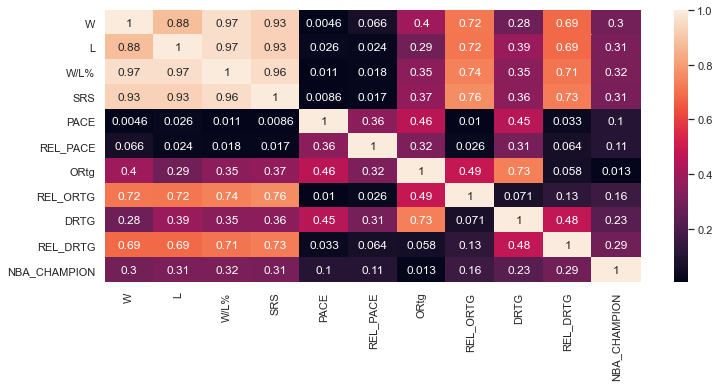

In [79]:
corrMatrix = all_teams_df.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [80]:
all_teams_df = all_teams_df.rename(columns={'TEAM_3_LETTERS':'TEAM','ORtg':'OFF_TEAM_RTG','DRTG':'DEFF_TEAM_RTG','W/L%':'W/L%_TEAM'})
all_teams_df.head()

,TEAM,SEASON,LEAGUE,Team,W,L,W/L%_TEAM,FINISH,SRS,PACE,REL_PACE,OFF_TEAM_RTG,REL_ORTG,DEFF_TEAM_RTG,REL_DRTG,PLAYOFFS,NBA_CHAMPION
0,ATL,2021-22,NBA,Atlanta Hawks*,43,39,0.524,2nd of 5,1.55,97.7,-0.5,116.5,4.5,114.9,2.9,Lost E. Conf. 1st Rnd.,0
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,1st of 5,2.14,97.6,-1.6,115.7,3.4,113.3,1.0,Lost E. Conf. Finals,0
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,5th of 5,-7.71,103.0,2.7,107.2,-3.4,114.8,4.2,False,0
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,5th of 5,-6.06,103.9,3.9,108.1,-2.3,113.9,3.5,False,0
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,5th of 5,-5.30,98.3,1.0,105.0,-3.6,110.6,2.0,False,0


In [83]:
#No añadimos demasiadas columnas, porque el clustering es de jugadores, no de equipos...
NBA_stats_RS_BS_df_12 = NBA_stats_RS_BS_df_11.merge(all_teams_df[['TEAM', 'SEASON', 'OFF_TEAM_RTG', 'DEFF_TEAM_RTG',
                                                                 'W/L%_TEAM','NBA_CHAMPION']], how='left',on=['SEASON','TEAM'])
NBA_stats_RS_BS_df_13 = NBA_stats_RS_BS_df_12.drop_duplicates().reset_index(drop=True)
NBA_stats_RS_BS_df_12

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,USG%,OWS,OBPM,DBPM,MISSED_GAMES,SIGNIFICANT_SEASON,OFF_TEAM_RTG,DEFF_TEAM_RTG,W/L%_TEAM,NBA_CHAMPION
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,0.474,...,22.1,0.0,-3.4,-1.2,39,0,112.8,104.3,0.768,0.0
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,0.493,...,20.6,0.6,-2.3,-0.4,11,1,111.4,104.2,0.695,0.0
2,1992-93,24,TOT,NBA,PF,75,52,/players/a/abdelal01.html,17.5,0.518,...,20.5,0.7,-2.4,-1.5,7,1,NaN,NaN,NaN,NaN
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,0.464,...,20.5,0.0,-3.3,-0.2,70,0,106.2,110.1,0.341,0.0
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,0.525,...,20.5,0.7,-2.3,-1.7,19,1,108.7,107.8,0.585,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html,15.6,0.580,...,20.5,1.1,-0.3,0.1,49,0,107.8,109.5,0.451,0.0
18303,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html,20.2,0.538,...,20.1,0.7,-0.2,-0.5,56,0,112.4,111.5,0.585,0.0
18304,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html,18.4,0.613,...,16.4,4.4,1.9,0.9,10,1,113.9,107.6,0.681,0.0
18305,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html,22.3,0.652,...,15.1,4.8,0.6,0.4,10,1,117.6,111.2,0.653,0.0


In [84]:
NBA_stats_RS_BS_df_13[NBA_stats_RS_BS_df_13['NBA_CHAMPION'].isna()]['TEAM'].unique()

array(['TOT', 'VAN', 'WSB', 'BRK', 'CHH', 'NOP', 'SEA', 'NOK', 'CHO'],
      dtype=object)

In [85]:
NBA_stats_RS_BS_df_13[NBA_stats_RS_BS_df_13['TEAM']=='CHO'].head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,USG%,OWS,OBPM,DBPM,MISSED_GAMES,SIGNIFICANT_SEASON,OFF_TEAM_RTG,DEFF_TEAM_RTG,W/L%_TEAM,NBA_CHAMPION
880,2017-18,22,CHO,NBA,SG,53,6,/players/b/bacondw01.html,13.5,0.375,...,13.7,-0.7,-4.8,0.1,29,1,NaN,NaN,NaN,NaN
881,2018-19,23,CHO,NBA,SG,43,13,/players/b/bacondw01.html,17.7,0.475,...,16.8,0.9,-2.1,-1.6,39,1,NaN,NaN,NaN,NaN
882,2019-20,24,CHO,NBA,SG,39,11,/players/b/bacondw01.html,17.6,0.348,...,19.5,-1.2,-5.9,-0.9,43,1,NaN,NaN,NaN,NaN
935,2020-21,19,CHO,NBA,PG,51,31,/players/b/ballla01.html,28.8,0.436,...,26.1,1.0,1.1,0.7,31,1,NaN,NaN,NaN,NaN
936,2021-22,20,CHO,NBA,PG,75,75,/players/b/ballla01.html,32.3,0.429,...,28.2,3.4,3.3,0.2,7,1,NaN,NaN,NaN,NaN


In [86]:
#all_teams_df[all_teams_df['SEASON']=='2017-18']

Buscamos manualmente las correspondencias de algunos equipos de 3 letras mal mapeados...
 - TOT -> BOS :: **a veces temporadas en que ha jugado en mas de un equipo...**
 - VAN -> MEM
 - WSB -> WAS
 - BRK -> NJN
 - CHH -> CHA
 - NOP -> NOH
 - SEA -> OKC
 - NOK -> NOH
 - CHO -> CHA

In [87]:
NBA_stats_RS_BS_df_aux = NBA_stats_RS_BS_df_11.copy()

NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='TOT', value='BOS', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='VAN', value='MEM', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='WSB', value='WAS', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='BRK', value='NJN', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='CHH', value='CHA', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='NOP', value='NOH', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='SEA', value='OKC', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='NOK', value='NOH', regex=False)
NBA_stats_RS_BS_df_aux['TEAM'] = NBA_stats_RS_BS_df_aux['TEAM'].replace(to_replace='CHO', value='CHA', regex=False)

In [88]:
NBA_stats_RS_BS_df_aux.head()

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,AST%,STL%,BLK%,TOV%,USG%,OWS,OBPM,DBPM,MISSED_GAMES,SIGNIFICANT_SEASON
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,0.474,...,5.8,0.7,2.5,14.0,22.1,0.0,-3.4,-1.2,39,0
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,0.493,...,4.7,1.3,1.1,14.0,20.6,0.6,-2.3,-0.4,11,1
2,1992-93,24,BOS,NBA,PF,75,52,/players/a/abdelal01.html,17.5,0.518,...,3.0,1.0,1.2,15.6,20.5,0.7,-2.4,-1.5,7,1
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,0.464,...,9.5,1.9,1.6,17.1,20.5,0.0,-3.3,-0.2,70,0
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,0.525,...,2.2,0.8,1.2,15.4,20.5,0.7,-2.3,-1.7,19,1


In [89]:
NBA_stats_RS_BS_df_12 = NBA_stats_RS_BS_df_aux.merge(all_teams_df[['TEAM', 'SEASON', 'OFF_TEAM_RTG', 'DEFF_TEAM_RTG',
                                                                 'W/L%_TEAM','NBA_CHAMPION']], how='left',on=['SEASON','TEAM'])
NBA_stats_RS_BS_df_13 = NBA_stats_RS_BS_df_12.drop_duplicates().reset_index(drop=True)
NBA_stats_RS_BS_df_13

,SEASON,AGE,TEAM,LEAGUE,POS,G,GS,URL,MP_PER_GAME,FG%_PER_GAME,...,USG%,OWS,OBPM,DBPM,MISSED_GAMES,SIGNIFICANT_SEASON,OFF_TEAM_RTG,DEFF_TEAM_RTG,W/L%_TEAM,NBA_CHAMPION
0,1990-91,22,POR,NBA,PF,43,0,/players/a/abdelal01.html,6.7,0.474,...,22.1,0.0,-3.4,-1.2,39,0,112.8,104.3,0.768,0
1,1991-92,23,POR,NBA,PF,71,1,/players/a/abdelal01.html,13.2,0.493,...,20.6,0.6,-2.3,-0.4,11,1,111.4,104.2,0.695,0
2,1992-93,24,BOS,NBA,PF,75,52,/players/a/abdelal01.html,17.5,0.518,...,20.5,0.7,-2.4,-1.5,7,1,108.7,107.8,0.585,0
3,1992-93,24,MIL,NBA,PF,12,0,/players/a/abdelal01.html,13.3,0.464,...,20.5,0.0,-3.3,-0.2,70,0,106.2,110.1,0.341,0
4,1992-93,24,BOS,NBA,PF,63,52,/players/a/abdelal01.html,18.3,0.525,...,20.5,0.7,-2.3,-1.7,19,1,108.7,107.8,0.585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,2018-19,21,LAL,NBA,C,33,12,/players/z/zubaciv01.html,15.6,0.580,...,20.5,1.1,-0.3,0.1,49,0,107.8,109.5,0.451,0
18303,2018-19,21,LAC,NBA,C,26,25,/players/z/zubaciv01.html,20.2,0.538,...,20.1,0.7,-0.2,-0.5,56,0,112.4,111.5,0.585,0
18304,2019-20,22,LAC,NBA,C,72,70,/players/z/zubaciv01.html,18.4,0.613,...,16.4,4.4,1.9,0.9,10,1,113.9,107.6,0.681,0
18305,2020-21,23,LAC,NBA,C,72,33,/players/z/zubaciv01.html,22.3,0.652,...,15.1,4.8,0.6,0.4,10,1,117.6,111.2,0.653,0


In [90]:
NBA_stats_RS_BS_df_13[NBA_stats_RS_BS_df_13['NBA_CHAMPION'].isna()]['TEAM'].unique() #Problema corregido

array([], dtype=object)

In [92]:
print(len(NBA_stats_RS_BS_df_13['URL'].unique()))

2775


#### 3.2.1.3 Agregación (Groupby) del Dataframe para obtener un registro por jugador

Creamos algunos DF y variables que usaremos para las funciones a calcular en el groupby

In [93]:
cols_for_count = ['URL','NBA_CHAMPION','TEAM','SEASON']

In [95]:
count_df = NBA_stats_RS_BS_df_13[cols_for_count].groupby(by=['URL','TEAM']).agg({
    'SEASON':'count','NBA_CHAMPION':'sum'}).rename(columns={
    'SEASON':'N_SEASONS'}).reset_index()
count_df

,URL,TEAM,N_SEASONS,NBA_CHAMPION
0,/players/a/abdelal01.html,BOS,4,0
1,/players/a/abdelal01.html,MIL,1,0
2,/players/a/abdelal01.html,PHI,1,0
3,/players/a/abdelal01.html,POR,2,0
4,/players/a/abdelal01.html,SAC,1,0
...,...,...,...,...
9112,/players/z/zipsepa01.html,CHI,2,0
9113,/players/z/zizican01.html,CLE,3,0
9114,/players/z/zubaciv01.html,BOS,1,0
9115,/players/z/zubaciv01.html,LAC,4,0


In [96]:
count_df_2 = count_df.groupby(by='URL').agg({'N_SEASONS':'mean','TEAM':'count','NBA_CHAMPION':'sum'}).reset_index().rename(columns={
    'N_SEASONS':'MEAN_N_SEASONS_X_TEAM','TEAM':'N_TEAMS','NBA_CHAMPION':'N_NBA_CHAMPION'})
count_df_2.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION
0,/players/a/abdelal01.html,1.8,5,0
1,/players/a/abdulma02.html,3.0,3,0
2,/players/a/abdulta01.html,2.0,5,0
3,/players/a/abdursh01.html,2.8,5,0
4,/players/a/abrinal01.html,3.0,1,0


In [97]:
count_df_2[count_df_2['N_NBA_CHAMPION']>0].head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION
10,/players/a/adamsja01.html,1.000000,2,1
19,/players/a/agerma01.html,1.500000,4,1
21,/players/a/ajincal01.html,1.800000,5,1
46,/players/a/allenma01.html,1.555556,9,1
48,/players/a/allenra02.html,5.000000,4,2


El número de posiciones, la posición más común y temporadas distintas lo calculamos a parte

In [99]:
n_positions_seasons = NBA_stats_RS_BS_df_13[['URL','SEASON','POS']].groupby(by='URL').agg({
    'POS':[pd.Series.nunique,pd.Series.mode],'SEASON':'count'}).reset_index()
n_positions_seasons.columns = n_positions_seasons.columns.map('_'.join).str.strip('_')
n_positions_seasons = n_positions_seasons.rename(columns={'POS_nunique':'N_POSITIONS','POS_mode':'COMMON_POSITION'
                                                          ,'SEASON_count':'N_SEASONS'})
n_positions_seasons

,URL,N_POSITIONS,COMMON_POSITION,N_SEASONS
0,/players/a/abdelal01.html,1,PF,9
1,/players/a/abdulma02.html,1,PG,9
2,/players/a/abdulta01.html,1,SG,10
3,/players/a/abdursh01.html,3,PF,14
4,/players/a/abrinal01.html,1,SG,3
...,...,...,...,...
2770,/players/z/zimmede01.html,1,PG,1
2771,/players/z/zimmest01.html,1,C,1
2772,/players/z/zipsepa01.html,1,SF,2
2773,/players/z/zizican01.html,1,C,3


In [100]:
count_df_3 = count_df_2.merge(n_positions_seasons,how='left', on='URL')
print(count_df_3.isna().sum())
print(len(count_df_3['URL'].unique()))
count_df_3.head()

URL                      0
MEAN_N_SEASONS_X_TEAM    0
N_TEAMS                  0
N_NBA_CHAMPION           0
N_POSITIONS              0
COMMON_POSITION          0
N_SEASONS                0
dtype: int64
2775


,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,N_SEASONS
0,/players/a/abdelal01.html,1.8,5,0,1,PF,9
1,/players/a/abdulma02.html,3.0,3,0,1,PG,9
2,/players/a/abdulta01.html,2.0,5,0,1,SG,10
3,/players/a/abdursh01.html,2.8,5,0,3,PF,14
4,/players/a/abrinal01.html,3.0,1,0,1,SG,3


Ahora calculamos los 3 dataframes para tener las medias correspondientes y luego hacer el merge

In [101]:
cols_for_mean = ['URL','G', 'GS','MP_PER_GAME', 'FG%_PER_GAME', '3P_PER_GAME', '3P%_PER_GAME',
       'FT_PER_GAME', 'FT%_PER_GAME', 'ORB_PER_GAME', 'DRB_PER_GAME',
       'AST_PER_GAME', 'STL_PER_GAME', 'BLK_PER_GAME', 'TOV_PER_GAME',
       'PF_PER_GAME', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'OBPM', 'DBPM',
       'MISSED_GAMES','OFF_TEAM_RTG', 'DEFF_TEAM_RTG',
       'W/L%_TEAM']

In [102]:
significant_df = NBA_stats_RS_BS_df_13[(NBA_stats_RS_BS_df_13['SIGNIFICANT_SEASON']==1)]
significant_df = significant_df[cols_for_mean]
print(len(significant_df))
print(len(significant_df['URL'].unique()))
significant_df.head()

12165
2775


,URL,G,GS,MP_PER_GAME,FG%_PER_GAME,3P_PER_GAME,3P%_PER_GAME,FT_PER_GAME,FT%_PER_GAME,ORB_PER_GAME,...,BLK%,TOV%,USG%,OWS,OBPM,DBPM,MISSED_GAMES,OFF_TEAM_RTG,DEFF_TEAM_RTG,W/L%_TEAM
1,/players/a/abdelal01.html,71,1,13.2,0.493,0.0,0.0,1.1,0.752,1.1,...,1.1,14.0,20.6,0.6,-2.3,-0.4,11,111.4,104.2,0.695
2,/players/a/abdelal01.html,75,52,17.5,0.518,0.0,0.0,1.2,0.759,1.7,...,1.2,15.6,20.5,0.7,-2.4,-1.5,7,108.7,107.8,0.585
4,/players/a/abdelal01.html,63,52,18.3,0.525,0.0,0.0,1.2,0.760,1.8,...,1.2,15.4,20.5,0.7,-2.3,-1.7,19,108.7,107.8,0.585
6,/players/a/abdelal01.html,54,0,9.4,0.511,0.0,0.0,0.4,0.571,0.7,...,1.8,15.4,25.6,-0.4,-4.4,0.1,28,108.6,110.6,0.427
7,/players/a/abdelal01.html,51,0,9.3,0.532,0.0,0.0,0.4,0.571,0.7,...,1.9,14.5,25.7,-0.1,-3.6,0.5,31,105.5,106.5,0.476


In [103]:
significant_df_1 = significant_df.add_suffix('_SGFCT').rename(columns={'URL_SGFCT':'URL'})

significant_grouped = significant_df_1.groupby(by='URL').mean().reset_index().add_prefix('MEAN_').rename(columns={'MEAN_URL'
                                                                                                    :'URL'})
print(len(significant_grouped['URL'].unique()))
significant_grouped.head()

2775


,URL,MEAN_G_SGFCT,MEAN_GS_SGFCT,MEAN_MP_PER_GAME_SGFCT,MEAN_FG%_PER_GAME_SGFCT,MEAN_3P_PER_GAME_SGFCT,MEAN_3P%_PER_GAME_SGFCT,MEAN_FT_PER_GAME_SGFCT,MEAN_FT%_PER_GAME_SGFCT,MEAN_ORB_PER_GAME_SGFCT,...,MEAN_BLK%_SGFCT,MEAN_TOV%_SGFCT,MEAN_USG%_SGFCT,MEAN_OWS_SGFCT,MEAN_OBPM_SGFCT,MEAN_DBPM_SGFCT,MEAN_MISSED_GAMES_SGFCT,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_DEFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT
0,/players/a/abdelal01.html,62.800000,21.000000,13.540000,0.515800,0.000000,0.000000,0.860000,0.682600,1.200000,...,1.440000,14.980000,22.580000,0.300000,-3.000000,-0.600000,19.200000,108.580000,107.380000,0.553600
1,/players/a/abdulma02.html,73.428571,48.000000,28.600000,0.441857,0.957143,0.343000,1.985714,0.897000,0.400000,...,0.185714,10.414286,25.485714,2.385714,0.600000,-1.600000,8.571429,104.814286,108.128571,0.404286
2,/players/a/abdulta01.html,44.666667,31.833333,20.983333,0.409333,0.050000,0.270333,1.650000,0.698500,1.300000,...,1.266667,14.616667,20.516667,-0.083333,-2.883333,-0.366667,37.333333,102.966667,104.100000,0.480333
3,/players/a/abdursh01.html,73.083333,63.083333,35.250000,0.475667,0.191667,0.280083,4.941667,0.815083,2.308333,...,1.516667,13.341667,24.716667,4.616667,1.733333,-0.700000,8.916667,102.333333,107.416667,0.332333
4,/players/a/abrinal01.html,71.500000,7.000000,15.300000,0.394000,1.250000,0.380500,0.550000,0.873000,0.300000,...,0.600000,7.850000,14.300000,1.250000,-1.600000,0.000000,10.500000,109.500000,107.350000,0.579000


In [104]:
ring_season_df = NBA_stats_RS_BS_df_13[NBA_stats_RS_BS_df_13['NBA_CHAMPION']==1]
ring_season_df = ring_season_df[cols_for_mean]
print(len(ring_season_df))
print(len(ring_season_df['URL'].unique()))
ring_season_df.head()

569
388


,URL,G,GS,MP_PER_GAME,FG%_PER_GAME,3P_PER_GAME,3P%_PER_GAME,FT_PER_GAME,FT%_PER_GAME,ORB_PER_GAME,...,BLK%,TOV%,USG%,OWS,OBPM,DBPM,MISSED_GAMES,OFF_TEAM_RTG,DEFF_TEAM_RTG,W/L%_TEAM
73,/players/a/adamsja01.html,7,0,2.6,0.125,0.0,0.000,0.0,0.000,0.0,...,0.0,0.0,18.6,-0.1,-15.1,-4.6,75,117.2,111.4,0.639
129,/players/a/agerma01.html,26,3,6.3,0.323,0.1,0.158,0.2,0.500,0.2,...,0.4,7.9,21.3,-0.4,-6.8,-4.2,56,110.2,98.9,0.805
140,/players/a/ajincal01.html,10,2,7.5,0.375,0.3,0.429,0.2,0.667,0.5,...,5.1,2.9,21.4,0.0,-3.4,0.5,72,109.7,105.0,0.695
258,/players/a/allenma01.html,73,16,15.0,0.480,0.0,0.500,0.3,0.920,0.9,...,2.2,11.7,16.1,0.1,-3.4,0.0,9,110.2,98.9,0.805
279,/players/a/allenra02.html,73,73,35.9,0.445,2.5,0.398,2.9,0.907,1.0,...,0.5,10.4,21.6,5.6,2.9,0.2,9,110.2,98.9,0.805


In [105]:
ring_season_df_1 = ring_season_df.add_suffix('_RING').rename(columns={'URL_RING':'URL'})

ring_grouped = ring_season_df_1.groupby(by='URL').mean().reset_index().add_prefix('MEAN_').rename(columns={'MEAN_URL'
                                                                                                                :'URL'})

print(len(ring_grouped['URL'].unique()))
ring_grouped.head()

388


,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_MP_PER_GAME_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,...,MEAN_BLK%_RING,MEAN_TOV%_RING,MEAN_USG%_RING,MEAN_OWS_RING,MEAN_OBPM_RING,MEAN_DBPM_RING,MEAN_MISSED_GAMES_RING,MEAN_OFF_TEAM_RTG_RING,MEAN_DEFF_TEAM_RTG_RING,MEAN_W/L%_TEAM_RING
0,/players/a/adamsja01.html,7.0,0.0,2.60,0.125,0.00,0.0000,0.00,0.0000,0.00,...,0.00,0.00,18.60,-0.1,-15.1,-4.6,75.0,117.20,111.4,0.639
1,/players/a/agerma01.html,26.0,3.0,6.30,0.323,0.10,0.1580,0.20,0.5000,0.20,...,0.40,7.90,21.30,-0.4,-6.8,-4.2,56.0,110.20,98.9,0.805
2,/players/a/ajincal01.html,10.0,2.0,7.50,0.375,0.30,0.4290,0.20,0.6670,0.50,...,5.10,2.90,21.40,0.0,-3.4,0.5,72.0,109.70,105.0,0.695
3,/players/a/allenma01.html,73.0,16.0,15.00,0.480,0.00,0.5000,0.30,0.9200,0.90,...,2.20,11.70,16.10,0.1,-3.4,0.0,9.0,110.20,98.9,0.805
4,/players/a/allenra02.html,76.0,36.5,30.85,0.447,2.15,0.4085,2.35,0.8965,0.75,...,0.55,11.45,20.45,4.5,2.0,-0.3,6.0,111.25,101.3,0.805


In [106]:
first_two_seasons = NBA_stats_RS_BS_df_13.groupby('URL').head(2)
first_two_seasons = first_two_seasons[cols_for_mean]
print(len(first_two_seasons))
print(len(first_two_seasons['URL'].unique()))
first_two_seasons.head()

4951
2775


,URL,G,GS,MP_PER_GAME,FG%_PER_GAME,3P_PER_GAME,3P%_PER_GAME,FT_PER_GAME,FT%_PER_GAME,ORB_PER_GAME,...,BLK%,TOV%,USG%,OWS,OBPM,DBPM,MISSED_GAMES,OFF_TEAM_RTG,DEFF_TEAM_RTG,W/L%_TEAM
0,/players/a/abdelal01.html,43,0,6.7,0.474,0.0,0.000,0.6,0.568,0.6,...,2.5,14.0,22.1,0.0,-3.4,-1.2,39,112.8,104.3,0.768
1,/players/a/abdelal01.html,71,1,13.2,0.493,0.0,0.000,1.1,0.752,1.1,...,1.1,14.0,20.6,0.6,-2.3,-0.4,11,111.4,104.2,0.695
9,/players/a/abdulma02.html,67,19,22.5,0.413,0.4,0.240,1.3,0.857,0.5,...,0.1,9.5,27.2,-0.7,-2.0,-3.0,15,105.2,114.7,0.244
10,/players/a/abdulma02.html,81,11,19.0,0.421,0.4,0.330,1.2,0.870,0.3,...,0.2,11.6,26.7,-0.2,-1.2,-1.9,1,100.7,108.6,0.293
18,/players/a/abdulta01.html,59,16,16.3,0.403,0.1,0.211,1.4,0.672,0.7,...,0.9,13.6,22.1,-0.8,-3.6,-1.2,23,100.8,106.9,0.329


Observamos que hay jugadores que han jugado una sola temporada en la NBA..

In [107]:
first_two_seasons_1 = first_two_seasons.add_suffix('_2S').rename(columns={'URL_2S':'URL'})

first_two_seasons_grouped = first_two_seasons_1.groupby(by='URL').mean().reset_index().add_prefix('MEAN_').rename(columns={'MEAN_URL'
                                                                                                                :'URL'})

print(len(first_two_seasons_grouped['URL'].unique()))
first_two_seasons_grouped.head()

2775


,URL,MEAN_G_2S,MEAN_GS_2S,MEAN_MP_PER_GAME_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_FT_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_ORB_PER_GAME_2S,...,MEAN_BLK%_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OWS_2S,MEAN_OBPM_2S,MEAN_DBPM_2S,MEAN_MISSED_GAMES_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,MEAN_W/L%_TEAM_2S
0,/players/a/abdelal01.html,57.0,0.5,9.95,0.4835,0.00,0.0000,0.85,0.6600,0.85,...,1.80,14.00,21.35,0.30,-2.85,-0.80,25.0,112.10,104.25,0.7315
1,/players/a/abdulma02.html,74.0,15.0,20.75,0.4170,0.40,0.2850,1.25,0.8635,0.40,...,0.15,10.55,26.95,-0.45,-1.60,-2.45,8.0,102.95,111.65,0.2685
2,/players/a/abdulta01.html,54.0,32.5,20.45,0.4190,0.10,0.2485,1.65,0.6815,1.10,...,0.85,13.30,20.55,-0.15,-3.05,-0.85,28.0,101.75,105.00,0.4345
3,/players/a/abdursh01.html,81.0,76.5,35.50,0.4690,0.20,0.3355,5.45,0.7650,2.75,...,2.00,13.55,28.00,4.00,1.85,-1.95,1.0,102.20,111.90,0.2015
4,/players/a/abrinal01.html,71.5,7.0,15.30,0.3940,1.25,0.3805,0.55,0.8730,0.30,...,0.60,7.85,14.30,1.25,-1.60,0.00,10.5,109.50,107.35,0.5790


Ahora unimos los distintos DataFrames calculados

In [108]:
golden_record_df = count_df_3.merge(first_two_seasons_grouped, how='left',on='URL')
print(len(golden_record_df['URL'].unique()))
golden_record_df.head()

2775


,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,N_SEASONS,MEAN_G_2S,MEAN_GS_2S,MEAN_MP_PER_GAME_2S,...,MEAN_BLK%_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OWS_2S,MEAN_OBPM_2S,MEAN_DBPM_2S,MEAN_MISSED_GAMES_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,MEAN_W/L%_TEAM_2S
0,/players/a/abdelal01.html,1.8,5,0,1,PF,9,57.0,0.5,9.95,...,1.80,14.00,21.35,0.30,-2.85,-0.80,25.0,112.10,104.25,0.7315
1,/players/a/abdulma02.html,3.0,3,0,1,PG,9,74.0,15.0,20.75,...,0.15,10.55,26.95,-0.45,-1.60,-2.45,8.0,102.95,111.65,0.2685
2,/players/a/abdulta01.html,2.0,5,0,1,SG,10,54.0,32.5,20.45,...,0.85,13.30,20.55,-0.15,-3.05,-0.85,28.0,101.75,105.00,0.4345
3,/players/a/abdursh01.html,2.8,5,0,3,PF,14,81.0,76.5,35.50,...,2.00,13.55,28.00,4.00,1.85,-1.95,1.0,102.20,111.90,0.2015
4,/players/a/abrinal01.html,3.0,1,0,1,SG,3,71.5,7.0,15.30,...,0.60,7.85,14.30,1.25,-1.60,0.00,10.5,109.50,107.35,0.5790


In [109]:
golden_record_df_1 = golden_record_df.merge(significant_grouped, how='left',on='URL')
print(len(golden_record_df_1['URL'].unique()))
print(golden_record_df_1.columns[golden_record_df_1.isnull().any()]) #no hay ningun NaN
golden_record_df_1.head()

2775
Index([], dtype='object')


,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,N_SEASONS,MEAN_G_2S,MEAN_GS_2S,MEAN_MP_PER_GAME_2S,...,MEAN_BLK%_SGFCT,MEAN_TOV%_SGFCT,MEAN_USG%_SGFCT,MEAN_OWS_SGFCT,MEAN_OBPM_SGFCT,MEAN_DBPM_SGFCT,MEAN_MISSED_GAMES_SGFCT,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_DEFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT
0,/players/a/abdelal01.html,1.8,5,0,1,PF,9,57.0,0.5,9.95,...,1.440000,14.980000,22.580000,0.300000,-3.000000,-0.600000,19.200000,108.580000,107.380000,0.553600
1,/players/a/abdulma02.html,3.0,3,0,1,PG,9,74.0,15.0,20.75,...,0.185714,10.414286,25.485714,2.385714,0.600000,-1.600000,8.571429,104.814286,108.128571,0.404286
2,/players/a/abdulta01.html,2.0,5,0,1,SG,10,54.0,32.5,20.45,...,1.266667,14.616667,20.516667,-0.083333,-2.883333,-0.366667,37.333333,102.966667,104.100000,0.480333
3,/players/a/abdursh01.html,2.8,5,0,3,PF,14,81.0,76.5,35.50,...,1.516667,13.341667,24.716667,4.616667,1.733333,-0.700000,8.916667,102.333333,107.416667,0.332333
4,/players/a/abrinal01.html,3.0,1,0,1,SG,3,71.5,7.0,15.30,...,0.600000,7.850000,14.300000,1.250000,-1.600000,0.000000,10.500000,109.500000,107.350000,0.579000


**No añadimos aquí las variables de _RING, dado que montaremos tres golden records: REGULAR SEASON, PLAYOFF y NO_PLAYOFF**

#### 3.2.1.4 Añadimos la info extra de los jugadores y del Draft

Primero añadimos la info extra

In [110]:
player_extra_info_df.head()

,URL,ALL-ROOKIE,MOST_IMPROVED,ALL_STAR,ALL-DEFENSIVE,ALL-NBA,AST_CHAMP,AS_MVP,BLK_CHAMP,COLLEGE_URL,...,2012_NBA_CHAMP,2013_NBA_CHAMP,2014_NBA_CHAMP,2015_NBA_CHAMP,2016_NBA_CHAMP,2017_NBA_CHAMP,2018_NBA_CHAMP,2019_NBA_CHAMP,2020_NBA_CHAMP,2021_NBA_CHAMP
0,/players/a/abdelal01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/players/a/abdulma02.html,1990-91,1992-93,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,/players/mahmoud-abdul-rauf-1.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/players/a/abdulta01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/players/a/abdursh01.html,1996-97,Not defined,1.0,Not defined,Not defined,Not defined,Not defined,Not defined,/players/shareef-abdur-rahim-1.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/players/a/abrinal01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
URL_ok = golden_record_df_1['URL'].unique()
URL_ok

array(['/players/a/abdelal01.html', '/players/a/abdulma02.html',
       '/players/a/abdulta01.html', ..., '/players/z/zipsepa01.html',
       '/players/z/zizican01.html', '/players/z/zubaciv01.html'],
      dtype=object)

In [112]:
player_extra_info_df_1 = player_extra_info_df[player_extra_info_df['URL'].isin(URL_ok)] 

In [113]:
len(player_extra_info_df_1) #hay duplicados

2997

In [114]:
player_extra_info_df_2 = player_extra_info_df_1.drop_duplicates(subset='URL').reset_index(drop=True)
player_extra_info_df_2

,URL,ALL-ROOKIE,MOST_IMPROVED,ALL_STAR,ALL-DEFENSIVE,ALL-NBA,AST_CHAMP,AS_MVP,BLK_CHAMP,COLLEGE_URL,...,2012_NBA_CHAMP,2013_NBA_CHAMP,2014_NBA_CHAMP,2015_NBA_CHAMP,2016_NBA_CHAMP,2017_NBA_CHAMP,2018_NBA_CHAMP,2019_NBA_CHAMP,2020_NBA_CHAMP,2021_NBA_CHAMP
0,/players/a/abdelal01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/players/a/abdulma02.html,1990-91,1992-93,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,/players/mahmoud-abdul-rauf-1.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/players/a/abdulta01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/players/a/abdursh01.html,1996-97,Not defined,1.0,Not defined,Not defined,Not defined,Not defined,Not defined,/players/shareef-abdur-rahim-1.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/players/a/abrinal01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,/players/z/zimmede01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2771,/players/z/zimmest01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2772,/players/z/zipsepa01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2773,/players/z/zizican01.html,Not defined,Not defined,0.0,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
extra_info_cols = ['URL','ALL-ROOKIE','ALL_STAR','ROY','HALL_OF_FAME'] #las variables relacionadas con el primer año nos interesan

In [118]:
player_extra_info_df_2[extra_info_cols]

,URL,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME
0,/players/a/abdelal01.html,Not defined,0.0,Not defined,0.0
1,/players/a/abdulma02.html,1990-91,0.0,Not defined,0.0
2,/players/a/abdulta01.html,Not defined,0.0,Not defined,0.0
3,/players/a/abdursh01.html,1996-97,1.0,Not defined,0.0
4,/players/a/abrinal01.html,Not defined,0.0,Not defined,0.0
...,...,...,...,...,...
2770,/players/z/zimmede01.html,Not defined,0.0,Not defined,0.0
2771,/players/z/zimmest01.html,Not defined,0.0,Not defined,0.0
2772,/players/z/zipsepa01.html,Not defined,0.0,Not defined,0.0
2773,/players/z/zizican01.html,Not defined,0.0,Not defined,0.0


In [121]:
#player_extra_info_df_2['ROY'].value_counts()

In [123]:
player_extra_info_df_2['ROY'] = player_extra_info_df_2['ROY'].apply(lambda x: 0 if x=='Not defined' else 0)
player_extra_info_df_2['ALL-ROOKIE'] = player_extra_info_df_2['ALL-ROOKIE'].apply(lambda x: 0 if x=='Not defined' else 0)
#player_extra_info_df_2

**Aquí estamos suponiendo que las variables son binarias!**

In [124]:
golden_record_df_2 = golden_record_df_1.merge(player_extra_info_df_2[extra_info_cols], how='left',on='URL')

print(len(golden_record_df_2['URL'].unique()))
print(len(golden_record_df_2))
print(golden_record_df_2.columns[golden_record_df_2.isnull().any()]) #no hay ningun NaN
golden_record_df_2.head()

2775
2775
Index([], dtype='object')


,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,N_SEASONS,MEAN_G_2S,MEAN_GS_2S,MEAN_MP_PER_GAME_2S,...,MEAN_OBPM_SGFCT,MEAN_DBPM_SGFCT,MEAN_MISSED_GAMES_SGFCT,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_DEFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME
0,/players/a/abdelal01.html,1.8,5,0,1,PF,9,57.0,0.5,9.95,...,-3.000000,-0.600000,19.200000,108.580000,107.380000,0.553600,0,0.0,0,0.0
1,/players/a/abdulma02.html,3.0,3,0,1,PG,9,74.0,15.0,20.75,...,0.600000,-1.600000,8.571429,104.814286,108.128571,0.404286,0,0.0,0,0.0
2,/players/a/abdulta01.html,2.0,5,0,1,SG,10,54.0,32.5,20.45,...,-2.883333,-0.366667,37.333333,102.966667,104.100000,0.480333,0,0.0,0,0.0
3,/players/a/abdursh01.html,2.8,5,0,3,PF,14,81.0,76.5,35.50,...,1.733333,-0.700000,8.916667,102.333333,107.416667,0.332333,0,1.0,0,0.0
4,/players/a/abrinal01.html,3.0,1,0,1,SG,3,71.5,7.0,15.30,...,-1.600000,0.000000,10.500000,109.500000,107.350000,0.579000,0,0.0,0,0.0


Ahora añadimos la info del draft y otra info básica de jugadores

In [126]:
#players_df = players_df.reset_index(drop=True)
players_df

,URL,NAME,ACTIVE_FROM,ACTIVE_TO,POSITION,COLLEGE,DRAFT_YEAR,DRAFT_PICK,DRAFT_TEAM,BIRTH_DATE(year),HEIGHT(cm),WEIGHT(kg)
0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,1990.0,25.0,POR,1968,208.28,108.86
3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,1990.0,3.0,DEN,1969,185.42,73.48
4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",1997.0,11.0,SAC,1974,198.12,101.15
5,/players/a/abdursh01.html,Shareef Abdur-Rahim,1997,2008,F,California,1996.0,3.0,VAN,1976,205.74,102.06
9,/players/a/abrinal01.html,Álex Abrines,2017,2019,G-F,No College,Undrafted,Undrafted,Undrafted,1993,198.12,90.72
...,...,...,...,...,...,...,...,...,...,...,...,...
5243,/players/z/zimmest01.html,Stephen Zimmerman,2017,2017,C,UNLV,2016.0,41.0,ORL,1996,213.36,108.86
5244,/players/z/zipsepa01.html,Paul Zipser,2017,2018,G-F,No College,2016.0,48.0,CHI,1994,203.20,97.52
5245,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,No College,Undrafted,Undrafted,Undrafted,1997,208.28,120.66
5246,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,Undrafted,Undrafted,Undrafted,1953,215.90,108.86


In [127]:
players_df_1 = players_df[players_df['URL'].isin(URL_ok)] 

In [128]:
players_df_2 = players_df_1.drop_duplicates(subset='URL').reset_index(drop=True)
players_df_2

,URL,NAME,ACTIVE_FROM,ACTIVE_TO,POSITION,COLLEGE,DRAFT_YEAR,DRAFT_PICK,DRAFT_TEAM,BIRTH_DATE(year),HEIGHT(cm),WEIGHT(kg)
0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,1990.0,25.0,POR,1968,208.28,108.86
1,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,1990.0,3.0,DEN,1969,185.42,73.48
2,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",1997.0,11.0,SAC,1974,198.12,101.15
3,/players/a/abdursh01.html,Shareef Abdur-Rahim,1997,2008,F,California,1996.0,3.0,VAN,1976,205.74,102.06
4,/players/a/abrinal01.html,Álex Abrines,2017,2019,G-F,No College,Undrafted,Undrafted,Undrafted,1993,198.12,90.72
...,...,...,...,...,...,...,...,...,...,...,...,...
2770,/players/z/zimmede01.html,Derrick Zimmerman,2006,2006,G,Mississippi State,2003.0,40.0,GSW,1981,190.50,88.45
2771,/players/z/zimmest01.html,Stephen Zimmerman,2017,2017,C,UNLV,2016.0,41.0,ORL,1996,213.36,108.86
2772,/players/z/zipsepa01.html,Paul Zipser,2017,2018,G-F,No College,2016.0,48.0,CHI,1994,203.20,97.52
2773,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,No College,Undrafted,Undrafted,Undrafted,1997,208.28,120.66


Creamos la variable de edad de entrada a la NBA y si está activo, del resto referente a años no queremos coger, dado que preferimos que el **modelo no se vea condicionado a clusterizar por épocas a los jugadores**

In [129]:
players_df_2['AGE_ENTRANCE'] = players_df_2.apply(lambda x: x['ACTIVE_FROM'] - x['BIRTH_DATE(year)'],axis=1)
players_df_2['AGE_ENTRANCE'].value_counts()

23    741
24    632
22    309
25    309
21    261
20    159
26    143
27     79
28     69
29     24
30     21
19     13
31      9
32      4
36      1
33      1
Name: AGE_ENTRANCE, dtype: int64

In [130]:
players_df_2['IS_ACTIVE'] = players_df_2.apply(lambda x: 1 if x['ACTIVE_TO']==2022 else 0,axis=1)
players_df_2['IS_ACTIVE'].value_counts()

0    2178
1     597
Name: IS_ACTIVE, dtype: int64

In [131]:
#players_df[players_df['URL']=='/players/a/abrinal01.html'] #No drafteado

In [132]:
extra_info_cols_2 = ['URL','DRAFT_PICK','HEIGHT(cm)','WEIGHT(kg)','AGE_ENTRANCE','IS_ACTIVE']

In [133]:
golden_record_df_3 = golden_record_df_2.merge(players_df_2[extra_info_cols_2], how='left',on='URL')
print(len(golden_record_df_3['URL'].unique()))
print(len(golden_record_df_3))
print(golden_record_df_3.columns[golden_record_df_3.isnull().any()]) #no hay ningun NaN
golden_record_df_3.head()

2775
2775
Index([], dtype='object')


,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,N_SEASONS,MEAN_G_2S,MEAN_GS_2S,MEAN_MP_PER_GAME_2S,...,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),WEIGHT(kg),AGE_ENTRANCE,IS_ACTIVE
0,/players/a/abdelal01.html,1.8,5,0,1,PF,9,57.0,0.5,9.95,...,0.553600,0,0.0,0,0.0,25.0,208.28,108.86,23,0
1,/players/a/abdulma02.html,3.0,3,0,1,PG,9,74.0,15.0,20.75,...,0.404286,0,0.0,0,0.0,3.0,185.42,73.48,22,0
2,/players/a/abdulta01.html,2.0,5,0,1,SG,10,54.0,32.5,20.45,...,0.480333,0,0.0,0,0.0,11.0,198.12,101.15,24,0
3,/players/a/abdursh01.html,2.8,5,0,3,PF,14,81.0,76.5,35.50,...,0.332333,0,1.0,0,0.0,3.0,205.74,102.06,21,0
4,/players/a/abrinal01.html,3.0,1,0,1,SG,3,71.5,7.0,15.30,...,0.579000,0,0.0,0,0.0,Undrafted,198.12,90.72,24,0


In [134]:
corrMatrix = golden_record_df_3.corr().abs()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.8:')
print(to_drop)
print(len(to_drop))

Columnas con una correlación >0.8:
['N_SEASONS', 'MEAN_MP_PER_GAME_2S', 'MEAN_FT_PER_GAME_2S', 'MEAN_DRB_PER_GAME_2S', 'MEAN_TOV_PER_GAME_2S', 'MEAN_OBPM_2S', 'MEAN_MISSED_GAMES_2S', 'MEAN_G_SGFCT', 'MEAN_MP_PER_GAME_SGFCT', 'MEAN_FG%_PER_GAME_SGFCT', 'MEAN_3P_PER_GAME_SGFCT', 'MEAN_3P%_PER_GAME_SGFCT', 'MEAN_FT_PER_GAME_SGFCT', 'MEAN_FT%_PER_GAME_SGFCT', 'MEAN_ORB_PER_GAME_SGFCT', 'MEAN_DRB_PER_GAME_SGFCT', 'MEAN_AST_PER_GAME_SGFCT', 'MEAN_STL_PER_GAME_SGFCT', 'MEAN_BLK_PER_GAME_SGFCT', 'MEAN_TOV_PER_GAME_SGFCT', 'MEAN_PF_PER_GAME_SGFCT', 'MEAN_PER_SGFCT', 'MEAN_3PAr_SGFCT', 'MEAN_FTr_SGFCT', 'MEAN_ORB%_SGFCT', 'MEAN_DRB%_SGFCT', 'MEAN_AST%_SGFCT', 'MEAN_STL%_SGFCT', 'MEAN_BLK%_SGFCT', 'MEAN_TOV%_SGFCT', 'MEAN_USG%_SGFCT', 'MEAN_OBPM_SGFCT', 'MEAN_DBPM_SGFCT', 'MEAN_MISSED_GAMES_SGFCT', 'MEAN_DEFF_TEAM_RTG_SGFCT', 'WEIGHT(kg)']
36


In [135]:
golden_record_df_4 = golden_record_df_3.drop(columns=to_drop)
golden_record_df_4.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE
0,/players/a/abdelal01.html,1.8,5,0,1,PF,57.0,0.5,0.4835,0.00,...,108.580000,0.553600,0,0.0,0,0.0,25.0,208.28,23,0
1,/players/a/abdulma02.html,3.0,3,0,1,PG,74.0,15.0,0.4170,0.40,...,104.814286,0.404286,0,0.0,0,0.0,3.0,185.42,22,0
2,/players/a/abdulta01.html,2.0,5,0,1,SG,54.0,32.5,0.4190,0.10,...,102.966667,0.480333,0,0.0,0,0.0,11.0,198.12,24,0
3,/players/a/abdursh01.html,2.8,5,0,3,PF,81.0,76.5,0.4690,0.20,...,102.333333,0.332333,0,1.0,0,0.0,3.0,205.74,21,0
4,/players/a/abrinal01.html,3.0,1,0,1,SG,71.5,7.0,0.3940,1.25,...,109.500000,0.579000,0,0.0,0,0.0,Undrafted,198.12,24,0


In [136]:
golden_record_df_4.columns

Index(['URL', 'MEAN_N_SEASONS_X_TEAM', 'N_TEAMS', 'N_NBA_CHAMPION',
       'N_POSITIONS', 'COMMON_POSITION', 'MEAN_G_2S', 'MEAN_GS_2S',
       'MEAN_FG%_PER_GAME_2S', 'MEAN_3P_PER_GAME_2S', 'MEAN_3P%_PER_GAME_2S',
       'MEAN_FT%_PER_GAME_2S', 'MEAN_ORB_PER_GAME_2S', 'MEAN_AST_PER_GAME_2S',
       'MEAN_STL_PER_GAME_2S', 'MEAN_BLK_PER_GAME_2S', 'MEAN_PF_PER_GAME_2S',
       'MEAN_PER_2S', 'MEAN_3PAr_2S', 'MEAN_FTr_2S', 'MEAN_ORB%_2S',
       'MEAN_DRB%_2S', 'MEAN_AST%_2S', 'MEAN_STL%_2S', 'MEAN_BLK%_2S',
       'MEAN_TOV%_2S', 'MEAN_USG%_2S', 'MEAN_OWS_2S', 'MEAN_DBPM_2S',
       'MEAN_OFF_TEAM_RTG_2S', 'MEAN_DEFF_TEAM_RTG_2S', 'MEAN_W/L%_TEAM_2S',
       'MEAN_GS_SGFCT', 'MEAN_OWS_SGFCT', 'MEAN_OFF_TEAM_RTG_SGFCT',
       'MEAN_W/L%_TEAM_SGFCT', 'ALL-ROOKIE', 'ALL_STAR', 'ROY', 'HALL_OF_FAME',
       'DRAFT_PICK', 'HEIGHT(cm)', 'AGE_ENTRANCE', 'IS_ACTIVE'],
      dtype='object')

**El resultado és por tanto un golden record con estadísticas sólo de REGULAR SEASON y otras variables extra y calculadas**

#### 3.2.2 Unión de DF de estadísticas - Playoff

comenta XXXX

In [140]:
print(len(stats_PFF_PG_BS_df['URL'].unique()))
print(len(stats_PFF_PG_BS_df))

1632
6451


In [141]:
print(len(stats_PFF_TOT_BS_df['URL'].unique()))
print(len(stats_PFF_TOT_BS_df))

1633
6455


In [142]:
print(len(stats_PFF_ADV_BS_df['URL'].unique()))
print(len(stats_PFF_ADV_BS_df))

1632
6450


**Si sigue descuadrando, nos quedaremos con el DF con menos registros y enriqueceremos con los otros dos...**

In [180]:
common_cols = ['SEASON','LEAGUE','AGE','TEAM','POS', 'G', 'GS','URL'] #GS no está en advanced
common_DF = stats_PFF_PG_BS_df[common_cols] #DF con un menos número de registros
common_DF = common_DF.drop(columns=['AGE','LEAGUE']).rename(columns={'G':'G_PLAYOFF','GS':'GS_PLAYOFF'})
common_DF

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL
0,1990-91,POR,PF,5,0,/players/a/abdelal01.html
1,1991-92,POR,PF,8,0,/players/a/abdelal01.html
2,1992-93,BOS,PF,4,4,/players/a/abdelal01.html
3,1993-94,DEN,PG,12,12,/players/a/abdulma02.html
4,1994-95,DEN,PG,3,2,/players/a/abdulma02.html
...,...,...,...,...,...,...
6446,2016-17,CHI,SF,6,0,/players/z/zipsepa01.html
6447,2017-18,CLE,C,8,0,/players/z/zizican01.html
6448,2018-19,LAC,C,4,3,/players/z/zubaciv01.html
6449,2019-20,LAC,C,13,13,/players/z/zubaciv01.html


Quitamos las colmumnas comunes que encontraremos en *common_df*

In [181]:
common_cols.remove('URL')
common_cols.remove('SEASON')
common_cols.remove('TEAM')

stats_PFF_PG_BS_df_1 = stats_PFF_PG_BS_df.copy()
stats_PFF_TOT_BS_df_1 = stats_PFF_TOT_BS_df.copy()
stats_PFF_ADV_BS_df_1 = stats_PFF_ADV_BS_df.copy()

stats_PFF_PG_BS_df_1 = stats_PFF_PG_BS_df_1.drop(columns = common_cols)
stats_PFF_TOT_BS_df_1 = stats_PFF_TOT_BS_df_1.drop(columns = common_cols)
common_cols.remove('GS')
stats_PFF_ADV_BS_df_1 = stats_PFF_ADV_BS_df_1.drop(columns = common_cols)

Hay que añadir un sufijo a las columnas del Dataframe (algunos nombre son comunes)

In [182]:
stats_PFF_PG_BS_df_2 = stats_PFF_PG_BS_df_1.add_suffix('_PER_GAME_PLAYOFF').rename(columns={'URL_PER_GAME_PLAYOFF':'URL',
                                                                                            'SEASON_PER_GAME_PLAYOFF':'SEASON'
                                                                                            ,'TEAM_PER_GAME_PLAYOFF':'TEAM'})
stats_PFF_TOT_BS_df_2 = stats_PFF_TOT_BS_df_1.add_suffix('_TOTAL_PLAYOFF').rename(columns={'URL_TOTAL_PLAYOFF':'URL','SEASON_TOTAL_PLAYOFF'
                                                                                           :'SEASON','TEAM_TOTAL_PLAYOFF':'TEAM'})
stats_PFF_ADV_BS_df_2 = stats_PFF_ADV_BS_df_1.add_suffix('_PLAYOFF').rename(columns={'URL_PLAYOFF':'URL','SEASON_PLAYOFF':'SEASON','TEAM_PLAYOFF':'TEAM'})

Ya estamos listos para hacer los Merge de los distintos DF

In [183]:
print(len(common_DF))
print(len(stats_PFF_PG_BS_df_2))

6451
6451


In [184]:
NBA_stats_PFF_BS_df = common_DF.merge(stats_PFF_PG_BS_df_2, how='left',on=['URL','SEASON','TEAM'])
NBA_stats_PFF_BS_df_2 = NBA_stats_PFF_BS_df.drop_duplicates().reset_index(drop=True)
NBA_stats_PFF_BS_df_2

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG_PER_GAME_PLAYOFF,FGA_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,...,ORB_PER_GAME_PLAYOFF,DRB_PER_GAME_PLAYOFF,TRB_PER_GAME_PLAYOFF,AST_PER_GAME_PLAYOFF,STL_PER_GAME_PLAYOFF,BLK_PER_GAME_PLAYOFF,TOV_PER_GAME_PLAYOFF,PF_PER_GAME_PLAYOFF,PTS_PER_GAME_PLAYOFF,3P%_PER_GAME_PLAYOFF
0,1990-91,POR,PF,5,0,/players/a/abdelal01.html,2.6,0.4,1.2,0.333,...,0.2,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.8,0.000
1,1991-92,POR,PF,8,0,/players/a/abdelal01.html,3.1,0.6,1.3,0.500,...,0.0,0.5,0.5,0.3,0.0,0.0,0.3,0.5,1.5,0.000
2,1992-93,BOS,PF,4,4,/players/a/abdelal01.html,17.0,2.8,6.0,0.458,...,0.5,2.8,3.3,0.3,0.0,0.3,2.3,1.8,5.5,0.000
3,1993-94,DEN,PG,12,12,/players/a/abdulma02.html,28.3,4.8,12.8,0.370,...,0.3,1.3,1.5,2.5,0.4,0.1,1.2,2.4,12.9,0.324
4,1994-95,DEN,PG,3,2,/players/a/abdulma02.html,25.3,4.0,11.0,0.364,...,0.7,1.0,1.7,1.7,0.7,0.0,2.7,2.7,13.3,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2016-17,CHI,SF,6,0,/players/z/zipsepa01.html,22.7,2.5,5.5,0.455,...,0.5,3.0,3.5,0.5,0.2,0.2,1.2,2.0,7.3,0.375
6281,2017-18,CLE,C,8,0,/players/z/zizican01.html,2.9,0.6,1.3,0.500,...,0.1,0.6,0.8,0.1,0.0,0.1,0.3,0.3,1.6,0.000
6282,2018-19,LAC,C,4,3,/players/z/zubaciv01.html,9.8,2.3,4.5,0.500,...,2.8,2.8,5.5,0.3,0.5,0.5,1.0,1.3,5.0,0.000
6283,2019-20,LAC,C,13,13,/players/z/zubaciv01.html,24.6,3.4,6.0,0.564,...,2.4,4.8,7.2,0.6,0.2,0.8,0.9,2.6,9.1,0.000


In [185]:
print(len(NBA_stats_PFF_BS_df_2))
print(len(stats_PFF_TOT_BS_df_2))

6285
6455


In [186]:
NBA_stats_PFF_BS_df_3 = NBA_stats_PFF_BS_df_2.merge(stats_PFF_TOT_BS_df_2, how='left',on=['URL','SEASON','TEAM'])
NBA_stats_PFF_BS_df_4 = NBA_stats_PFF_BS_df_3.drop_duplicates().reset_index(drop=True)
NBA_stats_PFF_BS_df_4

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG_PER_GAME_PLAYOFF,FGA_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,...,ORB_TOTAL_PLAYOFF,DRB_TOTAL_PLAYOFF,TRB_TOTAL_PLAYOFF,AST_TOTAL_PLAYOFF,STL_TOTAL_PLAYOFF,BLK_TOTAL_PLAYOFF,TOV_TOTAL_PLAYOFF,PF_TOTAL_PLAYOFF,PTS_TOTAL_PLAYOFF,3P%_TOTAL_PLAYOFF
0,1990-91,POR,PF,5,0,/players/a/abdelal01.html,2.6,0.4,1.2,0.333,...,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.000
1,1991-92,POR,PF,8,0,/players/a/abdelal01.html,3.1,0.6,1.3,0.500,...,0.0,4.0,4.0,2.0,0.0,0.0,2.0,4.0,12.0,0.000
2,1992-93,BOS,PF,4,4,/players/a/abdelal01.html,17.0,2.8,6.0,0.458,...,2.0,11.0,13.0,1.0,0.0,1.0,9.0,7.0,22.0,0.000
3,1993-94,DEN,PG,12,12,/players/a/abdulma02.html,28.3,4.8,12.8,0.370,...,3.0,15.0,18.0,30.0,5.0,1.0,14.0,29.0,155.0,0.324
4,1994-95,DEN,PG,3,2,/players/a/abdulma02.html,25.3,4.0,11.0,0.364,...,2.0,3.0,5.0,5.0,2.0,0.0,8.0,8.0,40.0,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2016-17,CHI,SF,6,0,/players/z/zipsepa01.html,22.7,2.5,5.5,0.455,...,3.0,18.0,21.0,3.0,1.0,1.0,7.0,12.0,44.0,0.375
6281,2017-18,CLE,C,8,0,/players/z/zizican01.html,2.9,0.6,1.3,0.500,...,1.0,5.0,6.0,1.0,0.0,1.0,2.0,2.0,13.0,0.000
6282,2018-19,LAC,C,4,3,/players/z/zubaciv01.html,9.8,2.3,4.5,0.500,...,11.0,11.0,22.0,1.0,2.0,2.0,4.0,5.0,20.0,0.000
6283,2019-20,LAC,C,13,13,/players/z/zubaciv01.html,24.6,3.4,6.0,0.564,...,31.0,62.0,93.0,8.0,2.0,10.0,12.0,34.0,118.0,0.000


In [187]:
print(len(NBA_stats_PFF_BS_df_4))
print(len(stats_PFF_ADV_BS_df_1))

6285
6450


In [188]:
NBA_stats_PFF_BS_df_5 = NBA_stats_PFF_BS_df_4.merge(stats_PFF_ADV_BS_df_2, how='left',on=['URL','SEASON','TEAM'])
NBA_stats_PFF_BS_df_6 = NBA_stats_PFF_BS_df_5.drop_duplicates().reset_index(drop=True)
NBA_stats_PFF_BS_df_6

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG_PER_GAME_PLAYOFF,FGA_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,...,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,DWS_PLAYOFF,WS_PLAYOFF,WS/48_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF,BPM_PLAYOFF,VORP_PLAYOFF
0,1990-91,POR,PF,5,0,/players/a/abdelal01.html,2.6,0.4,1.2,0.333,...,0.0,19.8,0.0,0.0,0.0,-0.035,-2.6,-4.6,-7.3,0.0
1,1991-92,POR,PF,8,0,/players/a/abdelal01.html,3.1,0.6,1.3,0.500,...,14.5,23.7,0.0,0.0,0.0,-0.005,-4.2,-0.4,-4.6,0.0
2,1992-93,BOS,PF,4,4,/players/a/abdelal01.html,17.0,2.8,6.0,0.458,...,27.3,21.9,-0.2,0.0,-0.2,-0.145,-8.4,-2.6,-11.0,-0.1
3,1993-94,DEN,PG,12,12,/players/a/abdulma02.html,28.3,4.8,12.8,0.370,...,7.7,24.8,0.2,0.1,0.3,0.042,-0.8,-1.9,-2.7,-0.1
4,1994-95,DEN,PG,3,2,/players/a/abdulma02.html,25.3,4.0,11.0,0.364,...,17.0,27.8,0.0,0.0,-0.1,-0.048,-1.1,-3.8,-4.9,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2016-17,CHI,SF,6,0,/players/z/zipsepa01.html,22.7,2.5,5.5,0.455,...,16.1,14.4,0.1,0.1,0.1,0.048,-2.9,-0.7,-3.6,-0.1
6281,2017-18,CLE,C,8,0,/players/z/zizican01.html,2.9,0.6,1.3,0.500,...,13.7,29.5,0.0,0.0,0.0,-0.001,-2.2,-2.2,-4.4,0.0
6282,2018-19,LAC,C,4,3,/players/z/zubaciv01.html,9.8,2.3,4.5,0.500,...,17.2,24.6,0.0,0.0,0.1,0.067,2.2,-2.4,-0.2,0.0
6283,2019-20,LAC,C,13,13,/players/z/zubaciv01.html,24.6,3.4,6.0,0.564,...,11.3,14.5,0.7,0.3,1.0,0.151,0.0,-0.5,-0.5,0.1


In [189]:
len(NBA_stats_PFF_BS_df_6['URL'].unique())

1632

**Esta parte la podremos quitar si hay la última versión de Data Cleaning**

SEASON                   0.0
TEAM                     0.0
POS                      0.0
G_PLAYOFF                0.0
GS_PLAYOFF               0.0
URL                      0.0
MP_PER_GAME_PLAYOFF      0.0
FG_PER_GAME_PLAYOFF      0.0
FGA_PER_GAME_PLAYOFF     0.0
FG%_PER_GAME_PLAYOFF     0.0
3P_PER_GAME_PLAYOFF      0.0
3PA_PER_GAME_PLAYOFF     0.0
2P_PER_GAME_PLAYOFF      0.0
2PA_PER_GAME_PLAYOFF     0.0
2P%_PER_GAME_PLAYOFF     0.0
eFG%_PER_GAME_PLAYOFF    0.0
FT_PER_GAME_PLAYOFF      0.0
FTA_PER_GAME_PLAYOFF     0.0
FT%_PER_GAME_PLAYOFF     0.0
ORB_PER_GAME_PLAYOFF     0.0
DRB_PER_GAME_PLAYOFF     0.0
TRB_PER_GAME_PLAYOFF     0.0
AST_PER_GAME_PLAYOFF     0.0
STL_PER_GAME_PLAYOFF     0.0
BLK_PER_GAME_PLAYOFF     0.0
TOV_PER_GAME_PLAYOFF     0.0
PF_PER_GAME_PLAYOFF      0.0
PTS_PER_GAME_PLAYOFF     0.0
3P%_PER_GAME_PLAYOFF     0.0
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)
SEASON                    object
TEAM                      object
POS                       object
G_PLA

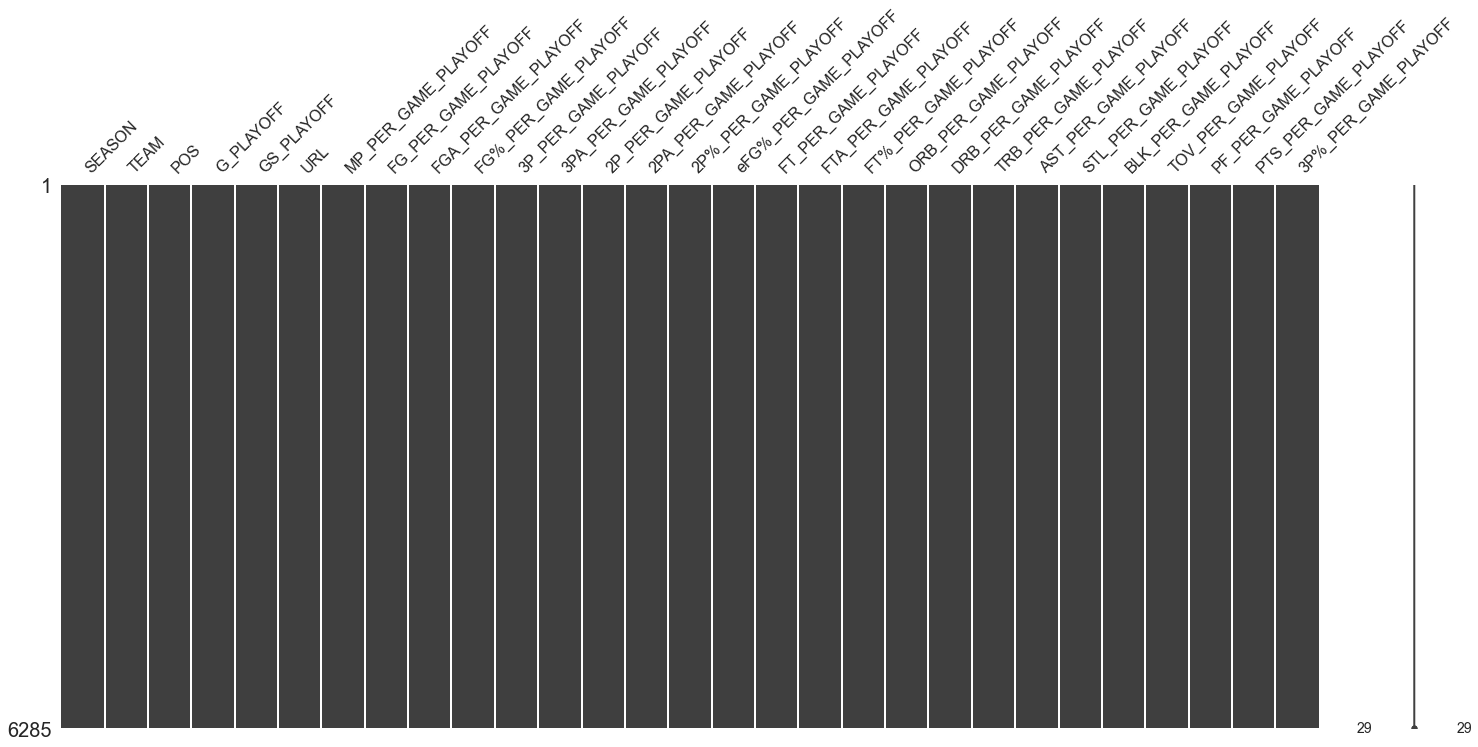

In [190]:
N = 0
M = 29

_columns  = NBA_stats_PFF_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))
print(_columns.dtypes)

FG_TOTAL_PLAYOFF      0.0
FGA_TOTAL_PLAYOFF     0.0
FG%_TOTAL_PLAYOFF     0.0
3P_TOTAL_PLAYOFF      0.0
3PA_TOTAL_PLAYOFF     0.0
2P_TOTAL_PLAYOFF      0.0
2PA_TOTAL_PLAYOFF     0.0
2P%_TOTAL_PLAYOFF     0.0
eFG%_TOTAL_PLAYOFF    0.0
FT_TOTAL_PLAYOFF      0.0
FTA_TOTAL_PLAYOFF     0.0
FT%_TOTAL_PLAYOFF     0.0
ORB_TOTAL_PLAYOFF     0.0
DRB_TOTAL_PLAYOFF     0.0
TRB_TOTAL_PLAYOFF     0.0
AST_TOTAL_PLAYOFF     0.0
STL_TOTAL_PLAYOFF     0.0
BLK_TOTAL_PLAYOFF     0.0
TOV_TOTAL_PLAYOFF     0.0
PF_TOTAL_PLAYOFF      0.0
PTS_TOTAL_PLAYOFF     0.0
3P%_TOTAL_PLAYOFF     0.0
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)
FG_TOTAL_PLAYOFF      float64
FGA_TOTAL_PLAYOFF     float64
FG%_TOTAL_PLAYOFF     float64
3P_TOTAL_PLAYOFF      float64
3PA_TOTAL_PLAYOFF     float64
2P_TOTAL_PLAYOFF      float64
2PA_TOTAL_PLAYOFF     float64
2P%_TOTAL_PLAYOFF     float64
eFG%_TOTAL_PLAYOFF    float64
FT_TOTAL_PLAYOFF      float64
FTA_TOTAL_PLAYOFF     float64
FT%_TOTAL_PLAYOFF     float64
ORB_TOTAL_PLA

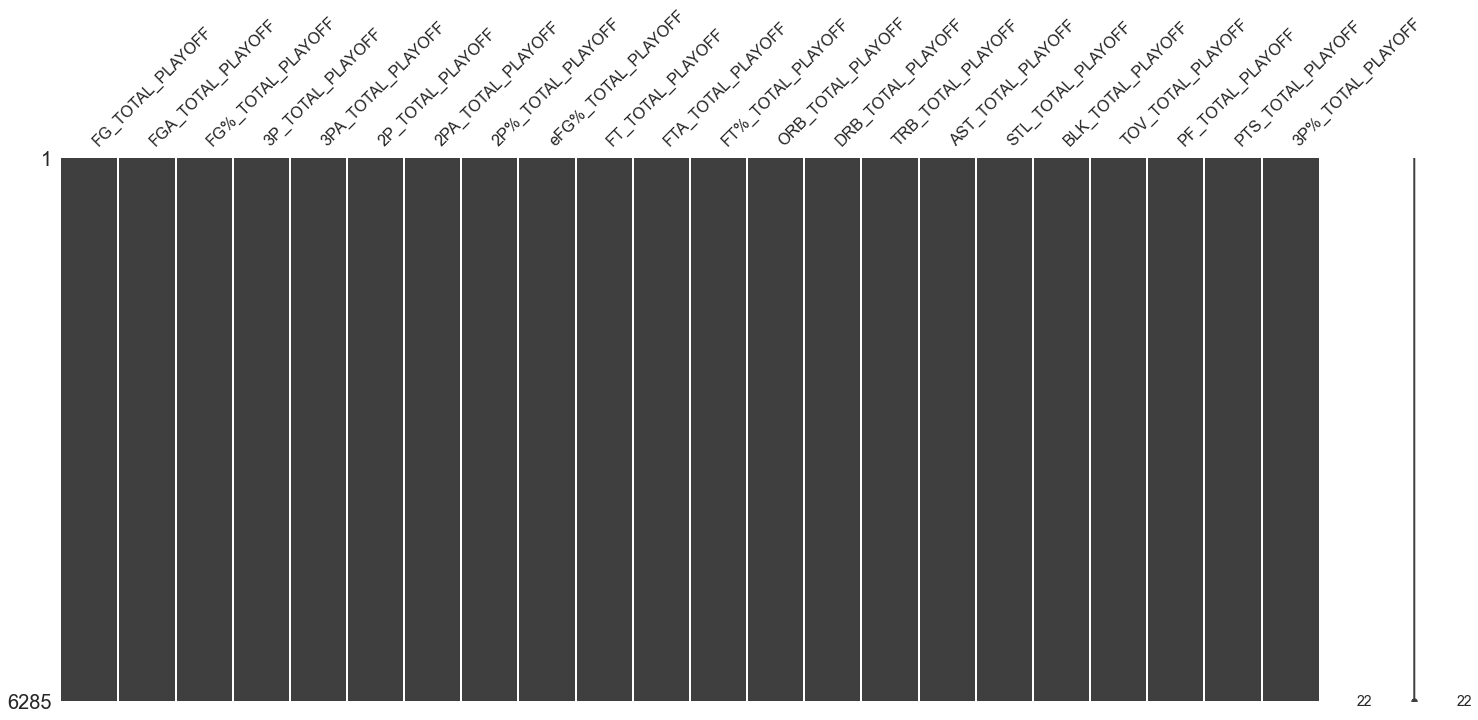

In [191]:
N = 30
M = 52

_columns  = NBA_stats_PFF_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))
print(_columns.dtypes)

PER_PLAYOFF      0.000318
TS%_PLAYOFF      0.000318
3PAr_PLAYOFF     0.000318
FTr_PLAYOFF      0.000318
ORB%_PLAYOFF     0.000318
DRB%_PLAYOFF     0.000318
TRB%_PLAYOFF     0.000318
AST%_PLAYOFF     0.000318
STL%_PLAYOFF     0.000318
BLK%_PLAYOFF     0.000318
TOV%_PLAYOFF     0.000318
USG%_PLAYOFF     0.000318
OWS_PLAYOFF      0.000318
DWS_PLAYOFF      0.000318
WS_PLAYOFF       0.000318
WS/48_PLAYOFF    0.000318
OBPM_PLAYOFF     0.000318
DBPM_PLAYOFF     0.000318
BPM_PLAYOFF      0.000318
VORP_PLAYOFF     0.000318
dtype: float64
AxesSubplot(0.125,0.125;0.698618x0.755)
PER_PLAYOFF      float64
TS%_PLAYOFF      float64
3PAr_PLAYOFF     float64
FTr_PLAYOFF      float64
ORB%_PLAYOFF     float64
DRB%_PLAYOFF     float64
TRB%_PLAYOFF     float64
AST%_PLAYOFF     float64
STL%_PLAYOFF     float64
BLK%_PLAYOFF     float64
TOV%_PLAYOFF     float64
USG%_PLAYOFF     float64
OWS_PLAYOFF      float64
DWS_PLAYOFF      float64
WS_PLAYOFF       float64
WS/48_PLAYOFF    float64
OBPM_PLAYOFF     float64


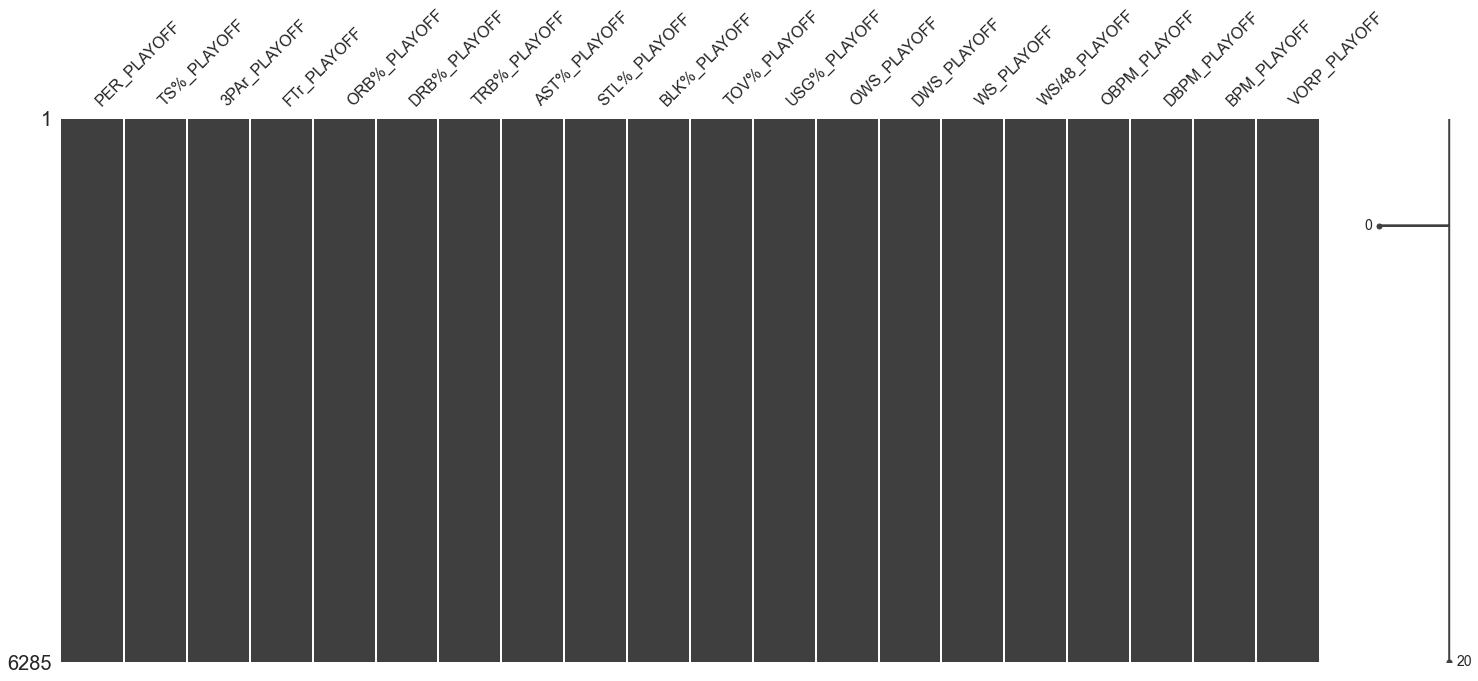

In [192]:
N = 53
M = 73

_columns  = NBA_stats_PFF_BS_df_6.iloc[: , N:M]


print(_columns.isna().sum()/len(_columns))
print(msno.matrix(_columns))
print(_columns.dtypes)

In [193]:
NBA_stats_PFF_BS_df_6[NBA_stats_PFF_BS_df_6['BPM_PLAYOFF'].isna()] #un error en el scrapping

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG_PER_GAME_PLAYOFF,FGA_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,...,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,DWS_PLAYOFF,WS_PLAYOFF,WS/48_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF,BPM_PLAYOFF,VORP_PLAYOFF
1236,2012-13,NYK,PF,9,1,/players/c/copelch01.html,10.3,1.3,3.3,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237,2013-14,IND,SF,12,0,/players/c/copelch01.html,6.8,1.0,2.3,0.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
NBA_stats_PFF_BS_df_7 = NBA_stats_PFF_BS_df_6.dropna().reset_index(drop=True)
len(NBA_stats_PFF_BS_df_7['URL'].unique())

1631

**un error en el scrapping de advanced, revisar!**

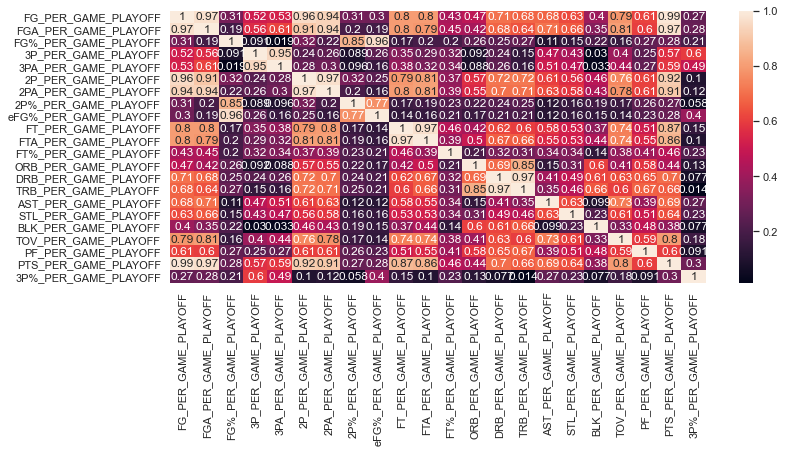

Columnas con una correlación >0.95:
['FGA_PER_GAME_PLAYOFF', '2P_PER_GAME_PLAYOFF', '2PA_PER_GAME_PLAYOFF', 'eFG%_PER_GAME_PLAYOFF', 'FTA_PER_GAME_PLAYOFF', 'TRB_PER_GAME_PLAYOFF', 'PTS_PER_GAME_PLAYOFF']
7


In [195]:
#Falta hacer cleaning de tipo de dato
N = 7
M = 29

_columns  = NBA_stats_PFF_BS_df_7.iloc[: , N:M]

corrMatrix = _columns.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.95:')
print(to_drop)
print(len(to_drop))

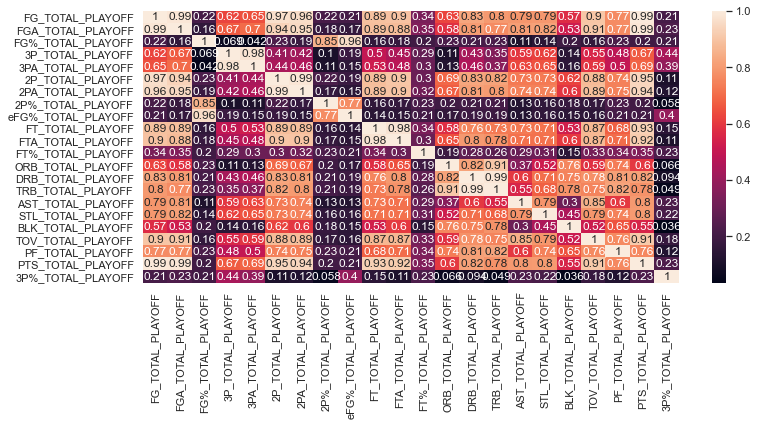

Columnas con una correlación >0.95:
['FGA_TOTAL_PLAYOFF', '3PA_TOTAL_PLAYOFF', '2P_TOTAL_PLAYOFF', '2PA_TOTAL_PLAYOFF', 'eFG%_TOTAL_PLAYOFF', 'FTA_TOTAL_PLAYOFF', 'TRB_TOTAL_PLAYOFF', 'PTS_TOTAL_PLAYOFF']
8


In [196]:
#Falta hacer cleaning de tipo de dato
N = 30
M = 52

_columns  = NBA_stats_PFF_BS_df_7.iloc[: , N:M]

corrMatrix = _columns.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop_1 = [column for column in upper.columns if any(upper[column] > 0.95)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.95:')
print(to_drop_1)
print(len(to_drop_1))

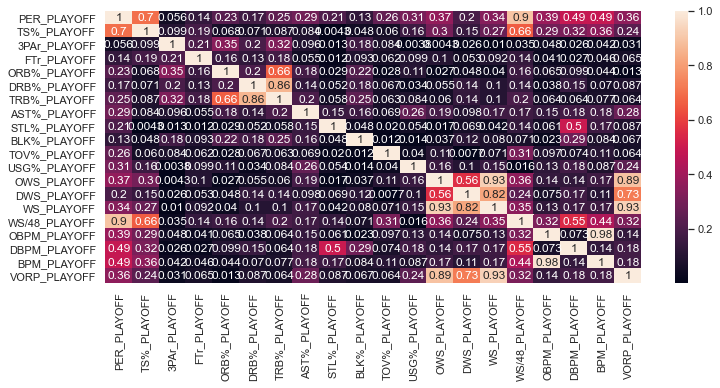

Columnas con una correlación >0.95:
['BPM_PLAYOFF']
1


In [197]:
#Falta hacer cleaning de tipo de dato
N = 53
M = 73

_columns  = NBA_stats_PFF_BS_df_7.iloc[: , N:M]

corrMatrix = _columns.corr().abs()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop_2 = [column for column in upper.columns if any(upper[column] > 0.95)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.95:')
print(to_drop_2)
print(len(to_drop_2))

In [198]:
to_drop.extend(to_drop_1)
to_drop.extend(to_drop_2)
print(len(to_drop))
to_drop

16


['FGA_PER_GAME_PLAYOFF',
 '2P_PER_GAME_PLAYOFF',
 '2PA_PER_GAME_PLAYOFF',
 'eFG%_PER_GAME_PLAYOFF',
 'FTA_PER_GAME_PLAYOFF',
 'TRB_PER_GAME_PLAYOFF',
 'PTS_PER_GAME_PLAYOFF',
 'FGA_TOTAL_PLAYOFF',
 '3PA_TOTAL_PLAYOFF',
 '2P_TOTAL_PLAYOFF',
 '2PA_TOTAL_PLAYOFF',
 'eFG%_TOTAL_PLAYOFF',
 'FTA_TOTAL_PLAYOFF',
 'TRB_TOTAL_PLAYOFF',
 'PTS_TOTAL_PLAYOFF',
 'BPM_PLAYOFF']

In [199]:
NBA_stats_PFF_BS_df_8 = NBA_stats_PFF_BS_df_7.drop(columns=to_drop)
NBA_stats_PFF_BS_df_8.head()

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,3P_PER_GAME_PLAYOFF,...,BLK%_PLAYOFF,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,DWS_PLAYOFF,WS_PLAYOFF,WS/48_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF,VORP_PLAYOFF
0,1990-91,POR,PF,5,0,/players/a/abdelal01.html,2.6,0.4,0.333,0.0,...,0.0,0.0,19.8,0.0,0.0,0.0,-0.035,-2.6,-4.6,0.0
1,1991-92,POR,PF,8,0,/players/a/abdelal01.html,3.1,0.6,0.500,0.0,...,0.0,14.5,23.7,0.0,0.0,0.0,-0.005,-4.2,-0.4,0.0
2,1992-93,BOS,PF,4,4,/players/a/abdelal01.html,17.0,2.8,0.458,0.0,...,0.9,27.3,21.9,-0.2,0.0,-0.2,-0.145,-8.4,-2.6,-0.1
3,1993-94,DEN,PG,12,12,/players/a/abdulma02.html,28.3,4.8,0.370,1.0,...,0.2,7.7,24.8,0.2,0.1,0.3,0.042,-0.8,-1.9,-0.1
4,1994-95,DEN,PG,3,2,/players/a/abdulma02.html,25.3,4.0,0.364,0.7,...,0.0,17.0,27.8,0.0,0.0,-0.1,-0.048,-1.1,-3.8,-0.1


In [200]:
corrMatrix = NBA_stats_PFF_BS_df_8.corr().abs()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop_combined = [column for column in upper.columns if any(upper[column] > 0.85)] #Podemos jugar con el threshold
print('Columnas de todo el Dataframe con una correlación >0.85:')
print('')
print(to_drop_combined)
print('')
print('Un total de ' + str(len(to_drop_combined)) + ' columnas...')

Columnas de todo el Dataframe con una correlación >0.85:

['FG_PER_GAME_PLAYOFF', '3PA_PER_GAME_PLAYOFF', '2P%_PER_GAME_PLAYOFF', 'MP_TOTAL_PLAYOFF', 'FG_TOTAL_PLAYOFF', 'FG%_TOTAL_PLAYOFF', '2P%_TOTAL_PLAYOFF', 'FT_TOTAL_PLAYOFF', 'FT%_TOTAL_PLAYOFF', 'DRB_TOTAL_PLAYOFF', 'STL_TOTAL_PLAYOFF', 'TOV_TOTAL_PLAYOFF', 'PF_TOTAL_PLAYOFF', '3P%_TOTAL_PLAYOFF', 'MP_PLAYOFF', 'TS%_PLAYOFF', 'TRB%_PLAYOFF', 'DWS_PLAYOFF', 'WS_PLAYOFF', 'WS/48_PLAYOFF', 'VORP_PLAYOFF']

Un total de 21 columnas...


In [201]:
NBA_stats_PFF_BS_df_9 = NBA_stats_PFF_BS_df_8.drop(columns=to_drop_combined)
NBA_stats_PFF_BS_df_9.head()

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,3P_PER_GAME_PLAYOFF,FT_PER_GAME_PLAYOFF,...,ORB%_PLAYOFF,DRB%_PLAYOFF,AST%_PLAYOFF,STL%_PLAYOFF,BLK%_PLAYOFF,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF
0,1990-91,POR,PF,5,0,/players/a/abdelal01.html,2.6,0.333,0.0,0.0,...,8.8,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6
1,1991-92,POR,PF,8,0,/players/a/abdelal01.html,3.1,0.500,0.0,0.3,...,0.0,19.4,12.9,0.0,0.0,14.5,23.7,0.0,-4.2,-0.4
2,1992-93,BOS,PF,4,4,/players/a/abdelal01.html,17.0,0.458,0.0,0.0,...,3.7,20.6,2.2,0.0,0.9,27.3,21.9,-0.2,-8.4,-2.6
3,1993-94,DEN,PG,12,12,/players/a/abdulma02.html,28.3,0.370,1.0,2.4,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
4,1994-95,DEN,PG,3,2,/players/a/abdulma02.html,25.3,0.364,0.7,4.7,...,3.0,5.1,12.3,1.4,0.0,17.0,27.8,0.0,-1.1,-3.8


#### 3.2.2.2 Agregación (Groupby) del Dataframe para obtener un registro por jugador (estadísticas PLAYOFF)

Crearemos la variable de significancia del Playoff, para poder dividir en subtipos de Dataframe mas adelante. No unimos con la variable de si ha ganado la NBA.

In [206]:
def significant_playoff_calculation(row):
    
    threshold_1 = 0.9 #jugamos para que almenos cada jugador tenga un playoff significativo (99,5% lo cumplen)
    threshold_2 = 0.9
    
    mean_minutes = NBA_PFF_mean_games_minutes[NBA_PFF_mean_games_minutes['URL']==row['URL']]['MP_PER_GAME_PLAYOFF'].values[0]
    
    mean_games = NBA_PFF_mean_games_minutes[NBA_PFF_mean_games_minutes['URL']==row['URL']]['G_PLAYOFF'].values[0]
    
    if row['MP_PER_GAME_PLAYOFF'] > (mean_minutes*threshold_1) or row['G_PLAYOFF'] > (mean_games*threshold_2): #condición + flexible
        return 1
    else:
        return 0

In [207]:
NBA_PFF_mean_games_minutes = NBA_stats_PFF_BS_df_9[['URL','G_PLAYOFF','MP_PER_GAME_PLAYOFF']].groupby(by='URL').mean().reset_index()
NBA_PFF_mean_games_minutes.head() #Para que la función anterior vaya más rápida

,URL,G_PLAYOFF,MP_PER_GAME_PLAYOFF
0,/players/a/abdelal01.html,5.666667,7.566667
1,/players/a/abdulma02.html,7.500000,26.800000
2,/players/a/abdulta01.html,6.500000,14.850000
3,/players/a/abdursh01.html,6.000000,21.500000
4,/players/a/abrinal01.html,5.500000,17.150000


In [208]:
NBA_stats_PFF_BS_df_9['SIGNIFICANT_PLAYOFF'] = NBA_stats_PFF_BS_df_9.apply(lambda x: significant_playoff_calculation(x),axis=1)

In [209]:
NBA_stats_PFF_BS_df_9['SIGNIFICANT_PLAYOFF'].value_counts()

1    5084
0    1199
Name: SIGNIFICANT_PLAYOFF, dtype: int64

In [210]:
URL_ok = NBA_stats_PFF_BS_df_9[NBA_stats_PFF_BS_df_9['SIGNIFICANT_PLAYOFF']==1]['URL'].unique()
len(NBA_stats_PFF_BS_df_9[NBA_stats_PFF_BS_df_9['SIGNIFICANT_PLAYOFF']==1]['URL'].unique())

1631

In [211]:
NBA_stats_PFF_BS_df_9[(NBA_stats_PFF_BS_df_9['SIGNIFICANT_PLAYOFF']==0) & (NBA_stats_PFF_BS_df_9['URL'].isin(URL_ok) == False)]

,SEASON,TEAM,POS,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,3P_PER_GAME_PLAYOFF,FT_PER_GAME_PLAYOFF,...,DRB%_PLAYOFF,AST%_PLAYOFF,STL%_PLAYOFF,BLK%_PLAYOFF,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF,SIGNIFICANT_PLAYOFF


Al dar más flexibilidad, esta vez no hace falta que eliminemos ningún jugador

In [212]:
count_pff_df = NBA_stats_PFF_BS_df_9[['URL','SEASON']].groupby(by=['URL']).agg({
    'SEASON':'count'}).rename(columns={
    'SEASON':'N_PLAYOFFS'}).reset_index()
count_pff_df

,URL,N_PLAYOFFS
0,/players/a/abdelal01.html,3
1,/players/a/abdulma02.html,2
2,/players/a/abdulta01.html,2
3,/players/a/abdursh01.html,1
4,/players/a/abrinal01.html,2
...,...,...
1626,/players/z/zevenph01.html,1
1627,/players/z/zhizhwa01.html,3
1628,/players/z/zipsepa01.html,1
1629,/players/z/zizican01.html,1


<AxesSubplot:>

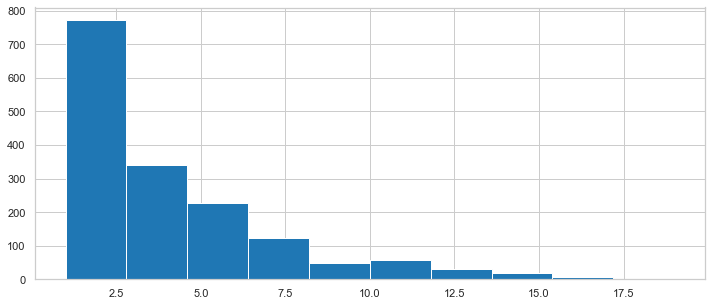

In [213]:
count_pff_df['N_PLAYOFFS'].hist()

In [218]:
cols_for_mean = ['G_PLAYOFF', 'GS_PLAYOFF', 'URL', 'MP_PER_GAME_PLAYOFF',
       'FG%_PER_GAME_PLAYOFF', '3P_PER_GAME_PLAYOFF', 'FT_PER_GAME_PLAYOFF',
       'FT%_PER_GAME_PLAYOFF', 'ORB_PER_GAME_PLAYOFF', 'DRB_PER_GAME_PLAYOFF',
       'AST_PER_GAME_PLAYOFF', 'STL_PER_GAME_PLAYOFF', 'BLK_PER_GAME_PLAYOFF',
       'TOV_PER_GAME_PLAYOFF', 'PF_PER_GAME_PLAYOFF', '3P%_PER_GAME_PLAYOFF',
       '3P_TOTAL_PLAYOFF', 'ORB_TOTAL_PLAYOFF', 'AST_TOTAL_PLAYOFF',
       'BLK_TOTAL_PLAYOFF', 'PER_PLAYOFF', '3PAr_PLAYOFF', 'FTr_PLAYOFF',
       'ORB%_PLAYOFF', 'DRB%_PLAYOFF', 'AST%_PLAYOFF', 'STL%_PLAYOFF',
       'BLK%_PLAYOFF', 'TOV%_PLAYOFF', 'USG%_PLAYOFF', 'OWS_PLAYOFF',
       'OBPM_PLAYOFF', 'DBPM_PLAYOFF']

In [219]:
len(cols_for_mean)

33

In [220]:
significant_PFF_df = NBA_stats_PFF_BS_df_9[(NBA_stats_PFF_BS_df_9['SIGNIFICANT_PLAYOFF']==1)]
significant_PFF_df = significant_PFF_df[cols_for_mean]
print(len(significant_PFF_df))
print(len(significant_PFF_df['URL'].unique()))
significant_PFF_df.head()

5084
1631


,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,3P_PER_GAME_PLAYOFF,FT_PER_GAME_PLAYOFF,FT%_PER_GAME_PLAYOFF,ORB_PER_GAME_PLAYOFF,DRB_PER_GAME_PLAYOFF,...,ORB%_PLAYOFF,DRB%_PLAYOFF,AST%_PLAYOFF,STL%_PLAYOFF,BLK%_PLAYOFF,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF
1,8,0,/players/a/abdelal01.html,3.1,0.500,0.0,0.3,0.500,0.0,0.5,...,0.0,19.4,12.9,0.0,0.0,14.5,23.7,0.0,-4.2,-0.4
2,4,4,/players/a/abdelal01.html,17.0,0.458,0.0,0.0,0.000,0.5,2.8,...,3.7,20.6,2.2,0.0,0.9,27.3,21.9,-0.2,-8.4,-2.6
3,12,12,/players/a/abdulma02.html,28.3,0.370,1.0,2.4,0.935,0.3,1.3,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
4,3,2,/players/a/abdulma02.html,25.3,0.364,0.7,4.7,1.000,0.7,1.0,...,3.0,5.1,12.3,1.4,0.0,17.0,27.8,0.0,-1.1,-3.8
5,5,5,/players/a/abdulta01.html,19.8,0.455,0.0,2.6,0.813,1.2,2.6,...,6.9,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9


In [221]:
significant_PFF_df_1 = significant_PFF_df.add_suffix('_SGFCT').rename(columns={'URL_SGFCT':'URL'})

significant_PFF_grouped = significant_PFF_df_1.groupby(by='URL').mean().reset_index().add_prefix('MEAN_').rename(columns={'MEAN_URL'
                                                                                                    :'URL'})
print(len(significant_PFF_grouped['URL'].unique()))
significant_PFF_grouped.head()

1631


,URL,MEAN_G_PLAYOFF_SGFCT,MEAN_GS_PLAYOFF_SGFCT,MEAN_MP_PER_GAME_PLAYOFF_SGFCT,MEAN_FG%_PER_GAME_PLAYOFF_SGFCT,MEAN_3P_PER_GAME_PLAYOFF_SGFCT,MEAN_FT_PER_GAME_PLAYOFF_SGFCT,MEAN_FT%_PER_GAME_PLAYOFF_SGFCT,MEAN_ORB_PER_GAME_PLAYOFF_SGFCT,MEAN_DRB_PER_GAME_PLAYOFF_SGFCT,...,MEAN_ORB%_PLAYOFF_SGFCT,MEAN_DRB%_PLAYOFF_SGFCT,MEAN_AST%_PLAYOFF_SGFCT,MEAN_STL%_PLAYOFF_SGFCT,MEAN_BLK%_PLAYOFF_SGFCT,MEAN_TOV%_PLAYOFF_SGFCT,MEAN_USG%_PLAYOFF_SGFCT,MEAN_OWS_PLAYOFF_SGFCT,MEAN_OBPM_PLAYOFF_SGFCT,MEAN_DBPM_PLAYOFF_SGFCT
0,/players/a/abdelal01.html,6.0,2.0,10.05,0.4790,0.00,0.15,0.2500,0.25,1.65,...,1.85,20.00,7.55,0.0,0.45,20.90,22.80,-0.1,-6.30,-1.50
1,/players/a/abdulma02.html,7.5,7.0,26.80,0.3670,0.85,3.55,0.9675,0.50,1.15,...,2.05,5.05,15.15,1.1,0.10,12.35,26.30,0.1,-0.95,-2.85
2,/players/a/abdulta01.html,6.5,2.5,14.85,0.3775,0.00,1.75,0.8440,1.30,2.00,...,11.05,15.55,10.55,1.1,1.40,4.95,19.85,0.2,1.70,-0.55
3,/players/a/abdursh01.html,6.0,0.0,21.50,0.5350,0.00,1.50,0.6000,1.30,3.50,...,7.10,22.90,10.20,0.8,0.00,20.80,22.80,0.0,-3.50,-1.90
4,/players/a/abrinal01.html,5.5,0.0,17.15,0.3740,1.00,0.45,0.8750,0.45,1.80,...,2.75,11.15,4.85,1.1,0.85,2.30,11.00,0.1,-2.05,0.00


In [222]:
first_PFF = NBA_stats_PFF_BS_df_9.groupby('URL').head(1) #nos quedamos con un playoff
first_PFF = first_PFF[cols_for_mean]
print(len(first_PFF))
print(len(first_PFF['URL'].unique()))
first_PFF.head()

1631
1631


,G_PLAYOFF,GS_PLAYOFF,URL,MP_PER_GAME_PLAYOFF,FG%_PER_GAME_PLAYOFF,3P_PER_GAME_PLAYOFF,FT_PER_GAME_PLAYOFF,FT%_PER_GAME_PLAYOFF,ORB_PER_GAME_PLAYOFF,DRB_PER_GAME_PLAYOFF,...,ORB%_PLAYOFF,DRB%_PLAYOFF,AST%_PLAYOFF,STL%_PLAYOFF,BLK%_PLAYOFF,TOV%_PLAYOFF,USG%_PLAYOFF,OWS_PLAYOFF,OBPM_PLAYOFF,DBPM_PLAYOFF
0,5,0,/players/a/abdelal01.html,2.6,0.333,0.0,0.0,0.000,0.2,0.4,...,8.8,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6
3,12,12,/players/a/abdulma02.html,28.3,0.370,1.0,2.4,0.935,0.3,1.3,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
5,5,5,/players/a/abdulta01.html,19.8,0.455,0.0,2.6,0.813,1.2,2.6,...,6.9,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9
7,6,0,/players/a/abdursh01.html,21.5,0.535,0.0,1.5,0.600,1.3,3.5,...,7.1,22.9,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9
8,5,0,/players/a/abrinal01.html,16.0,0.348,1.0,0.6,0.750,0.4,1.4,...,2.6,10.0,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9


In [223]:
first_PFF_1 = first_PFF.add_suffix('_1stPO').rename(columns={'URL_1stPO':'URL'})

first_PFF_grouped = first_PFF_1.groupby(by='URL').mean().reset_index().add_prefix('MEAN_').rename(columns={'MEAN_URL'
                                                                                                                :'URL'})

print(len(first_PFF_grouped['URL'].unique()))
first_PFF_grouped.head()

1631


,URL,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_MP_PER_GAME_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_3P_PER_GAME_PLAYOFF_1stPO,MEAN_FT_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_ORB_PER_GAME_PLAYOFF_1stPO,MEAN_DRB_PER_GAME_PLAYOFF_1stPO,...,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_AST%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO
0,/players/a/abdelal01.html,5,0,2.6,0.333,0.0,0.0,0.000,0.2,0.4,...,8.8,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6
1,/players/a/abdulma02.html,12,12,28.3,0.370,1.0,2.4,0.935,0.3,1.3,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
2,/players/a/abdulta01.html,5,5,19.8,0.455,0.0,2.6,0.813,1.2,2.6,...,6.9,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9
3,/players/a/abdursh01.html,6,0,21.5,0.535,0.0,1.5,0.600,1.3,3.5,...,7.1,22.9,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9
4,/players/a/abrinal01.html,5,0,16.0,0.348,1.0,0.6,0.750,0.4,1.4,...,2.6,10.0,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9


Ahora unimos los DataFrames calculados para empezar a conformar el Golden Record de Payoff

In [224]:
playoff_golden_record_df = count_pff_df.merge(first_PFF_grouped, how='left',on='URL')
print(len(playoff_golden_record_df['URL'].unique()))
playoff_golden_record_df.head()

1631


,URL,N_PLAYOFFS,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_MP_PER_GAME_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_3P_PER_GAME_PLAYOFF_1stPO,MEAN_FT_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_ORB_PER_GAME_PLAYOFF_1stPO,...,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_AST%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO
0,/players/a/abdelal01.html,3,5,0,2.6,0.333,0.0,0.0,0.000,0.2,...,8.8,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6
1,/players/a/abdulma02.html,2,12,12,28.3,0.370,1.0,2.4,0.935,0.3,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
2,/players/a/abdulta01.html,2,5,5,19.8,0.455,0.0,2.6,0.813,1.2,...,6.9,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9
3,/players/a/abdursh01.html,1,6,0,21.5,0.535,0.0,1.5,0.600,1.3,...,7.1,22.9,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9
4,/players/a/abrinal01.html,2,5,0,16.0,0.348,1.0,0.6,0.750,0.4,...,2.6,10.0,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9


In [225]:
playoff_golden_record_df_1 = playoff_golden_record_df.merge(significant_PFF_grouped, how='left',on='URL')
print(len(playoff_golden_record_df_1['URL'].unique()))
print(playoff_golden_record_df_1.columns[playoff_golden_record_df_1.isnull().any()]) #no hay ningun NaN
playoff_golden_record_df_1.head()

1631
Index([], dtype='object')


,URL,N_PLAYOFFS,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_MP_PER_GAME_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_3P_PER_GAME_PLAYOFF_1stPO,MEAN_FT_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_ORB_PER_GAME_PLAYOFF_1stPO,...,MEAN_ORB%_PLAYOFF_SGFCT,MEAN_DRB%_PLAYOFF_SGFCT,MEAN_AST%_PLAYOFF_SGFCT,MEAN_STL%_PLAYOFF_SGFCT,MEAN_BLK%_PLAYOFF_SGFCT,MEAN_TOV%_PLAYOFF_SGFCT,MEAN_USG%_PLAYOFF_SGFCT,MEAN_OWS_PLAYOFF_SGFCT,MEAN_OBPM_PLAYOFF_SGFCT,MEAN_DBPM_PLAYOFF_SGFCT
0,/players/a/abdelal01.html,3,5,0,2.6,0.333,0.0,0.0,0.000,0.2,...,1.85,20.00,7.55,0.0,0.45,20.90,22.80,-0.1,-6.30,-1.50
1,/players/a/abdulma02.html,2,12,12,28.3,0.370,1.0,2.4,0.935,0.3,...,2.05,5.05,15.15,1.1,0.10,12.35,26.30,0.1,-0.95,-2.85
2,/players/a/abdulta01.html,2,5,5,19.8,0.455,0.0,2.6,0.813,1.2,...,11.05,15.55,10.55,1.1,1.40,4.95,19.85,0.2,1.70,-0.55
3,/players/a/abdursh01.html,1,6,0,21.5,0.535,0.0,1.5,0.600,1.3,...,7.10,22.90,10.20,0.8,0.00,20.80,22.80,0.0,-3.50,-1.90
4,/players/a/abrinal01.html,2,5,0,16.0,0.348,1.0,0.6,0.750,0.4,...,2.75,11.15,4.85,1.1,0.85,2.30,11.00,0.1,-2.05,0.00


In [226]:
corrMatrix = playoff_golden_record_df_1.corr().abs()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.75:')
print(to_drop)
print(len(to_drop))

Columnas con una correlación >0.75:
['MEAN_FT_PER_GAME_PLAYOFF_1stPO', 'MEAN_DRB_PER_GAME_PLAYOFF_1stPO', 'MEAN_TOV_PER_GAME_PLAYOFF_1stPO', 'MEAN_PF_PER_GAME_PLAYOFF_1stPO', 'MEAN_3P_TOTAL_PLAYOFF_1stPO', 'MEAN_ORB_TOTAL_PLAYOFF_1stPO', 'MEAN_AST_TOTAL_PLAYOFF_1stPO', 'MEAN_BLK_TOTAL_PLAYOFF_1stPO', 'MEAN_MP_PER_GAME_PLAYOFF_SGFCT', 'MEAN_3P_PER_GAME_PLAYOFF_SGFCT', 'MEAN_FT_PER_GAME_PLAYOFF_SGFCT', 'MEAN_FT%_PER_GAME_PLAYOFF_SGFCT', 'MEAN_ORB_PER_GAME_PLAYOFF_SGFCT', 'MEAN_DRB_PER_GAME_PLAYOFF_SGFCT', 'MEAN_AST_PER_GAME_PLAYOFF_SGFCT', 'MEAN_STL_PER_GAME_PLAYOFF_SGFCT', 'MEAN_BLK_PER_GAME_PLAYOFF_SGFCT', 'MEAN_TOV_PER_GAME_PLAYOFF_SGFCT', 'MEAN_PF_PER_GAME_PLAYOFF_SGFCT', 'MEAN_3P%_PER_GAME_PLAYOFF_SGFCT', 'MEAN_3P_TOTAL_PLAYOFF_SGFCT', 'MEAN_ORB_TOTAL_PLAYOFF_SGFCT', 'MEAN_AST_TOTAL_PLAYOFF_SGFCT', 'MEAN_BLK_TOTAL_PLAYOFF_SGFCT', 'MEAN_PER_PLAYOFF_SGFCT', 'MEAN_3PAr_PLAYOFF_SGFCT', 'MEAN_ORB%_PLAYOFF_SGFCT', 'MEAN_DRB%_PLAYOFF_SGFCT', 'MEAN_AST%_PLAYOFF_SGFCT', 'MEAN_STL%_PLAYOFF_SG

In [227]:
playoff_golden_record_df_2 = playoff_golden_record_df_1.drop(columns=to_drop)
playoff_golden_record_df_2.head()

,URL,N_PLAYOFFS,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_MP_PER_GAME_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_3P_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_ORB_PER_GAME_PLAYOFF_1stPO,MEAN_AST_PER_GAME_PLAYOFF_1stPO,...,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,MEAN_G_PLAYOFF_SGFCT,MEAN_GS_PLAYOFF_SGFCT,MEAN_FG%_PER_GAME_PLAYOFF_SGFCT,MEAN_FTr_PLAYOFF_SGFCT,MEAN_OWS_PLAYOFF_SGFCT
0,/players/a/abdelal01.html,3,5,0,2.6,0.333,0.0,0.000,0.2,0.0,...,0.0,19.8,0.0,-2.6,-4.6,6.0,2.0,0.4790,0.2000,-0.1
1,/players/a/abdulma02.html,2,12,12,28.3,0.370,1.0,0.935,0.3,2.5,...,7.7,24.8,0.2,-0.8,-1.9,7.5,7.0,0.3670,0.3125,0.1
2,/players/a/abdulta01.html,2,5,5,19.8,0.455,0.0,0.813,1.2,0.8,...,7.0,20.0,0.3,2.6,1.9,6.5,2.5,0.3775,0.3760,0.2
3,/players/a/abdursh01.html,1,6,0,21.5,0.535,0.0,0.600,1.3,1.2,...,20.8,22.8,0.0,-3.5,-1.9,6.0,0.0,0.5350,0.3490,0.0
4,/players/a/abrinal01.html,2,5,0,16.0,0.348,1.0,0.750,0.4,0.8,...,0.0,13.3,0.1,-2.8,-1.9,5.5,0.0,0.3740,0.1370,0.1


# Ahora hacemos la separación entre los distintos Golden records en función de qué columnas tienen o no

## Ring GOLDEN RECORD

In [228]:
ring_grouped_URL = ring_grouped['URL'].unique()
print(len(ring_grouped_URL))
#ring_grouped_URL

388


In [229]:
RING_PFF = playoff_golden_record_df_2[playoff_golden_record_df_2['URL'].isin(ring_grouped_URL)]
print(len(RING_PFF))
true_ring_URL = RING_PFF['URL'].unique()

339


Hay casi 50 jugadores que sin jugar PLAYOFF han sido campeones...los obviamos y dejamos como de regular season y ya está

In [230]:
RING_RS = golden_record_df_4[golden_record_df_4['URL'].isin(true_ring_URL)]
print(len(RING_RS))

339


In [231]:
ring_golden_record_df = ring_grouped[ring_grouped['URL'].isin(true_ring_URL)]
print(len(ring_golden_record_df))

339


In [232]:
ring_golden_record_df_1 = ring_golden_record_df.merge(RING_PFF,on='URL',how='left')
print(len(ring_golden_record_df_1))
ring_golden_record_df_1

339


,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_MP_PER_GAME_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,...,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,MEAN_G_PLAYOFF_SGFCT,MEAN_GS_PLAYOFF_SGFCT,MEAN_FG%_PER_GAME_PLAYOFF_SGFCT,MEAN_FTr_PLAYOFF_SGFCT,MEAN_OWS_PLAYOFF_SGFCT
0,/players/a/adamsja01.html,7.0,0.0,2.60,0.125,0.00,0.0000,0.00,0.0000,0.00,...,0.0,17.9,0.0,-3.6,-2.6,3.000000,0.00,0.333000,0.000000,0.000000
1,/players/a/agerma01.html,26.0,3.0,6.30,0.323,0.10,0.1580,0.20,0.5000,0.20,...,0.0,21.1,0.1,5.0,0.4,3.000000,0.00,0.556000,0.667000,0.100000
2,/players/a/ajincal01.html,10.0,2.0,7.50,0.375,0.30,0.4290,0.20,0.6670,0.50,...,0.0,18.3,0.1,10.9,7.9,3.000000,0.00,1.000000,0.000000,0.100000
3,/players/a/allenma01.html,73.0,16.0,15.00,0.480,0.00,0.5000,0.30,0.9200,0.90,...,7.0,19.8,0.2,-0.8,1.0,7.000000,2.00,0.361000,0.072333,-0.066667
4,/players/a/allenra02.html,76.0,36.5,30.85,0.447,2.15,0.4085,2.35,0.8965,0.75,...,17.3,25.3,0.4,6.8,-0.8,15.545455,11.00,0.450000,0.271455,1.145455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,/players/w/wrighan01.html,56.0,10.0,22.00,0.413,0.60,0.2910,0.80,0.6870,0.70,...,0.0,25.5,0.0,-4.2,-6.1,11.000000,2.50,0.480000,0.267000,0.250000
335,/players/w/wrighde01.html,49.0,2.0,18.30,0.433,0.60,0.3330,1.10,0.8690,0.80,...,11.3,20.0,0.0,-1.0,0.3,8.250000,0.00,0.450500,0.564250,0.200000
336,/players/w/wrighdo01.html,20.0,2.0,6.60,0.465,0.20,0.5000,0.80,0.8820,0.10,...,0.0,0.0,0.0,-3.1,-1.0,6.000000,0.00,0.409333,0.463000,0.033333
337,/players/w/wrighlo02.html,18.0,1.0,8.90,0.286,0.00,0.0000,0.20,0.5000,0.40,...,2.8,18.4,0.1,0.4,-1.2,3.750000,2.75,0.505750,0.261000,0.100000


In [233]:
ring_golden_record_df_2 = ring_golden_record_df_1.merge(RING_RS,on='URL',how='left')
print(len(ring_golden_record_df_2))
print(ring_golden_record_df_2.columns[ring_golden_record_df_2.isnull().any()])
ring_golden_record_df_2

339
Index([], dtype='object')


,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_MP_PER_GAME_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,...,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE
0,/players/a/adamsja01.html,7.0,0.0,2.60,0.125,0.00,0.0000,0.00,0.0000,0.00,...,108.100000,0.354000,0,0.0,0,0.0,Undrafted,182.88,23,0
1,/players/a/agerma01.html,26.0,3.0,6.30,0.323,0.10,0.1580,0.20,0.5000,0.20,...,108.450000,0.613000,0,0.0,0,0.0,28.0,195.58,23,0
2,/players/a/ajincal01.html,10.0,2.0,7.50,0.375,0.30,0.4290,0.20,0.6670,0.50,...,106.480000,0.485600,0,0.0,0,0.0,Undrafted,218.44,21,0
3,/players/a/allenma01.html,73.0,16.0,15.00,0.480,0.00,0.5000,0.30,0.9200,0.90,...,104.525000,0.512375,0,0.0,0,0.0,Undrafted,208.28,24,0
4,/players/a/allenra02.html,76.0,36.5,30.85,0.447,2.15,0.4085,2.35,0.8965,0.75,...,107.958824,0.576000,0,10.0,0,1.0,5.0,195.58,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,/players/w/wrighan01.html,56.0,10.0,22.00,0.413,0.60,0.2910,0.80,0.6870,0.70,...,108.340000,0.563600,0,0.0,0,0.0,15.0,200.66,22,0
335,/players/w/wrighde01.html,49.0,2.0,18.30,0.433,0.60,0.3330,1.10,0.8690,0.80,...,113.471429,0.557143,0,0.0,0,0.0,20.0,195.58,24,1
336,/players/w/wrighdo01.html,20.0,2.0,6.60,0.465,0.20,0.5000,0.80,0.8820,0.10,...,105.500000,0.450571,0,0.0,0,0.0,19.0,205.74,20,0
337,/players/w/wrighlo02.html,18.0,1.0,8.90,0.286,0.00,0.0000,0.20,0.5000,0.40,...,102.763636,0.383273,0,0.0,0,0.0,7.0,210.82,22,0


In [234]:
corrMatrix = ring_golden_record_df_2.corr().abs()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.6:')
print(to_drop)
print(len(to_drop))

Columnas con una correlación >0.6:
['MEAN_MP_PER_GAME_RING', 'MEAN_FT_PER_GAME_RING', 'MEAN_DRB_PER_GAME_RING', 'MEAN_AST_PER_GAME_RING', 'MEAN_STL_PER_GAME_RING', 'MEAN_BLK_PER_GAME_RING', 'MEAN_TOV_PER_GAME_RING', 'MEAN_PF_PER_GAME_RING', 'MEAN_PER_RING', 'MEAN_3PAr_RING', 'MEAN_ORB%_RING', 'MEAN_AST%_RING', 'MEAN_BLK%_RING', 'MEAN_OWS_RING', 'MEAN_OBPM_RING', 'MEAN_MISSED_GAMES_RING', 'MEAN_DEFF_TEAM_RTG_RING', 'N_PLAYOFFS', 'MEAN_MP_PER_GAME_PLAYOFF_1stPO', 'MEAN_3P_PER_GAME_PLAYOFF_1stPO', 'MEAN_ORB_PER_GAME_PLAYOFF_1stPO', 'MEAN_AST_PER_GAME_PLAYOFF_1stPO', 'MEAN_STL_PER_GAME_PLAYOFF_1stPO', 'MEAN_BLK_PER_GAME_PLAYOFF_1stPO', 'MEAN_PER_PLAYOFF_1stPO', 'MEAN_3PAr_PLAYOFF_1stPO', 'MEAN_AST%_PLAYOFF_1stPO', 'MEAN_BLK%_PLAYOFF_1stPO', 'MEAN_OBPM_PLAYOFF_1stPO', 'MEAN_DBPM_PLAYOFF_1stPO', 'MEAN_GS_PLAYOFF_SGFCT', 'MEAN_FG%_PER_GAME_PLAYOFF_SGFCT', 'MEAN_FTr_PLAYOFF_SGFCT', 'MEAN_OWS_PLAYOFF_SGFCT', 'MEAN_GS_2S', 'MEAN_3P_PER_GAME_2S', 'MEAN_3P%_PER_GAME_2S', 'MEAN_ORB_PER_GAME_2S', 'M

In [235]:
ring_golden_record_df_3 = ring_golden_record_df_2.drop(columns=to_drop)
ring_golden_record_df_3

,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,...,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,MEAN_OFF_TEAM_RTG_SGFCT,ALL-ROOKIE,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE
0,/players/a/adamsja01.html,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,...,9.85,16.05,112.65,112.65,108.100000,0,0,Undrafted,23,0
1,/players/a/agerma01.html,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,...,11.50,21.50,110.75,101.05,108.450000,0,0,28.0,23,0
2,/players/a/ajincal01.html,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,...,14.50,21.75,104.55,104.45,106.480000,0,0,Undrafted,21,0
3,/players/a/allenma01.html,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,...,8.35,18.35,97.60,101.30,104.525000,0,0,Undrafted,24,0
4,/players/a/allenra02.html,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,...,13.90,22.85,104.85,106.95,107.958824,0,0,5.0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,/players/w/wrighan01.html,56.0,10.0,0.413,0.60,0.2910,0.6870,0.70,0.2040,10.0,...,16.00,13.80,104.80,104.50,108.340000,0,0,15.0,22,0
335,/players/w/wrighde01.html,49.0,2.0,0.433,0.60,0.3330,0.8690,0.80,0.2080,10.1,...,14.75,19.35,111.15,106.50,113.471429,0,0,20.0,24,1
336,/players/w/wrighdo01.html,20.0,2.0,0.465,0.20,0.5000,0.8820,0.10,0.3950,25.6,...,21.25,23.75,109.45,103.80,105.500000,0,0,19.0,20,0
337,/players/w/wrighlo02.html,18.0,1.0,0.286,0.00,0.0000,0.5000,0.40,0.2860,21.6,...,11.85,15.05,104.20,109.40,102.763636,0,0,7.0,22,0


## PLAYOFF GOLDEN RECORD

In [236]:
playoff_golden_record_df_3 = playoff_golden_record_df_2[playoff_golden_record_df_2['URL'].isin(true_ring_URL)==False]
len(playoff_golden_record_df_3)

1292

In [237]:
PFF_URL = playoff_golden_record_df_3['URL'].unique()
len(PFF_URL)

1292

In [238]:
PFF_RS = golden_record_df_4[golden_record_df_4['URL'].isin(PFF_URL)==True]
print(len(PFF_RS))

1281


**Otra vez que tenemos que quedarnos con el DF más pequeño...** hay 11 jugadores que representa han jugado playoff y no regular season

In [239]:
playoff_golden_record_df_4 = PFF_RS.merge(playoff_golden_record_df_3, how='left',on='URL')
print(playoff_golden_record_df_4.columns[playoff_golden_record_df_4.isnull().any()])
playoff_golden_record_df_4

Index([], dtype='object')


,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,MEAN_G_PLAYOFF_SGFCT,MEAN_GS_PLAYOFF_SGFCT,MEAN_FG%_PER_GAME_PLAYOFF_SGFCT,MEAN_FTr_PLAYOFF_SGFCT,MEAN_OWS_PLAYOFF_SGFCT
0,/players/a/abdelal01.html,1.800000,5,0,1,PF,57.0,0.5,0.4835,0.00,...,0.0,19.8,0.0,-2.6,-4.6,6.0,2.0,0.4790,0.2000,-0.10
1,/players/a/abdulma02.html,3.000000,3,0,1,PG,74.0,15.0,0.4170,0.40,...,7.7,24.8,0.2,-0.8,-1.9,7.5,7.0,0.3670,0.3125,0.10
2,/players/a/abdulta01.html,2.000000,5,0,1,SG,54.0,32.5,0.4190,0.10,...,7.0,20.0,0.3,2.6,1.9,6.5,2.5,0.3775,0.3760,0.20
3,/players/a/abdursh01.html,2.800000,5,0,3,PF,81.0,76.5,0.4690,0.20,...,20.8,22.8,0.0,-3.5,-1.9,6.0,0.0,0.5350,0.3490,0.00
4,/players/a/abrinal01.html,3.000000,1,0,1,SG,71.5,7.0,0.3940,1.25,...,0.0,13.3,0.1,-2.8,-1.9,5.5,0.0,0.3740,0.1370,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,/players/z/zevenph01.html,1.000000,1,0,1,C,8.0,0.0,0.5560,0.00,...,0.0,0.0,0.0,-4.7,-4.5,1.0,0.0,0.0000,0.0000,0.00
1277,/players/z/zhizhwa01.html,1.750000,4,0,1,C,30.0,0.0,0.4305,0.45,...,9.7,20.8,0.0,1.3,1.6,6.5,0.0,0.4065,0.3750,0.10
1278,/players/z/zipsepa01.html,2.000000,1,0,1,SF,49.0,15.0,0.3720,0.75,...,16.1,14.4,0.1,-2.9,-0.7,6.0,0.0,0.4550,0.2420,0.10
1279,/players/z/zizican01.html,3.000000,1,0,1,C,45.5,13.5,0.6420,0.00,...,13.7,29.5,0.0,-2.2,-2.2,8.0,0.0,0.5000,0.6000,0.00


In [1128]:
corrMatrix = playoff_golden_record_df_4.corr().abs()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()

# Seleccionamos la parte superior del triangulo de correlación
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)] #Podemos jugar con el threshold
print('Columnas con una correlación >0.65:')
print(to_drop)
print(len(to_drop))

Columnas con una correlación >0.65:
['MEAN_STL_PER_GAME_2S', 'MEAN_BLK_PER_GAME_2S', 'MEAN_PF_PER_GAME_2S', 'MEAN_PER_2S', 'MEAN_3PAr_2S', 'MEAN_AST%_2S', 'MEAN_BLK%_2S', 'MEAN_W/L%_TEAM_2S', 'MEAN_GS_SGFCT_x', 'MEAN_OWS_SGFCT', 'MEAN_OFF_TEAM_RTG_SGFCT', 'HEIGHT(cm)', 'MEAN_MP_PER_GAME_PLAYOFF_1stPO', 'MEAN_3P_PER_GAME_PLAYOFF_1stPO', 'MEAN_ORB_PER_GAME_PLAYOFF_1stPO', 'MEAN_AST_PER_GAME_PLAYOFF_1stPO', 'MEAN_STL_PER_GAME_PLAYOFF_1stPO', 'MEAN_BLK_PER_GAME_PLAYOFF_1stPO', 'MEAN_PER_PLAYOFF_1stPO', 'MEAN_3PAr_PLAYOFF_1stPO', 'MEAN_G_SGFCT', 'MEAN_GS_SGFCT_y', 'MEAN_FG%_PER_GAME_PLAYOFF_SGFCT', 'MEAN_FTr_PLAYOFF_SGFCT', 'MEAN_OWS_PLAYOFF_SGFCT']
25


In [1129]:
playoff_golden_record_df_5 = playoff_golden_record_df_4.drop(columns=to_drop)
playoff_golden_record_df_5

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_AST%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO
0,/players/a/abdelal01.html,1.800000,5,0,1,PF,57.0,0.5,0.4835,0.00,...,8.8,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6
1,/players/a/abdulma02.html,3.000000,3,0,1,PG,74.0,15.0,0.4170,0.40,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
2,/players/a/abdulta01.html,2.000000,5,0,1,SG,54.0,32.5,0.4190,0.10,...,6.9,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9
3,/players/a/abdursh01.html,2.800000,5,0,3,PF,81.0,76.5,0.4690,0.20,...,7.1,22.9,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9
4,/players/a/abrinal01.html,3.000000,1,0,1,SG,71.5,7.0,0.3940,1.25,...,2.6,10.0,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,/players/z/zevenph01.html,1.000000,1,0,1,C,8.0,0.0,0.5560,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.7,-4.5
1277,/players/z/zhizhwa01.html,1.750000,4,0,1,C,30.0,0.0,0.4305,0.45,...,0.0,10.1,8.0,2.4,3.3,9.7,20.8,0.0,1.3,1.6
1278,/players/z/zipsepa01.html,2.000000,1,0,1,SF,49.0,15.0,0.3720,0.75,...,2.5,14.6,3.4,0.4,0.8,16.1,14.4,0.1,-2.9,-0.7
1279,/players/z/zizican01.html,3.000000,1,0,1,C,45.5,13.5,0.6420,0.00,...,5.1,26.5,8.0,0.0,4.0,13.7,29.5,0.0,-2.2,-2.2


## GOLDEN RECORD REGULAR SEASON

In [1131]:
golden_record_df_4.shape

(2775, 44)

In [1132]:
RegS_golden_record_df_5 = golden_record_df_4[golden_record_df_4['URL'].isin(true_ring_URL)==False]
len(RegS_golden_record_df_5)

2436

In [1133]:
RegS_golden_record_df_6 = RegS_golden_record_df_5[RegS_golden_record_df_5['URL'].isin(PFF_URL)==False]
len(RegS_golden_record_df_6)

1155

In [1135]:
RegS_golden_record_df_6

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE
6,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.0,0.3225,0.25,...,106.400000,0.494000,Not defined,0.0,Not defined,0.0,60.0,195.58,23,0
8,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.0,0.5140,0.05,...,105.325000,0.362625,Not defined,0.0,Not defined,0.0,37.0,200.66,23,0
16,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,3.0,0.3060,0.30,...,107.700000,0.232000,Not defined,0.0,Not defined,0.0,Undrafted,200.66,22,0
17,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.0,0.4320,0.00,...,102.750000,0.317000,Not defined,0.0,Not defined,0.0,Undrafted,200.66,25,0
22,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.0,0.5000,0.30,...,105.900000,0.500000,Not defined,0.0,Not defined,0.0,Undrafted,180.34,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,/players/y/yuesu01.html,1.000000,1,1,1,SG,10.0,0.0,0.2730,0.00,...,112.800000,0.793000,Not defined,0.0,Not defined,0.0,40.0,205.74,24,0
2765,/players/z/zellelu01.html,1.000000,1,0,1,C,16.0,0.0,0.3460,0.10,...,101.200000,0.305000,Not defined,0.0,Not defined,0.0,Undrafted,210.82,26,0
2769,/players/z/zidekge01.html,1.750000,4,0,1,C,61.5,11.5,0.4190,0.00,...,108.666667,0.447333,Not defined,0.0,Not defined,0.0,Undrafted,213.36,23,0
2770,/players/z/zimmede01.html,1.000000,1,0,1,PG,2.0,0.0,0.6670,0.00,...,103.900000,0.598000,Not defined,0.0,Not defined,0.0,40.0,190.50,25,0


In [1136]:
len(RegS_golden_record_df_6) + len(playoff_golden_record_df_5) + len(ring_golden_record_df_3) #sale bien la suma...

2775

Suma correcta de jugadores

In [1137]:
RegS_golden_record_df_6.to_csv('./Clean_data/RegS_golden_record.csv')
playoff_golden_record_df_5.to_csv('./Clean_data/Playoff_golden_record.csv')
ring_golden_record_df_3.to_csv('./Clean_data/Ring_golden_record.csv')

## COLLEGE

In [ ]:
REPETIC PROCESO SIMILAR

# OLD CODE

### Primer análisis con Pandas profiling

In [7]:
profile_college_RS_PG_BS= stats_PFF_ADV_BS_df.profile_report()
profile_college_RS_PG_BS.to_file("Reports/Raw_data/stats_PFF_ADV_BS_df.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#repetir para todos

In [ ]:
# Poner los pasos que seguiria + propuestas de variables + variables seleccionadas

In [ ]:
playoff_golden_record_df_2 = playoff_golden_record_df_1.merge(ring_grouped, how='left',on='URL')
print(len(golden_record_df_2['URL'].unique()))
print(golden_record_df_2.columns[golden_record_df_2.isnull().any()]) #no hay ningun NaN
golden_record_df_2.head()

### 3.2 Merge the complete players the basic info 

In [11]:
df_golden_record_0 = df_complete_players.copy()

df_golden_record_0 = df_golden_record_0.merge(df_basic_info,how='left',on='player_url')

In [12]:
df_golden_record_0.head()

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,Playoff_flag,player_name,active_from,active_to,position,college,height,weight,birth_date(year),height(cm)
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,Yes,Carlos Terry,1981,1983,G-F,Winston-Salem State,6-5,210,1956,195.58
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,Yes,Bob Priddy,1953,1953,F,New Mexico State,6-3,190,1930,190.50
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,Yes,Skip Harlicka,1969,1969,G,South Carolina,6-1,185,1946,185.42
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,Yes,Bill Curley,1995,2001,F,Boston College,6-9,220,1972,205.74
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,Yes,LeRon Ellis,1992,1996,F-C,"Kentucky, Syracuse",6-9,225,1969,205.74


Now we do some feature engineering related to time (years)

In [13]:
df_golden_record_0['age_entrance'] = df_golden_record_0['active_from'] - df_golden_record_0['birth_date(year)']
df_golden_record_0['age_retirement'] = df_golden_record_0['active_to'] - df_golden_record_0['birth_date(year)']
df_golden_record_0['years_active'] = df_golden_record_0['active_to'] - df_golden_record_0['active_from']

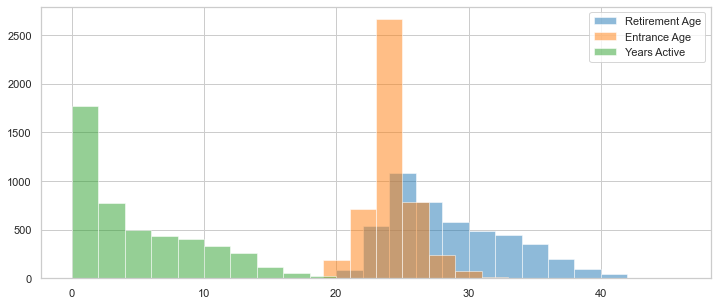

In [14]:
x = df_golden_record_0['age_retirement']
y = df_golden_record_0['age_entrance']
z = df_golden_record_0['years_active']

binwidth = 2

plt.hist(x, alpha=0.5, label='Retirement Age',bins=np.arange(min(x), max(x) + binwidth, binwidth))
plt.hist(y, alpha=0.5, label='Entrance Age',bins=np.arange(min(y), max(y) + binwidth, binwidth))
plt.hist(z, alpha=0.5, label='Years Active',bins=np.arange(min(z), max(z) + binwidth, binwidth))
plt.legend(loc='upper right')
plt.show()

#Conclusió: complicat estar molts anys a la lliga (veure si tens foto de ACB o eurolliga...)

In [15]:
df_golden_record_0 = df_golden_record_0.drop(columns=['height','college_url'])

## 3.3 Merge with the draft info

In [17]:
df_drafts_aux = df_drafts[['player_url','draft_year','draft_round','draft_pick_number']]
df_drafts_aux.head() #not a lot of info beacuase not every player is going to be drafted to go to the NBA

,player_url,draft_year,draft_round,draft_pick_number
0,/players/c/cunnica01.html,2021,1,1
1,/players/g/greenja05.html,2021,1,2
2,/players/m/mobleev01.html,2021,1,3
3,/players/b/barnesc01.html,2021,1,4
4,/players/s/suggsja01.html,2021,1,5


In [18]:
df_golden_record_1 = df_golden_record_0.copy()

df_golden_record_1 = df_golden_record_1.merge(df_drafts_aux,how='left',on='player_url')

In [19]:
df_golden_record_1

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,college,weight,birth_date(year),height(cm),age_entrance,age_retirement,years_active,draft_year,draft_round,draft_pick_number
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,Winston-Salem State,210,1956,195.58,25,27,2,1978.0,5.0,104.0
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,New Mexico State,190,1930,190.50,23,23,0,1952.0,6.0,51.0
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,South Carolina,185,1946,185.42,23,23,0,1968.0,1.0,101.0
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,Boston College,220,1972,205.74,23,29,6,1994.0,1.0,22.0
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,"Kentucky, Syracuse",225,1969,205.74,23,27,4,1991.0,1.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,3.4,...,UCLA,250,1973,213.36,23,25,2,1995.0,1.0,22.0
4738,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,2.0,...,Mississippi State,195,1981,190.50,25,25,0,2003.0,2.0,40.0
4739,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,1.2,...,UNLV,240,1996,213.36,21,21,0,2016.0,2.0,41.0
4740,0,0.7,0.200,0.0,0.0,0.000,1.1,0.1,1.3,0.3,...,Kent State University,240,1953,215.90,30,30,0,NaN,NaN,NaN


AxesSubplot(0.125,0.125;0.698618x0.755)
games_started_RegS                 0.000000
field_goals_attempts_pg_RegS       0.000000
field_goals_percent_pg_RegS        0.000000
_3pts_goals_attempts_pg_RegS       0.000000
FT_goals_attempts_pg_RegS          0.000000
FT_goals_percent_pg_RegS           0.000000
total_rebounds_pg_RegS             0.000000
assists_pg_RegS                    0.000000
personal_foults_pg_RegS            0.000000
points_pg_RegS                     0.000000
games_started_Playoff              0.391607
field_goals_attempts_pg_Playoff    0.391607
field_goals_percent_pg_Playoff     0.391607
_3pts_goals_attempts_pg_Playoff    0.391607
FT_goals_attempts_pg_Playoff       0.391607
FT_goals_percent_pg_Playoff        0.391607
total_rebounds_pg_Playoff          0.391607
assists_pg_Playoff                 0.391607
personal_foults_pg_Playoff         0.391607
points_pg_Playoff                  0.391607
FT_goals_attempts_total_RegS       0.000000
assists_total_RegS                 0

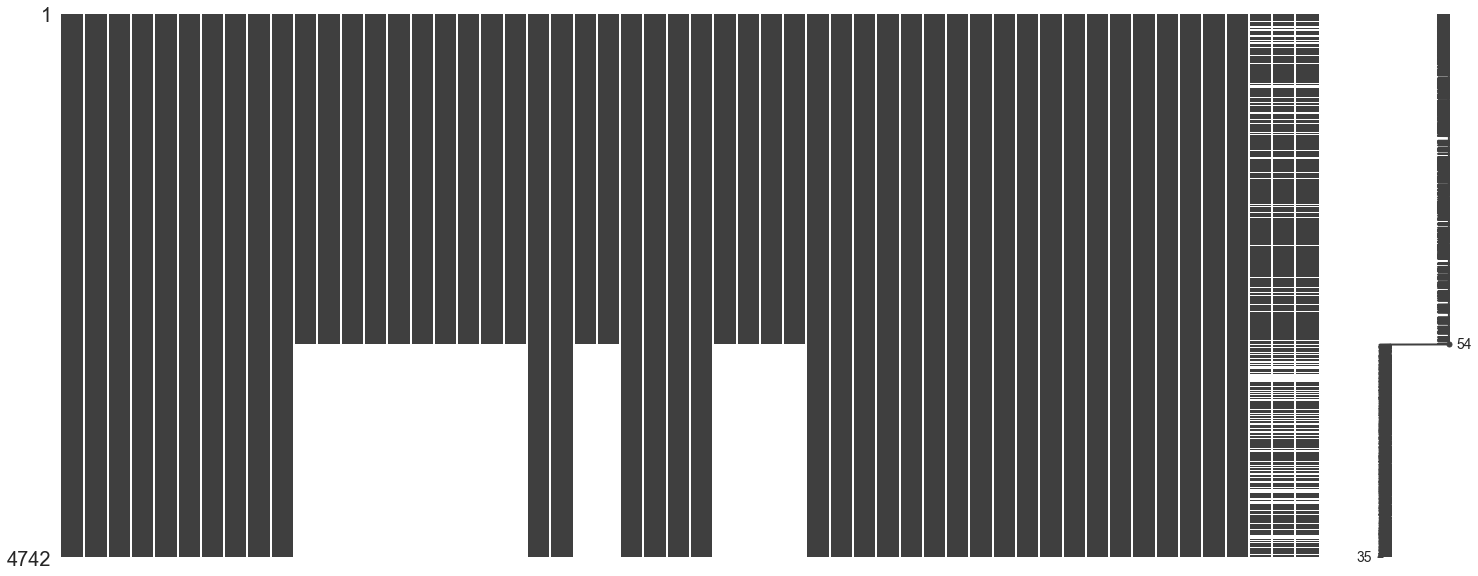

In [20]:
print(msno.matrix(df_golden_record_1.sort_values(by='field_goals_attempts_pg_Playoff')))
print(df_golden_record_1.isna().sum()/len(df_golden_record_1))

We have to do smthg with the 22% people that hasn't been drafted -> drop players who have'nt beeen drafted!!! (for purpose of the model!!!)

In [21]:
df_golden_record_1 = df_golden_record_1.dropna(subset=['draft_year'])
df_golden_record_1 = df_golden_record_1.reset_index(drop=True)

df_golden_record_1['draft_year'] = df_golden_record_1['draft_year'].astype(int)
df_golden_record_1['draft_round'] = df_golden_record_1['draft_round'].astype(int)
df_golden_record_1['draft_pick_number'] = df_golden_record_1['draft_pick_number'].astype(int)
df_golden_record_1

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,college,weight,birth_date(year),height(cm),age_entrance,age_retirement,years_active,draft_year,draft_round,draft_pick_number
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,Winston-Salem State,210,1956,195.58,25,27,2,1978,5,104
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,New Mexico State,190,1930,190.50,23,23,0,1952,6,51
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,South Carolina,185,1946,185.42,23,23,0,1968,1,101
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,Boston College,220,1972,205.74,23,29,6,1994,1,22
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,"Kentucky, Syracuse",225,1969,205.74,23,27,4,1991,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,0,2.6,0.286,0.0,0.3,1.000,1.8,0.1,1.6,1.8,...,Arizona State,210,1957,203.20,23,23,0,1979,2,32
3693,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,3.4,...,UCLA,250,1973,213.36,23,25,2,1995,1,22
3694,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,2.0,...,Mississippi State,195,1981,190.50,25,25,0,2003,2,40
3695,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,1.2,...,UNLV,240,1996,213.36,21,21,0,2016,2,41


## 3.4 Merge with team played info

In [22]:
# features to create:
    # mean win loss pctg
    # number of wins
    # number of playoffs
    # most popular team played -> more years or with 

In [23]:
df_teams_standings.head()

,team_3_lett,season,league,team_name,wins,losses,w_l_pct,team_name_clean,playoff_team
0,ATL,2021-22,NBA,Atlanta Hawks,16,19,0.457,Atlanta Hawks,0
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,Atlanta Hawks,1
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,Atlanta Hawks,0
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,Atlanta Hawks,0
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,Atlanta Hawks,0


In [24]:
df_teams_key.head() #used to convert the origin name to the actual teams, and to relate with the standings Dataframe

,team_name_clean,team_3_lett,team_name_21_22
0,Atlanta Hawks,ATL,Atlanta Hawks
1,Milwaukee Hawks,ATL,Atlanta Hawks
2,St. Louis Hawks,ATL,Atlanta Hawks
3,Tri-Cities Blackhawks,ATL,Atlanta Hawks
4,Baltimore Bullets,WAS,Washington Wizards


In [25]:
aux_df = df_golden_record_1[['teams_years_dict','n_teams','player_url']]
print(aux_df['n_teams'].max()) #max number of teams
aux_df.head()

13


,teams_years_dict,n_teams,player_url
0,"{'team_0': ['Washington Bullets'], 'years_0': ...",1,/players/t/terryca01.html
1,"{'team_0': ['Baltimore Bullets'], 'years_0': [...",1,/players/p/priddbo01.html
2,"{'team_0': ['Atlanta Hawks'], 'years_0': ['196...",1,/players/h/harlisk01.html
3,"{'team_0': ['Detroit Pistons'], 'years_0': ['1...",5,/players/c/curlebi01.html
4,"{'team_0': ['Los Angeles Clippers'], 'years_0'...",3,/players/e/ellisle02.html


In [26]:
for row in range(0,len(aux_df)):
    if row==0:
        dictionary_var = aux_df['teams_years_dict'][row]
        dictionary_var = ast.literal_eval(dictionary_var)
        df_teams_per_player = pd.DataFrame.from_dict(dictionary_var)
        df_teams_per_player['player_url'] = aux_df['player_url'][row]
    else:
        dictionary_var = aux_df['teams_years_dict'][row]
        dictionary_var = ast.literal_eval(dictionary_var)
        df_teams_per_player_aux = pd.DataFrame.from_dict(dictionary_var)
        df_teams_per_player_aux['player_url'] = aux_df['player_url'][row]
        
        df_teams_per_player = pd.concat([df_teams_per_player,df_teams_per_player_aux],ignore_index=True)

In [27]:
df_teams_per_player.head()

,team_0,years_0,player_url,team_1,years_1,team_2,years_2,team_3,years_3,team_4,...,team_9,years_9,team_10,years_10,team_11,years_11,team_12,years_12,team_13,years_13
0,Washington Bullets,1981-1983,/players/t/terryca01.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baltimore Bullets,1953,/players/p/priddbo01.html,Baltimore Bullets,1953,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlanta Hawks,1969,/players/h/harlisk01.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Detroit Pistons,1995,/players/c/curlebi01.html,Minnesota Timberwolves,1998,Minnesota Timberwolves,1999,Houston Rockets,2000,Golden State Warriors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Los Angeles Clippers,1992,/players/e/ellisle02.html,Charlotte Hornets,1994,Miami Heat,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_teams_per_player[df_teams_per_player['years_0'].str.len()>9]

,team_0,years_0,player_url,team_1,years_1,team_2,years_2,team_3,years_3,team_4,...,team_9,years_9,team_10,years_10,team_11,years_11,team_12,years_12,team_13,years_13
2460,Minneapolis Lakers,1959 (Wore 34 in 1st half of Game 4 of 1959 NB...,/players/b/bayloel01.html,Minneapolis Lakers,1959-1960,Los Angeles Lakers,1961-1967,Los Angeles Lakers,1968-1972,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461,Minneapolis Lakers,1959 (Wore 34 in 1st half of Game 4 of 1959 NB...,/players/b/bayloel01.html,Minneapolis Lakers,1959-1960,Los Angeles Lakers,1961-1967,Los Angeles Lakers,1968-1972,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Resolem el problema....
df_teams_per_player_1 = df_teams_per_player.copy()

cols = df_teams_per_player_1.columns
years_cols = [i for i in cols if 'year' in i]

for year in years_cols:
    df_teams_per_player_1[year] = df_teams_per_player_1[year].apply(lambda x: x[:x.find('(')] if len(str(x))>9 else str(x).strip() if pd.isna(x)==False else x)

In [30]:
df_teams_per_player_1[df_teams_per_player_1['years_1'].str.len()>9]['years_1']

267                                           2020-2022 
773    2017-18 for a brief stint, again 1/28/20 as a ...
Name: years_1, dtype: object

In [31]:
df_teams_per_player_1['years_1'] = df_teams_per_player_1['years_1'].apply(lambda x: x[:x.find('for')] if len(str(x))>9 else str(x).strip() if pd.isna(x)==False else x)

In [32]:
def get_years(years_):
    
    years_ = years_.strip() #cleaning spaces
    
    if len(years_)== 4:
        return pd.DataFrame({'year':[years_]})
    else:
        splited_years = years_.split('-')
        #print(splited_years)
        return pd.DataFrame(list(range(int(splited_years[0]),int(splited_years[1])+1)),columns = ['year'])

In [33]:
for j in range(0,len(df_teams_per_player_1)):     
    
    row = df_teams_per_player_1.loc[j].dropna()
    cols = row.index
    team_cols = [i for i in cols if 'team' in i]
    years_cols = [i for i in cols if 'year' in i]

    for i in range(0,len(years_cols)):
        aux_df = get_years(row[years_cols[i]])
        aux_df['Team'] = row[team_cols[i]]
        aux_df['player_url'] = row['player_url']
        #print(row['player_url'])
    if j==0:
        df_players_board = aux_df
    else:
        df_players_board = pd.concat([df_players_board,aux_df],ignore_index=True)

In [34]:
df_players_board[df_players_board['year'].str.len()>4]

,year,Team,player_url


In [35]:
df_players_board.head()

,year,Team,player_url
0,1981,Washington Bullets,/players/t/terryca01.html
1,1982,Washington Bullets,/players/t/terryca01.html
2,1983,Washington Bullets,/players/t/terryca01.html
3,1953,Baltimore Bullets,/players/p/priddbo01.html
4,1969,Atlanta Hawks,/players/h/harlisk01.html


In [36]:
df_players_board['year'] = df_players_board['year'].astype(int)
df_players_board.dtypes

year           int32
Team          object
player_url    object
dtype: object

In [37]:
df_teams_standings['season_year'] = df_teams_standings['season'].apply(lambda x: x[:2] + x[-2:])
df_teams_standings['season_year'] = df_teams_standings['season_year'].str.replace("1900","2000")
df_teams_standings['season_year'] = df_teams_standings['season_year'].astype(int)

In [38]:
df_teams_standings

,team_3_lett,season,league,team_name,wins,losses,w_l_pct,team_name_clean,playoff_team,season_year
0,ATL,2021-22,NBA,Atlanta Hawks,16,19,0.457,Atlanta Hawks,0,2022
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,Atlanta Hawks,1,2021
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,Atlanta Hawks,0,2020
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,Atlanta Hawks,0,2019
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,Atlanta Hawks,0,2018
...,...,...,...,...,...,...,...,...,...,...
56,WAS,1965-66,NBA,Baltimore Bullets*,38,42,0.475,Baltimore Bullets,1,1966
57,WAS,1964-65,NBA,Baltimore Bullets*,37,43,0.463,Baltimore Bullets,1,1965
58,WAS,1963-64,NBA,Baltimore Bullets,31,49,0.388,Baltimore Bullets,0,1964
59,WAS,1962-63,NBA,Chicago Zephyrs,25,55,0.313,Chicago Zephyrs,0,1963


In [39]:
def get_standings_data(year, team, column):
    
    try:
        data = df_teams_standings[(df_teams_standings['season_year']==year) & (df_teams_standings['team_name_clean']==team)][column].values[0]
    except:
        data = np.nan
    return data

In [40]:
df_players_board['wins'] =  df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'wins'),axis=1)
df_players_board['w_l_pct'] = df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'w_l_pct'),axis=1)
df_players_board['playoff_team'] = df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'playoff_team'),axis=1)
df_players_board['team_3_lett'] = df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'team_3_lett'),axis=1)

AxesSubplot(0.125,0.125;0.698618x0.755)
year            0.000000
Team            0.000000
player_url      0.000000
wins            0.048831
w_l_pct         0.048831
playoff_team    0.048831
team_3_lett     0.048831
dtype: float64


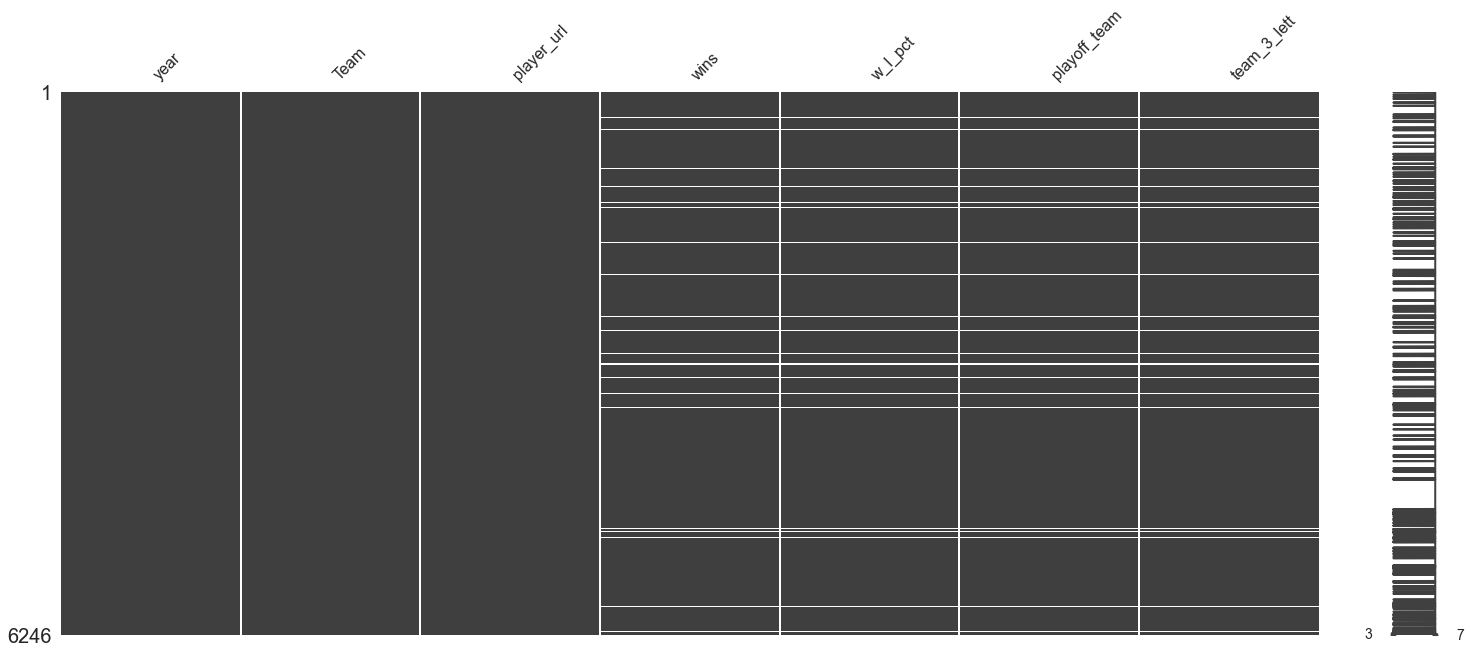

In [41]:
print(msno.matrix(df_players_board))
print(df_players_board.isna().sum()/len(df_players_board))

In [42]:
df_players_board[df_players_board['wins'].isna()]

,year,Team,player_url,wins,w_l_pct,playoff_team,team_3_lett
3,1953,Baltimore Bullets,/players/p/priddbo01.html,NaN,NaN,NaN,NaN
33,1976,Virginia Squires,/players/j/jacksmi01.html,NaN,NaN,NaN,NaN
57,1970,Pittsburgh Pipers,/players/o/ormsba01.html,NaN,NaN,NaN,NaN
81,1953,Baltimore Bullets,/players/b/buntdi01.html,NaN,NaN,NaN,NaN
124,1968,Pittsburgh Pipers,/players/p/parksri01.html,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6205,1971,Carolina Cougars,/players/w/williva01.html,NaN,NaN,NaN,NaN
6207,1973,Memphis Tams,/players/w/wilsois01.html,NaN,NaN,NaN,NaN
6208,1971,Pittsburgh Condors,/players/w/wilsoji01.html,NaN,NaN,NaN,NaN
6225,1954,Baltimore Bullets,/players/w/workmma01.html,NaN,NaN,NaN,NaN


5% of no match becuase they're ABA or BAA teams... so we'll delete it

In [43]:
df_players_board_1 = df_players_board.copy()
df_players_board_1 = df_players_board.dropna().reset_index(drop=True)

In [44]:
df_players_board_1

,year,Team,player_url,wins,w_l_pct,playoff_team,team_3_lett
0,1981,Washington Bullets,/players/t/terryca01.html,39.0,0.476,0.0,WAS
1,1982,Washington Bullets,/players/t/terryca01.html,43.0,0.524,1.0,WAS
2,1983,Washington Bullets,/players/t/terryca01.html,42.0,0.512,0.0,WAS
3,1969,Atlanta Hawks,/players/h/harlisk01.html,48.0,0.585,1.0,ATL
4,2001,Golden State Warriors,/players/c/curlebi01.html,17.0,0.207,0.0,GSW
...,...,...,...,...,...,...,...
5936,1980,Indiana Pacers,/players/z/zenoto01.html,37.0,0.451,0.0,IND
5937,1998,Seattle SuperSonics,/players/z/zidekge01.html,61.0,0.744,1.0,OKC
5938,2006,New Jersey Nets,/players/z/zimmede01.html,49.0,0.598,1.0,NJN
5939,2017,Orlando Magic,/players/z/zimmest01.html,29.0,0.354,0.0,ORL


In [45]:
df_players_board_1 = df_players_board_1.merge(df_teams_key[['team_name_21_22','team_3_lett']],how='left',on='team_3_lett')
df_players_board_1.isna().sum()

year               0
Team               0
player_url         0
wins               0
w_l_pct            0
playoff_team       0
team_3_lett        0
team_name_21_22    0
dtype: int64

In [48]:
df_players_board_agg = df_players_board_1.groupby(by=["player_url"]).agg({'playoff_team':'sum','wins':'sum','w_l_pct':'mean','team_name_21_22':pd.Series.mode})

In [49]:
df_players_board_agg = df_players_board_agg.reset_index()
df_players_board_agg = df_players_board_agg.rename(columns={'playoff_team':'n_playoff','wins':'n_total_wins','team_name_21_22':'most_popular_team_played'})
df_players_board_agg

,player_url,n_playoff,n_total_wins,w_l_pct,most_popular_team_played
0,/players/a/abdelal01.html,0.0,48.0,0.29300,Philadelphia 76ers
1,/players/a/abdulka01.html,26.0,1552.0,0.67600,Los Angeles Lakers
2,/players/a/abdulma01.html,3.0,141.0,0.57300,Golden State Warriors
3,/players/a/abdulma02.html,0.0,46.0,0.28000,Memphis Grizzlies
4,/players/a/abdulta01.html,2.0,117.0,0.71350,Dallas Mavericks
...,...,...,...,...,...
3375,/players/z/zimmest01.html,0.0,29.0,0.35400,Orlando Magic
3376,/players/z/zipsepa01.html,1.0,68.0,0.41450,Chicago Bulls
3377,/players/z/zizican01.html,1.0,88.0,0.37800,Cleveland Cavaliers
3378,/players/z/zopfbi01.html,1.0,66.0,0.80500,Milwaukee Bucks


In [50]:
df_players_board_agg['most_popular_team_played'].value_counts()

Philadelphia 76ers        171
Golden State Warriors     163
Brooklyn Nets             158
Atlanta Hawks             154
Detroit Pistons           152
Sacramento Kings          150
New York Knicks           149
Los Angeles Clippers      143
Washington Wizards        141
Los Angeles Lakers        136
San Antonio Spurs         135
Boston Celtics            129
Denver Nuggets            120
Cleveland Cavaliers       114
Portland Trail Blazers    114
Indiana Pacers            113
Milwaukee Bucks           112
Oklahoma City Thunder     106
Phoenix Suns               97
Houston Rockets            94
Dallas Mavericks           90
Chicago Bulls              90
Utah Jazz                  89
Memphis Grizzlies          75
Minnesota Timberwolves     73
Orlando Magic              71
Miami Heat                 71
Charlotte Hornets          64
Toronto Raptors            63
New Orleans Pelicans       43
Name: most_popular_team_played, dtype: int64

<AxesSubplot:>

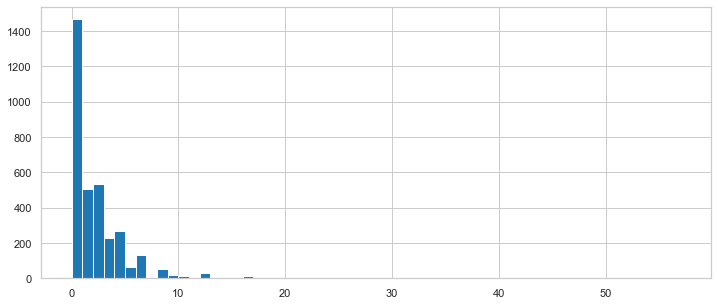

In [51]:
df_players_board_agg['n_playoff'].hist(bins=np.arange(0, df_players_board_agg['n_playoff'].max() + 1, 1)) #fer + maco

In [52]:
df_golden_record_2 = df_golden_record_1.copy()
df_golden_record_2 = df_golden_record_2.merge(df_players_board_agg,how="left",on="player_url")

In [53]:
print(len(df_golden_record_1))
print(len(df_players_board_agg))

3697
3380


In [54]:
df_golden_record_2.isna().sum()

games_started_RegS                    0
field_goals_attempts_pg_RegS          0
field_goals_percent_pg_RegS           0
_3pts_goals_attempts_pg_RegS          0
FT_goals_attempts_pg_RegS             0
FT_goals_percent_pg_RegS              0
total_rebounds_pg_RegS                0
assists_pg_RegS                       0
personal_foults_pg_RegS               0
points_pg_RegS                        0
games_started_Playoff              1229
field_goals_attempts_pg_Playoff    1229
field_goals_percent_pg_Playoff     1229
_3pts_goals_attempts_pg_Playoff    1229
FT_goals_attempts_pg_Playoff       1229
FT_goals_percent_pg_Playoff        1229
total_rebounds_pg_Playoff          1229
assists_pg_Playoff                 1229
personal_foults_pg_Playoff         1229
points_pg_Playoff                  1229
FT_goals_attempts_total_RegS          0
assists_total_RegS                    0
FT_goals_attempts_total_Playoff    1229
assists_total_Playoff              1229
player_eff_rating_RegS                0


In [55]:
df_golden_record_3 = df_golden_record_2.copy()
df_golden_record_3 = df_golden_record_3.dropna(subset=["n_playoff"]).reset_index(drop=True) #we drop all those players without stats from agg table...
df_golden_record_3

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,age_entrance,age_retirement,years_active,draft_year,draft_round,draft_pick_number,n_playoff,n_total_wins,w_l_pct,most_popular_team_played
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,25,27,2,1978,5,104,6.0,744.0,0.504,Washington Wizards
1,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,23,23,0,1968,1,101,4.0,192.0,0.585,Atlanta Hawks
2,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,23,29,6,1994,1,22,0.0,51.0,0.207,Golden State Warriors
3,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,23,27,4,1991,1,22,1.0,42.0,0.512,Miami Heat
4,11,5.0,0.507,0.0,1.1,0.720,3.2,0.6,1.4,5.9,...,23,28,5,2008,1,29,2.0,86.0,0.524,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0,2.6,0.286,0.0,0.3,1.000,1.8,0.1,1.6,1.8,...,23,23,0,1979,2,32,0.0,37.0,0.451,Indiana Pacers
3438,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,3.4,...,23,25,2,1995,1,22,2.0,122.0,0.744,Oklahoma City Thunder
3439,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,2.0,...,25,25,0,2003,2,40,4.0,196.0,0.598,Brooklyn Nets
3440,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,1.2,...,21,21,0,2016,2,41,0.0,29.0,0.354,Orlando Magic


In [56]:
df_golden_record_3.columns

Index(['games_started_RegS', 'field_goals_attempts_pg_RegS',
       'field_goals_percent_pg_RegS', '_3pts_goals_attempts_pg_RegS',
       'FT_goals_attempts_pg_RegS', 'FT_goals_percent_pg_RegS',
       'total_rebounds_pg_RegS', 'assists_pg_RegS', 'personal_foults_pg_RegS',
       'points_pg_RegS', 'games_started_Playoff',
       'field_goals_attempts_pg_Playoff', 'field_goals_percent_pg_Playoff',
       '_3pts_goals_attempts_pg_Playoff', 'FT_goals_attempts_pg_Playoff',
       'FT_goals_percent_pg_Playoff', 'total_rebounds_pg_Playoff',
       'assists_pg_Playoff', 'personal_foults_pg_Playoff', 'points_pg_Playoff',
       'FT_goals_attempts_total_RegS', 'assists_total_RegS',
       'FT_goals_attempts_total_Playoff', 'assists_total_Playoff',
       'player_eff_rating_RegS', 'true_shooting_eff_RegS',
       'usage_percent_RegS', 'win_share_RegS', 'player_eff_rating_Playoff',
       'true_shooting_eff_Playoff', 'usage_percent_Playoff',
       'win_share_Playoff', 'Hall_Of_Fame', 'n_NBA_Cham

## 3.5 Other feature engineering

In [57]:
#triple doble
#defensive player ->win_share
#ofensive player -> not possible...
# % winning

In [58]:
df_golden_record_4 = df_golden_record_3.copy()

In [59]:
def aux_metric(num,denom):
    value = num/denom
    if value>1:
        return 1
    else:
        return value

In [60]:
#triple double: (definition)
df_golden_record_4['triple_double_metric_RegS'] = df_golden_record_4.apply(lambda x: 
                                                                           (aux_metric(x['points_pg_RegS'],10)+aux_metric(x['total_rebounds_pg_RegS'],10)+aux_metric(x['assists_pg_RegS'],10))/3, axis=1)

In [61]:
df_golden_record_4['triple_double_metric_Playoff'] = df_golden_record_4.apply(lambda x: 
                                                                           (aux_metric(x['points_pg_Playoff'],10)+aux_metric(x['total_rebounds_pg_Playoff'],10)+aux_metric(x['assists_pg_Playoff'],10))/3 if x['assists_pg_Playoff']!= np.nan else np.nan, axis=1)

In [62]:
#Algun gràfic chulo de distància de RegS a playoff

#df_golden_record_4[df_golden_record_4['triple_double_metric_Playoff'].isna()==False].sort_values(by=['triple_double_metric_Playoff'])['player_url']

In [63]:
#triple double: (definition)
df_golden_record_4['championship_pct'] = df_golden_record_4.apply(lambda x: aux_metric(x['n_NBA_Champ'],x['n_playoff']) if x['n_playoff']> 0  else x['n_playoff'], axis=1)

In [64]:
#Algun gràfic chulo
#df_golden_record_4.sort_values(by=['championship_pct'])['player_url']

In [65]:
#ALTRES VARIABLES????

In [66]:
df_golden_record_4 = df_golden_record_4.drop(columns=['points_pg_RegS','points_pg_Playoff']) #ja usat! i havíem dit d'eliminar

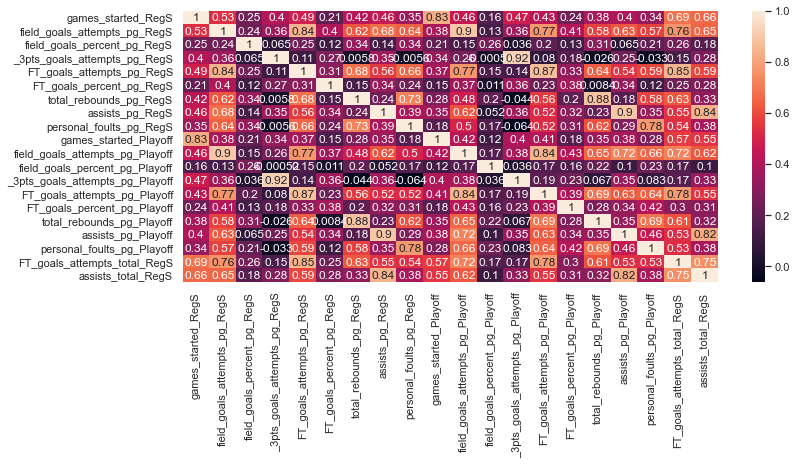

In [67]:
N = 0
M = 20

_columns  = df_golden_record_4.iloc[: , N:M]

corrMatrix = _columns.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

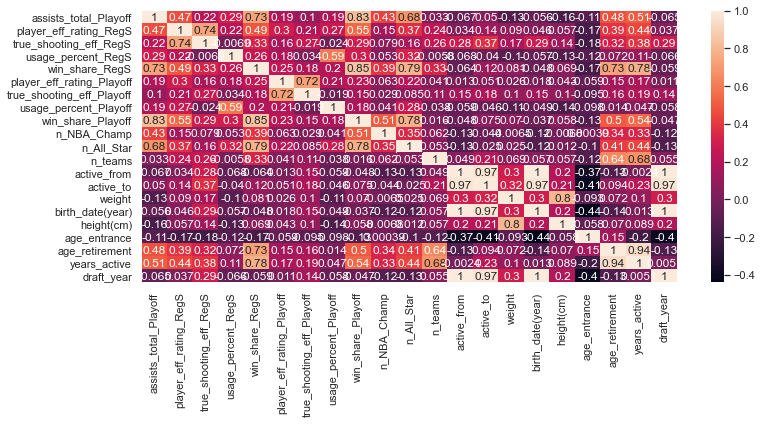

In [68]:
N = 21
M = 50

_columns  = df_golden_record_4.iloc[: , N:M]

corrMatrix = _columns.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

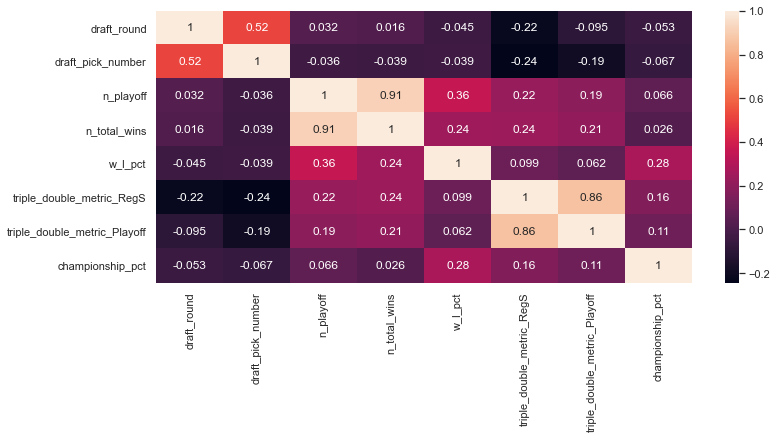

In [69]:
N = 50
M = len(df_golden_record_4)

_columns  = df_golden_record_4.iloc[: , N:M]

corrMatrix = _columns.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [70]:
#Observem correlacions entre algunes variables -> years de començar, wins i playoff, triple_double etc. 
#però les assumim pq ens servirà per descriure millor qualitativament els cluters

In [71]:
df_golden_record_4

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,games_started_Playoff,...,draft_year,draft_round,draft_pick_number,n_playoff,n_total_wins,w_l_pct,most_popular_team_played,triple_double_metric_RegS,triple_double_metric_Playoff,championship_pct
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,0.0,...,1978,5,104,6.0,744.0,0.504,Washington Wizards,0.223333,0.010000,0.0
1,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,0.0,...,1968,1,101,4.0,192.0,0.585,Atlanta Hawks,0.203333,0.000000,0.0
2,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,0.0,...,1994,1,22,0.0,51.0,0.207,Golden State Warriors,0.170000,0.000000,0.0
3,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,0.0,...,1991,1,22,1.0,42.0,0.512,Miami Heat,0.190000,0.000000,0.0
4,11,5.0,0.507,0.0,1.1,0.720,3.2,0.6,1.4,0.0,...,2008,1,29,2.0,86.0,0.524,Charlotte Hornets,0.323333,0.066667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0,2.6,0.286,0.0,0.3,1.000,1.8,0.1,1.6,NaN,...,1979,2,32,0.0,37.0,0.451,Indiana Pacers,0.123333,NaN,0.0
3438,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,NaN,...,1995,1,22,2.0,122.0,0.744,Oklahoma City Thunder,0.190000,NaN,0.0
3439,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,NaN,...,2003,2,40,4.0,196.0,0.598,Brooklyn Nets,0.250000,NaN,0.0
3440,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,NaN,...,2016,2,41,0.0,29.0,0.354,Orlando Magic,0.106667,NaN,0.0


In [72]:
df_golden_record_4.to_excel('Clean_data/Golden_Record.xlsx')

## 3.6 Data analysis with the golden record

In [ ]:
algun gràfic chulo

In [ ]:
#path = './Clean_data/Data_Clean_V1/'
path = './Scraped data/scraped_data_v2/'

# Maestro de jugadorescombinado con Draft
players_df = pd.read_excel(path + 'combined_drafted_and_all_players.xlsx',index_col=0)

#NBA Dataframes
stats_RS_PG_BS_df = pd.read_csv(path + 'stats_RS_PG_BS_df.csv',index_col=0) 
stats_PFF_PG_BS_df = pd.read_csv(path + 'stats_PFF_PG_BS_df.csv',index_col=0) 
stats_RS_TOT_BS_df = pd.read_csv(path + 'stats_RS_TOT_BS_df.csv',index_col=0) 
stats_PFF_TOT_BS_df = pd.read_csv(path + 'stats_PFF_TOT_BS_df.csv',index_col=0) 
stats_RS_ADV_BS_df = pd.read_csv(path + 'stats_RS_ADV_BS_df.csv',index_col=0) 
stats_PFF_ADV_BS_df = pd.read_csv(path + 'stats_PFF_ADV_BS_df.csv',index_col=0)
player_extra_info_df = pd.read_csv(path + 'player_extra_info_df.csv',index_col=0)

#College DataFrames
college_stats_RS_PG_BS_df = pd.read_csv(path + 'college_stats_RS_PG_BS_df.csv',index_col=0) 
college_stats_CONF_PG_BS_df = pd.read_csv(path + 'college_stats_CONF_PG_BS_df.csv',index_col=0) 
college_stats_RS_TOT_BS_df = pd.read_csv(path + 'college_stats_RS_TOT_BS_df.csv',index_col=0) 
college_stats_CONF_TOT_BS_df = pd.read_csv(path + 'college_stats_CONF_TOT_BS_df.csv',index_col=0) 
college_stats_RS_ADV_BS_df = pd.read_csv(path + 'college_stats_RS_ADV_BS_df.csv',index_col=0) 
college_stats_CONF_ADV_BS_df = pd.read_csv(path + 'college_stats_CONF_ADV_BS_df.csv',index_col=0)     
college_player_extra_info_df = pd.read_csv(path + 'college_player_extra_info_df.csv',index_col=0)